# Data anaylsis in cerebellar granular layer simulations (MF-GrC + Connectivity FanIn)
## Running the simulation

First, we set current working directory to the root of Spiking Granular Layer and insert the source folder to the python path:

In [1]:
import os
os.chdir('../../')
os.getcwd()
import sys
import numpy
%matplotlib notebook
import matplotlib.pyplot as plt
import time
sys.path.insert(1,'./src')

## Running the simulation
Now start setting a new simulation with the configuration file that we specify:

In [2]:
config_file = './config/GoCFanIn/InitialTest.cfg'
data_path = './results'
simulation_name = 'TestMFGoCPlasticity10FT'
simulation_time = 3000
analysis_time = 300.0
analysis_step = 100.0
run_the_simulation = False
import SpikingSimulation.FrequencySimulation as FrequencySimulation
simulation = FrequencySimulation.FrequencySimulation(config_file=config_file)

Set the simulation general parameters

In [3]:
simulation.config_options['simulation']['verbosity'] = 'Debug'
simulation.config_options['simulation']['seed'] = 12345
simulation.config_options['simulation']['time'] = simulation_time
simulation.config_options['simulation']['data_path'] = data_path
simulation.config_options['simulation']['simulation_name'] = simulation_name
simulation.config_options['simulation']['register_activity_only_in_test'] = False
simulation.config_options['simulation']['run_simulation'] = run_the_simulation
simulation.config_options['simulation']['record_to_file'] = True
simulation.config_options['simulation']['state_recording_step'] = 10.0
simulation.config_options['simulation']['weight_normalization_step'] = 100.0
if run_the_simulation:
    simulation.config_options['network']['load_file'] = None
else:
    simulation.config_options['network']['load_file'] = data_path + '/' + simulation_name + '/network.h5'

Set the network synaptic parameters of the granular layer

In [4]:
# Set the density of neurons per layer (in units/mm3)
simulation.config_options['mflayer']['density_of_neurons'] = 300.0e3
simulation.config_options['goclayer']['density_of_neurons'] = 9.0e3
# Set the neuron dynamic parameters
simulation.config_options['goclayer']['cm'] = 50.0e-12
simulation.config_options['goclayer']['grest'] = 3.0e-9
simulation.config_options['goclayer']['cell_model'] = 'ConductanceLIF'
# Set the MF-GrC connectivity rules and parameters
simulation.config_options['mfgocsynapsis']['connectivity_type'] = 'randomn2onestd'
simulation.config_options['mfgocsynapsis']['average_number_of_source_cells'] = 2000.0
simulation.config_options['mfgocsynapsis']['std_number_of_source_cells'] = 0.5
# Set the MF-GrC learning rule and initial weights
simulation.config_options['mfgocsynapsis']['weight_initialization_type'] = 'random'
simulation.config_options['mfgocsynapsis']['random_min_weight'] = 6.0e-11
simulation.config_options['mfgocsynapsis']['random_max_weight'] = 6.5e-11
simulation.config_options['mfgocsynapsis']['weight_recording'] = True
simulation.config_options['mfgocsynapsis']['weight_normalization'] = False
simulation.config_options['mfgocsynapsis']['learning_rule_type'] = 'eSTDP'
simulation.config_options['mfgocsynapsis']['tau_plus'] = 16.8e-3
simulation.config_options['mfgocsynapsis']['learning_step'] = 2.0e-3
simulation.config_options['mfgocsynapsis']['minus_plus_ratio'] = 1.33
simulation.config_options['goclayer']['tau_minus'] = 33.7e-3
simulation.config_options['mfgocsynapsis']['max_weight'] = 7.36e-10

Set analysis parameters

In [5]:
simulation.config_options['individual_mutual_information']['layer'] = 'goclayer'
simulation.config_options['individual_mutual_information']['window_length'] = analysis_time
simulation.config_options['hit_top_analysis']['layer'] = 'goclayer'
simulation.config_options['hit_top_analysis']['window_length'] = analysis_time
simulation.config_options['hit_top_analysis']['number_of_cells'] = 500

Initialize the simulation

In [6]:
# Set the rate of fibers in pattern
simulation.config_options['stimulation']['rate_of_fibers_in_pattern'] = 0.10
simulation.config_options['network']['length'] = 2.0e-1
simulation.initialize()

2018-07-11 11:48:40,083 - P13339 - MemTotal:67M - Simulation - DEBUG: Simulation time fixed to 3000s
2018-07-11 11:48:40,114 - P13339 - MemTotal:67M - Simulation - DEBUG: Creating cerebellum generator
2018-07-11 11:48:40,217 - P13339 - MemTotal:84M - Simulation - DEBUG: Initializing cerebellum generator
2018-07-11 11:48:40,219 - P13339 - MemTotal:84M - Simulation - DEBUG: Removing results folder ./results/TestMFGoCPlasticity10FT
2018-07-11 11:48:40,290 - P13339 - MemTotal:84M - Simulation - DEBUG: Cerebellar simulation initialized
2018-07-11 11:48:40,294 - P13339 - MemTotal:84M - Simulation - DEBUG: NEST module loaded
2018-07-11 11:48:40,331 - P13339 - MemTotal:87M - Simulation - DEBUG: Setting Global NEST Seed: 12356
2018-07-11 11:48:40,333 - P13339 - MemTotal:87M - Simulation - DEBUG: Setting Per-Process NEST Seeds: [12357, 12358, 12359, 12360, 12361, 12362, 12363, 12364, 12365, 12366]
2018-07-11 11:48:40,336 - P13339 - MemTotal:87M - Simulation - WARNING: Non-specified cell model pa

Define a function to obtain the average firing rate

In [7]:
def obtain_fr(init_time,end_time):
    min_neuron = 0
    max_neuron = simulation.cerebellum.get_number_of_elements(layer='goclayer')
    gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
    import numpy
    firing_frequency = float(len(gcell_id)) / ((end_time-init_time)*max_neuron)
    return firing_frequency

Visualize the simulation or only run it.

<IPython.core.display.Javascript object>


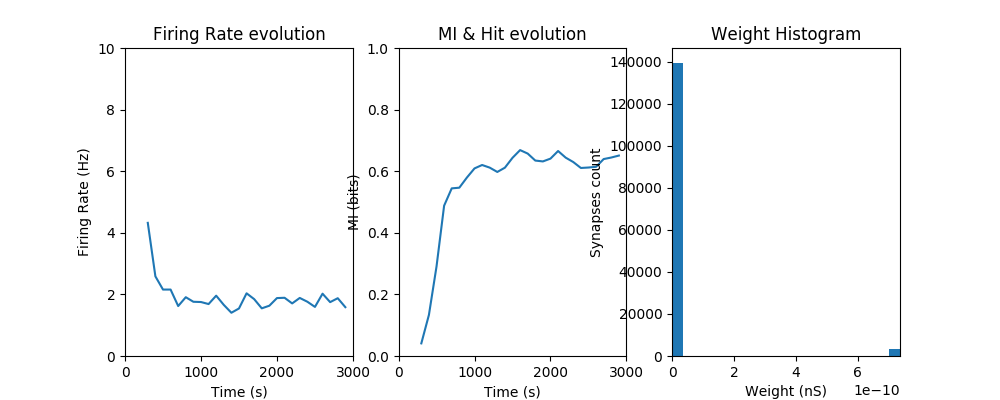

2018-07-11 11:48:50,242 - P13339 - MemTotal:1131M - Simulation - INFO: Running the simulation from 0.0s until time 300.0s
2018-07-11 11:48:50,268 - P13339 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.177s until 0.177s
2018-07-11 11:48:50,512 - P13339 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.241847038269 seconds. Real-time rate: 0.7318675525937025
2018-07-11 11:48:50,530 - P13339 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.11299999999999999s until 0.29s
2018-07-11 11:48:50,667 - P13339 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.134777069092 seconds. Real-time rate: 0.8384215561404997
2018-07-11 11:48:50,685 - P13339 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.964s until 1.254s
2018-07-11 11:48:51,701 - P13339 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 1.01363801956 seconds. Real-time rate: 0.9510298364861769
2018-07-11 11:48:51,719 - P13339 - MemTotal:1132M - Simulation - DEBUG:

2018-07-11 11:48:58,156 - P13339 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.7320000000000002s until 7.409s
2018-07-11 11:48:58,890 - P13339 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.731590032578 seconds. Real-time rate: 1.000560378633155
2018-07-11 11:48:58,907 - P13339 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.04699999999999971s until 7.4559999999999995s
2018-07-11 11:48:58,977 - P13339 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.0681338310242 seconds. Real-time rate: 0.6898188358633003
2018-07-11 11:48:58,998 - P13339 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.21699999999999964s until 7.672999999999999s
2018-07-11 11:48:59,222 - P13339 - MemTotal:1132M - Simulation - DEBUG: Simulation time is 0.222429990768 seconds. Real-time rate: 0.9755878658733299
2018-07-11 11:48:59,242 - P13339 - MemTotal:1132M - Simulation - DEBUG: Running the simulation 0.07000000000000028s until 7.742999999999999

2018-07-11 11:49:06,294 - P13339 - MemTotal:1105M - Simulation - DEBUG: Simulation time is 0.264270067215 seconds. Real-time rate: 0.9611379853829142
2018-07-11 11:49:06,311 - P13339 - MemTotal:1105M - Simulation - DEBUG: Running the simulation 0.7140000000000004s until 13.686000000000002s
2018-07-11 11:49:07,077 - P13339 - MemTotal:1105M - Simulation - DEBUG: Simulation time is 0.763659000397 seconds. Real-time rate: 0.9349722842644037
2018-07-11 11:49:07,094 - P13339 - MemTotal:1105M - Simulation - DEBUG: Running the simulation 0.11100000000000065s until 13.797000000000002s
2018-07-11 11:49:07,223 - P13339 - MemTotal:1105M - Simulation - DEBUG: Simulation time is 0.127826929092 seconds. Real-time rate: 0.8683616260526588
2018-07-11 11:49:07,241 - P13339 - MemTotal:1105M - Simulation - DEBUG: Running the simulation 0.2400000000000002s until 14.037000000000003s
2018-07-11 11:49:07,508 - P13339 - MemTotal:1105M - Simulation - DEBUG: Simulation time is 0.265468120575 seconds. Real-time r

2018-07-11 11:49:14,473 - P13339 - MemTotal:1105M - Simulation - DEBUG: Simulation time is 0.125139951706 seconds. Real-time rate: 0.9349532136222981
2018-07-11 11:49:14,491 - P13339 - MemTotal:1105M - Simulation - DEBUG: Running the simulation 0.10300000000000153s until 19.924000000000003s
2018-07-11 11:49:14,600 - P13339 - MemTotal:1105M - Simulation - DEBUG: Simulation time is 0.107256174088 seconds. Real-time rate: 0.9603176775254941
2018-07-11 11:49:14,617 - P13339 - MemTotal:1105M - Simulation - DEBUG: Running the simulation 0.0730000000000004s until 19.997000000000003s
2018-07-11 11:49:14,709 - P13339 - MemTotal:1105M - Simulation - DEBUG: Simulation time is 0.0898399353027 seconds. Real-time rate: 0.8125562396501255
2018-07-11 11:49:14,727 - P13339 - MemTotal:1105M - Simulation - DEBUG: Running the simulation 0.22500000000000142s until 20.222000000000005s
2018-07-11 11:49:14,749 - P13339 - MemTotal:1105M - Simulation - DEBUG: Simulation time is 0.020644903183 seconds. Real-time

2018-07-11 11:49:21,345 - P13339 - MemTotal:1190M - Simulation - DEBUG: Simulation time is 0.0325090885162 seconds. Real-time rate: 0.5229306872602564
2018-07-11 11:49:21,362 - P13339 - MemTotal:1190M - Simulation - DEBUG: Running the simulation 0.16799999999999926s until 25.168s
2018-07-11 11:49:21,552 - P13339 - MemTotal:1190M - Simulation - DEBUG: Simulation time is 0.18820309639 seconds. Real-time rate: 0.8926526886256407
2018-07-11 11:49:21,569 - P13339 - MemTotal:1190M - Simulation - DEBUG: Running the simulation 0.2270000000000003s until 25.395s
2018-07-11 11:49:21,801 - P13339 - MemTotal:1190M - Simulation - DEBUG: Simulation time is 0.23012804985 seconds. Real-time rate: 0.9864073508097073
2018-07-11 11:49:21,819 - P13339 - MemTotal:1190M - Simulation - DEBUG: Running the simulation 0.07499999999999929s until 25.47s
2018-07-11 11:49:21,908 - P13339 - MemTotal:1190M - Simulation - DEBUG: Simulation time is 0.0867249965668 seconds. Real-time rate: 0.8648025709894873
2018-07-11 1

2018-07-11 11:49:27,175 - P13339 - MemTotal:1190M - Simulation - DEBUG: Running the simulation 0.047999999999998266s until 29.913999999999998s
2018-07-11 11:49:27,250 - P13339 - MemTotal:1190M - Simulation - DEBUG: Simulation time is 0.073399066925 seconds. Real-time rate: 0.653959266934732
2018-07-11 11:49:27,268 - P13339 - MemTotal:1190M - Simulation - DEBUG: Running the simulation 0.7100000000000009s until 30.624s
2018-07-11 11:49:27,369 - P13339 - MemTotal:1190M - Simulation - DEBUG: Simulation time is 0.0992670059204 seconds. Real-time rate: 0.8663502963810026
2018-07-11 11:49:27,371 - P13339 - MemTotal:1190M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 11:49:27,373 - P13339 - MemTotal:1190M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 11:49:28,799 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.713760852814 seconds. Real-time rate: 0.8742423986130997
2018-07-11 11:49

2018-07-11 11:49:35,172 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.443446159363 seconds. Real-time rate: 0.9719330992049181
2018-07-11 11:49:35,189 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.04899999999999949s until 36.227000000000004s
2018-07-11 11:49:35,244 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0528240203857 seconds. Real-time rate: 0.9276083047481398
2018-07-11 11:49:35,262 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.3470000000000013s until 36.574000000000005s
2018-07-11 11:49:35,625 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.361392974854 seconds. Real-time rate: 0.9601736174884189
2018-07-11 11:49:35,643 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.1700000000000017s until 36.74400000000001s
2018-07-11 11:49:35,815 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.170628070831 seconds. Real-time r

2018-07-11 11:49:46,307 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.213092088699 seconds. Real-time rate: 0.9667181980212122
2018-07-11 11:49:46,324 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.23499999999999943s until 45.82400000000001s
2018-07-11 11:49:46,589 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.263134002686 seconds. Real-time rate: 0.8930810826483401
2018-07-11 11:49:46,606 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.0730000000000004s until 45.89700000000001s
2018-07-11 11:49:46,681 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0729370117188 seconds. Real-time rate: 1.0008635983263652
2018-07-11 11:49:46,699 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.031999999999996476s until 45.92900000000001s
2018-07-11 11:49:46,741 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0406920909882 seconds. Real-time 

2018-07-11 11:49:56,024 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0565059185028 seconds. Real-time rate: 0.9556521056695847
2018-07-11 11:49:56,042 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.232999999999997s until 53.875000000000014s
2018-07-11 11:49:56,284 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.24081993103 seconds. Real-time rate: 0.9675278910810193
2018-07-11 11:49:56,302 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.134999999999998s until 54.01000000000001s
2018-07-11 11:49:56,441 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.138204813004 seconds. Real-time rate: 0.9768111331733437
2018-07-11 11:49:56,459 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.2749999999999986s until 54.28500000000001s
2018-07-11 11:49:56,747 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.28579211235 seconds. Real-time rate: 0

2018-07-11 11:50:05,684 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.216148853302 seconds. Real-time rate: 0.8929031870936615
2018-07-11 11:50:05,702 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.2980000000000018s until 61.85100000000001s
2018-07-11 11:50:06,010 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.306187152863 seconds. Real-time rate: 0.9732609523750256
2018-07-11 11:50:06,027 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.003999999999997783s until 61.85500000000001s
2018-07-11 11:50:06,036 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.00766801834106 seconds. Real-time rate: 0.521647161245902
2018-07-11 11:50:06,056 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.4720000000000013s until 62.32700000000001s
2018-07-11 11:50:06,542 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.483974933624 seconds. Real-time ra

2018-07-11 11:50:12,329 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.546999999999997s until 67.92000000000002s
2018-07-11 11:50:12,879 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.548266887665 seconds. Real-time rate: 0.9976892865622546
2018-07-11 11:50:12,896 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.382000000000005s until 68.30200000000002s
2018-07-11 11:50:13,294 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.395725011826 seconds. Real-time rate: 0.9653167947048882
2018-07-11 11:50:13,311 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.22299999999999898s until 68.52500000000002s
2018-07-11 11:50:13,558 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.245167016983 seconds. Real-time rate: 0.909584016415359
2018-07-11 11:50:13,577 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.0589999999999975s until 68.58400000

2018-07-11 11:50:24,073 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.37699999999999534s until 77.77400000000002s
2018-07-11 11:50:24,469 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.394506931305 seconds. Real-time rate: 0.955623260541893
2018-07-11 11:50:24,487 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.01999999999999602s until 77.79400000000001s
2018-07-11 11:50:24,520 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.030709028244 seconds. Real-time rate: 0.6512742715618682
2018-07-11 11:50:24,537 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.23799999999999955s until 78.03200000000001s
2018-07-11 11:50:24,785 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.2464158535 seconds. Real-time rate: 0.965846947828971
2018-07-11 11:50:24,803 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.10299999999999443s until 78.135s
2

2018-07-11 11:50:31,595 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.0010000000000047748s until 82.95900000000003s
2018-07-11 11:50:31,598 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.00175094604492 seconds. Real-time rate: 0.571119825710788
2018-07-11 11:50:31,617 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.6479999999999961s until 83.60700000000003s
2018-07-11 11:50:32,299 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.680214166641 seconds. Real-time rate: 0.9526411412448134
2018-07-11 11:50:32,317 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.4590000000000032s until 84.06600000000003s
2018-07-11 11:50:32,782 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.462631940842 seconds. Real-time rate: 0.9921493945379907
2018-07-11 11:50:32,799 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.5379999999999967s until 84.60

2018-07-11 11:50:38,848 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0800888538361 seconds. Real-time rate: 0.9364598993204033
2018-07-11 11:50:38,866 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.4899999999999949s until 89.67600000000004s
2018-07-11 11:50:39,362 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.494601964951 seconds. Real-time rate: 0.990695619353177
2018-07-11 11:50:39,380 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.26200000000000045s until 89.93800000000005s
2018-07-11 11:50:39,684 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.302380084991 seconds. Real-time rate: 0.8664591783794369
2018-07-11 11:50:39,703 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.1560000000000059s until 90.09400000000005s
2018-07-11 11:50:39,790 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0855848789215 seconds. Real-time rat

2018-07-11 11:50:48,703 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.401517868042 seconds. Real-time rate: 0.9115410026079389
2018-07-11 11:50:48,721 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.10999999999999943s until 97.33600000000006s
2018-07-11 11:50:48,845 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.12214422226 seconds. Real-time rate: 0.9005747301438536
2018-07-11 11:50:48,862 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.3689999999999998s until 97.70500000000006s
2018-07-11 11:50:49,232 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.367563009262 seconds. Real-time rate: 1.003909508578678
2018-07-11 11:50:49,250 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.028000000000005798s until 97.73300000000006s
2018-07-11 11:50:49,283 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0314891338348 seconds. Real-time rat

2018-07-11 11:50:57,306 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.5253469944 seconds. Real-time rate: 0.8927432820580201
2018-07-11 11:50:57,323 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.09900000000000375s until 104.03600000000009s
2018-07-11 11:50:57,449 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.123601198196 seconds. Real-time rate: 0.8009631091333409
2018-07-11 11:50:57,466 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.8880000000000052s until 104.92400000000009s
2018-07-11 11:50:58,384 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.9154920578 seconds. Real-time rate: 0.9699701842675243
2018-07-11 11:50:58,401 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.06999999999999318s until 104.99400000000009s
2018-07-11 11:50:58,478 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0750939846039 seconds. Real-time rat

2018-07-11 11:51:07,260 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.322392940521 seconds. Real-time rate: 0.9088288333059905
2018-07-11 11:51:07,281 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.19499999999999318s until 112.17100000000012s
2018-07-11 11:51:07,481 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.198210954666 seconds. Real-time rate: 0.9838003168313629
2018-07-11 11:51:07,502 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.030000000000001137s until 112.20100000000012s
2018-07-11 11:51:07,555 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0508251190186 seconds. Real-time rate: 0.5902593162457536
2018-07-11 11:51:07,573 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.7360000000000042s until 112.93700000000013s
2018-07-11 11:51:08,321 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.746088981628 seconds. Real-tim

2018-07-11 11:51:16,390 - P13339 - MemTotal:1191M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 11:51:16,391 - P13339 - MemTotal:1191M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 11:51:17,655 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.480445146561 seconds. Real-time rate: 0.768037730512346
2018-07-11 11:51:17,673 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.04200000000000159s until 120.41100000000013s
2018-07-11 11:51:17,718 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0434188842773 seconds. Real-time rate: 0.9673210332103688
2018-07-11 11:51:17,736 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.07099999999999795s until 120.48200000000013s
2018-07-11 11:51:17,822 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0841948986053 seconds. Real-time rate: 0.8432814953884771
201

2018-07-11 11:51:24,124 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.11299999999999955s until 125.94800000000014s
2018-07-11 11:51:24,246 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.119968175888 seconds. Real-time rate: 0.9419164637914995
2018-07-11 11:51:24,264 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.11700000000000443s until 126.06500000000014s
2018-07-11 11:51:24,392 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.12629699707 seconds. Real-time rate: 0.9263878216745549
2018-07-11 11:51:24,410 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.08899999999999864s until 126.15400000000014s
2018-07-11 11:51:24,510 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0973660945892 seconds. Real-time rate: 0.914075894442213
2018-07-11 11:51:24,527 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.347999999999999s until 126.5

2018-07-11 11:51:33,117 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.0689999999999884s until 132.8980000000002s
2018-07-11 11:51:33,191 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0724160671234 seconds. Real-time rate: 0.952827221097178
2018-07-11 11:51:33,209 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.17500000000001137s until 133.0730000000002s
2018-07-11 11:51:33,399 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.188529968262 seconds. Real-time rate: 0.9282343895431787
2018-07-11 11:51:33,417 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.23400000000000887s until 133.30700000000022s
2018-07-11 11:51:33,668 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.249294996262 seconds. Real-time rate: 0.9386469985721733
2018-07-11 11:51:33,688 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.664999999999992s until 133.972

2018-07-11 11:51:43,606 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.26200000000000045s until 141.69400000000024s
2018-07-11 11:51:43,874 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.26668715477 seconds. Real-time rate: 0.9824245199438227
2018-07-11 11:51:43,892 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.13999999999998636s until 141.83400000000023s
2018-07-11 11:51:44,054 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.160005092621 seconds. Real-time rate: 0.8749721506160582
2018-07-11 11:51:44,071 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.07800000000000296s until 141.91200000000023s
2018-07-11 11:51:44,155 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0823338031769 seconds. Real-time rate: 0.9473630148292008
2018-07-11 11:51:44,173 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.03999999999999204s until 14

2018-07-11 11:51:51,354 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.483965873718 seconds. Real-time rate: 0.9070887511699938
2018-07-11 11:51:51,372 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.0730000000000075s until 148.26000000000022s
2018-07-11 11:51:51,452 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0782599449158 seconds. Real-time rate: 0.9327887986450146
2018-07-11 11:51:51,470 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.2230000000000132s until 148.48300000000023s
2018-07-11 11:51:51,721 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.24943614006 seconds. Real-time rate: 0.8940164001334867
2018-07-11 11:51:51,739 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.3439999999999941s until 148.82700000000023s
2018-07-11 11:51:52,091 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.350835800171 seconds. Real-time ra

2018-07-11 11:52:00,158 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.00644087791443 seconds. Real-time rate: 0.9315500277623896
2018-07-11 11:52:00,176 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.015999999999991132s until 155.26100000000014s
2018-07-11 11:52:00,203 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0257449150085 seconds. Real-time rate: 0.6214819506951419
2018-07-11 11:52:00,221 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.04200000000000159s until 155.30300000000014s
2018-07-11 11:52:00,275 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0517799854279 seconds. Real-time rate: 0.8111242143650074
2018-07-11 11:52:00,293 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.002999999999985903s until 155.30600000000013s
2018-07-11 11:52:00,300 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.00570821762085 seconds. R

2018-07-11 11:52:04,719 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.4310000000000116s until 159.3900000000001s
2018-07-11 11:52:05,164 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.44323515892 seconds. Real-time rate: 0.9723957843279376
2018-07-11 11:52:05,184 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.27199999999999136s until 159.6620000000001s
2018-07-11 11:52:05,490 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.304915189743 seconds. Real-time rate: 0.8920513282044462
2018-07-11 11:52:05,508 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.7230000000000132s until 160.3850000000001s
2018-07-11 11:52:05,881 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.371603965759 seconds. Real-time rate: 0.9095704867123587
2018-07-11 11:52:05,884 - P13339 - MemTotal:1191M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 11:

2018-07-11 11:52:17,028 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.18500000000000227s until 169.67700000000002s
2018-07-11 11:52:17,225 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.194567918777 seconds. Real-time rate: 0.95082478736689
2018-07-11 11:52:17,243 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.002999999999985903s until 169.68s
2018-07-11 11:52:17,251 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.00582194328308 seconds. Real-time rate: 0.515291862891227
2018-07-11 11:52:17,269 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.4660000000000082s until 170.14600000000002s
2018-07-11 11:52:17,606 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.335844039917 seconds. Real-time rate: 0.9528232213949217
2018-07-11 11:52:17,609 - P13339 - MemTotal:1191M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 11:52:17,6

2018-07-11 11:52:25,773 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.456815958023 seconds. Real-time rate: 0.9653778337965374
2018-07-11 11:52:25,793 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.6539999999999964s until 176.89999999999992s
2018-07-11 11:52:26,451 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.656711101532 seconds. Real-time rate: 0.9958716983378817
2018-07-11 11:52:26,469 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.3669999999999902s until 177.2669999999999s
2018-07-11 11:52:26,845 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.374302148819 seconds. Real-time rate: 0.9804912986953992
2018-07-11 11:52:26,863 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.0689999999999884s until 177.3359999999999s
2018-07-11 11:52:26,940 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.075199842453 seconds. Real-time rate

2018-07-11 11:52:34,610 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0751829147339 seconds. Real-time rate: 0.7714518678251078
2018-07-11 11:52:34,628 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.1910000000000025s until 183.31799999999993s
2018-07-11 11:52:34,830 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.200814962387 seconds. Real-time rate: 0.9511243471581394
2018-07-11 11:52:34,848 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.20300000000000296s until 183.52099999999993s
2018-07-11 11:52:35,058 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.207458972931 seconds. Real-time rate: 0.9785067241589485
2018-07-11 11:52:35,076 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.21999999999999886s until 183.74099999999993s
2018-07-11 11:52:35,316 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.237883090973 seconds. Real-time

2018-07-11 11:52:40,531 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.06399999999999295s until 188.19799999999992s
2018-07-11 11:52:40,619 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0865950584412 seconds. Real-time rate: 0.7390721959438182
2018-07-11 11:52:40,640 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.20599999999998886s until 188.4039999999999s
2018-07-11 11:52:40,880 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.238524913788 seconds. Real-time rate: 0.86364143991775
2018-07-11 11:52:40,899 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.4890000000000043s until 188.89299999999992s
2018-07-11 11:52:41,391 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.490571975708 seconds. Real-time rate: 0.9967956267666233
2018-07-11 11:52:41,409 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.2009999999999934s until 189.09

2018-07-11 11:52:48,651 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.05000000000001137s until 194.54799999999994s
2018-07-11 11:52:48,708 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0556640625 seconds. Real-time rate: 0.8982456140352919
2018-07-11 11:52:48,726 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.16100000000000136s until 194.70899999999995s
2018-07-11 11:52:48,893 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.165047883987 seconds. Real-time rate: 0.9754744872237577
2018-07-11 11:52:48,911 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.05500000000000682s until 194.76399999999995s
2018-07-11 11:52:48,994 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0812900066376 seconds. Real-time rate: 0.6765899312226793
2018-07-11 11:52:49,012 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.1939999999999884s until 194.

2018-07-11 11:52:57,462 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.13599999999999568s until 201.57799999999992s
2018-07-11 11:52:57,613 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.148946046829 seconds. Real-time rate: 0.9130823066148815
2018-07-11 11:52:57,630 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.742999999999995s until 202.3209999999999s
2018-07-11 11:52:58,390 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.757833003998 seconds. Real-time rate: 0.9804270810065554
2018-07-11 11:52:58,408 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.34499999999999886s until 202.6659999999999s
2018-07-11 11:52:58,769 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.359032869339 seconds. Real-time rate: 0.9609148060320323
2018-07-11 11:52:58,787 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.42500000000001137s until 203.09

2018-07-11 11:53:08,639 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 210.86699999999993s
2018-07-11 11:53:08,815 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.173726081848 seconds. Real-time rate: 0.8864529629731078
2018-07-11 11:53:08,832 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.03999999999999204s until 210.90699999999993s
2018-07-11 11:53:08,876 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0420398712158 seconds. Real-time rate: 0.9514777006486016
2018-07-11 11:53:08,894 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.1939999999999884s until 211.1009999999999s
2018-07-11 11:53:09,099 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.202708959579 seconds. Real-time rate: 0.9570371255540622
2018-07-11 11:53:09,117 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.3990000000000009s until 211.

2018-07-11 11:53:14,458 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0144658088684 seconds. Real-time rate: 0.8986707980357638
2018-07-11 11:53:14,477 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.056000000000011596s until 215.66099999999997s
2018-07-11 11:53:14,544 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0653560161591 seconds. Real-time rate: 0.8568453723330353
2018-07-11 11:53:14,561 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.7249999999999943s until 216.38599999999997s
2018-07-11 11:53:15,295 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.731647014618 seconds. Real-time rate: 0.9909149979633324
2018-07-11 11:53:15,316 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.4939999999999998s until 216.87999999999997s
2018-07-11 11:53:15,818 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.501059055328 seconds. Real-tim

2018-07-11 11:53:22,414 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0157399177551 seconds. Real-time rate: 0.635327334968673
2018-07-11 11:53:22,436 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.05699999999998795s until 221.64299999999994s
2018-07-11 11:53:22,498 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0598149299622 seconds. Real-time rate: 0.9529393420012175
2018-07-11 11:53:22,515 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.11000000000001364s until 221.75299999999996s
2018-07-11 11:53:22,637 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.12084197998 seconds. Real-time rate: 0.910279689374442
2018-07-11 11:53:22,655 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.5749999999999886s until 222.32799999999995s
2018-07-11 11:53:23,242 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.584735870361 seconds. Real-time r

2018-07-11 11:53:28,231 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.3499999999999943s until 226.79399999999995s
2018-07-11 11:53:28,746 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.51366519928 seconds. Real-time rate: 0.6813776765308077
2018-07-11 11:53:28,764 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.1980000000000075s until 226.99199999999996s
2018-07-11 11:53:28,987 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.220786809921 seconds. Real-time rate: 0.8967927027462229
2018-07-11 11:53:29,004 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.5349999999999966s until 227.52699999999996s
2018-07-11 11:53:29,639 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.632606983185 seconds. Real-time rate: 0.8457067566762818
2018-07-11 11:53:29,655 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.5089999999999861s until 228.035

2018-07-11 11:53:36,413 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.24799999999999045s until 232.63899999999984s
2018-07-11 11:53:36,666 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.251255989075 seconds. Real-time rate: 0.9870411484052288
2018-07-11 11:53:36,682 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.6210000000000093s until 233.25999999999985s
2018-07-11 11:53:37,331 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.647500991821 seconds. Real-time rate: 0.9590718899955074
2018-07-11 11:53:37,348 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.05699999999998795s until 233.31699999999984s
2018-07-11 11:53:37,425 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0748460292816 seconds. Real-time rate: 0.7615634462787509
2018-07-11 11:53:37,442 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.10800000000000409s until 23

2018-07-11 11:53:46,798 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.41900000000001114s until 240.71999999999986s
2018-07-11 11:53:47,241 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.441584825516 seconds. Real-time rate: 0.9488550688095813
2018-07-11 11:53:47,260 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.02199999999999136s until 240.74199999999985s
2018-07-11 11:53:47,355 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0929439067841 seconds. Real-time rate: 0.23670190721706302
2018-07-11 11:53:47,374 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.0049999999999954525s until 240.74699999999984s
2018-07-11 11:53:47,414 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0374219417572 seconds. Real-time rate: 0.1336114526722324
2018-07-11 11:53:47,432 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.23099999999999454s unt

2018-07-11 11:53:58,272 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0134079456329 seconds. Real-time rate: 0.8949916958777102
2018-07-11 11:53:58,275 - P13339 - MemTotal:1191M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 11:53:58,276 - P13339 - MemTotal:1191M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 11:53:59,263 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.190420866013 seconds. Real-time rate: 0.5671647349435812
2018-07-11 11:53:59,279 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.05099999999998772s until 250.15899999999974s
2018-07-11 11:53:59,340 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.0594761371613 seconds. Real-time rate: 0.8574867574488537
2018-07-11 11:53:59,355 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.4830000000000041s until 250.64199999999974s
201

2018-07-11 11:54:08,069 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.169939994812 seconds. Real-time rate: 0.9944686663485613
2018-07-11 11:54:08,084 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.29000000000002046s until 258.52199999999976s
2018-07-11 11:54:08,374 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.287688016891 seconds. Real-time rate: 1.0080364247823819
2018-07-11 11:54:08,389 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.1419999999999959s until 258.66399999999976s
2018-07-11 11:54:08,539 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.14834690094 seconds. Real-time rate: 0.9572158171169679
2018-07-11 11:54:08,554 - P13339 - MemTotal:1191M - Simulation - DEBUG: Running the simulation 0.3439999999999941s until 259.00799999999975s
2018-07-11 11:54:08,899 - P13339 - MemTotal:1191M - Simulation - DEBUG: Simulation time is 0.343333005905 seconds. Real-time ra

2018-07-11 11:54:15,585 - P13339 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.126777887344 seconds. Real-time rate: 0.875547008434415
2018-07-11 11:54:15,601 - P13339 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.08499999999997954s until 264.1149999999997s
2018-07-11 11:54:15,697 - P13339 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.0938630104065 seconds. Real-time rate: 0.9055750463560521
2018-07-11 11:54:15,713 - P13339 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.9089999999999918s until 265.0239999999997s
2018-07-11 11:54:16,672 - P13339 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.957298994064 seconds. Real-time rate: 0.9495465947798818
2018-07-11 11:54:16,688 - P13339 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.026999999999986812s until 265.0509999999997s
2018-07-11 11:54:16,723 - P13339 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.0328578948975 seconds. Real-time r

2018-07-11 11:54:22,384 - P13339 - MemTotal:1191M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 11:54:22,386 - P13339 - MemTotal:1191M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 11:54:23,750 - P13339 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.577547073364 seconds. Real-time rate: 0.7566482805532266
2018-07-11 11:54:23,766 - P13339 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.09399999999999409s until 270.5309999999996s
2018-07-11 11:54:23,868 - P13339 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.10004901886 seconds. Real-time rate: 0.939539448474333
2018-07-11 11:54:23,885 - P13339 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 270.5499999999996s
2018-07-11 11:54:23,916 - P13339 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.0293290615082 seconds. Real-time rate: 0.6478216152503588
2018-0

2018-07-11 11:54:34,976 - P13339 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.09399999999999409s until 279.77599999999967s
2018-07-11 11:54:35,079 - P13339 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.100527048111 seconds. Real-time rate: 0.9350717221521987
2018-07-11 11:54:35,094 - P13339 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.3059999999999832s until 280.08199999999965s
2018-07-11 11:54:35,329 - P13339 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.232583999634 seconds. Real-time rate: 0.9630929055869095
2018-07-11 11:54:35,332 - P13339 - MemTotal:1192M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 11:54:35,333 - P13339 - MemTotal:1192M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 11:54:36,310 - P13339 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.174918889999 seconds. Real-time rate: 0.46878870543906775
2018

2018-07-11 11:54:46,736 - P13339 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.3990000000000009s until 290.0749999999997s
2018-07-11 11:54:47,066 - P13339 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.327975988388 seconds. Real-time rate: 0.9878771967200823
2018-07-11 11:54:47,069 - P13339 - MemTotal:1192M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 11:54:47,071 - P13339 - MemTotal:1192M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 11:54:48,015 - P13339 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.155689001083 seconds. Real-time rate: 0.4817295986088361
2018-07-11 11:54:48,031 - P13339 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.06999999999999318s until 290.1449999999997s
2018-07-11 11:54:48,117 - P13339 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.0851089954376 seconds. Real-time rate: 0.8224747529924431
2018-0

2018-07-11 11:54:54,786 - P13339 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.1419999999999959s until 295.8369999999997s
2018-07-11 11:54:55,069 - P13339 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.282048940659 seconds. Real-time rate: 0.5034587248171662
2018-07-11 11:54:55,086 - P13339 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.3269999999999982s until 296.1639999999997s
2018-07-11 11:54:55,417 - P13339 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.329478979111 seconds. Real-time rate: 0.9924760629117813
2018-07-11 11:54:55,432 - P13339 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.7189999999999941s until 296.8829999999997s
2018-07-11 11:54:56,162 - P13339 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.728094100952 seconds. Real-time rate: 0.9875097175759813
2018-07-11 11:54:56,178 - P13339 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.01799999999997226s until 296.9009

2018-07-11 11:55:00,543 - P13339 - MemTotal:1192M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-11 11:55:00,545 - P13339 - MemTotal:1192M - Simulation - INFO: [[0.49073064 0.53816794 0.51199564 0.55834242 0.53653217 0.5474373
  0.5561614  0.5348964  0.52726281 0.53107961 0.54307525 0.5174482
  0.57688113 0.54798255 0.55725191 0.52071974 0.53326063 0.51690294
  0.54471101 0.54852781 0.50327154 0.5697928  0.52399128 0.59651036
  0.47764449 0.53598691 0.52671756 0.48854962 0.49345692 0.55561614
  0.56324973 0.52889858 0.5174482  0.4912759  0.50817884 0.44056707
  0.52889858 0.51035987 0.58069793 0.53598691 0.57906216 0.51254089
  0.58124318 0.57088332 0.5648855  0.45147219 0.53598691 0.57633588
  0.55943293 0.55670665 0.50817884 0.47818975 0.54525627 0.44220284
  0.51254089 0.54198473 0.48146129 0.54471101 0.49563795 0.56706652
  0.48418757 0.51799346 0.52017448 0.50327154 0.50599782 0.49400218
  0.44274809 0.51581243 0.49509269 0.49945474 0.55943293 0.4738277 ]]
201

2018-07-11 11:55:06,404 - P13339 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.12299999999999045s until 304.2009999999996s
2018-07-11 11:55:06,538 - P13339 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.13142991066 seconds. Real-time rate: 0.9358600289882214
2018-07-11 11:55:06,554 - P13339 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.4060000000000059s until 304.60699999999963s
2018-07-11 11:55:06,970 - P13339 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.414493083954 seconds. Real-time rate: 0.9795097088886603
2018-07-11 11:55:06,988 - P13339 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.3159999999999741s until 304.9229999999996s
2018-07-11 11:55:07,315 - P13339 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.324676036835 seconds. Real-time rate: 0.9732778651626839
2018-07-11 11:55:07,331 - P13339 - MemTotal:1192M - Simulation - DEBUG: Running the simulation 0.125s until 305.0479999999996s
20

2018-07-11 11:55:13,099 - P13339 - MemTotal:1192M - Simulation - DEBUG: Simulation time is 0.259174823761 seconds. Real-time rate: 0.9838918622570382
2018-07-11 11:55:13,101 - P13339 - MemTotal:1192M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 11:55:13,103 - P13339 - MemTotal:1192M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 11:55:13,925 - P13339 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.0271100997925 seconds. Real-time rate: 0.3319795968500943
2018-07-11 11:55:13,941 - P13339 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.2370000000000232s until 310.2459999999997s
2018-07-11 11:55:14,261 - P13339 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.318310976028 seconds. Real-time rate: 0.7445549096580517
2018-07-11 11:55:14,276 - P13339 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 310.27599999999967s
2018

2018-07-11 11:55:20,602 - P13339 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.0164411067963 seconds. Real-time rate: 0.9731704926127411
2018-07-11 11:55:20,617 - P13339 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.48200000000002774s until 316.4549999999996s
2018-07-11 11:55:21,113 - P13339 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.493582963943 seconds. Real-time rate: 0.9765328935769751
2018-07-11 11:55:21,129 - P13339 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.3039999999999736s until 316.75899999999956s
2018-07-11 11:55:21,439 - P13339 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.309113025665 seconds. Real-time rate: 0.9834590417071388
2018-07-11 11:55:21,455 - P13339 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.07499999999998863s until 316.83399999999955s
2018-07-11 11:55:21,538 - P13339 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.0810039043427 seconds. Real-time

2018-07-11 11:55:31,697 - P13339 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.286913156509 seconds. Real-time rate: 0.9619635549580263
2018-07-11 11:55:31,713 - P13339 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.26600000000001955s until 325.6129999999995s
2018-07-11 11:55:31,985 - P13339 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.27062702179 seconds. Real-time rate: 0.9829025876317355
2018-07-11 11:55:32,001 - P13339 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.2540000000000191s until 325.8669999999995s
2018-07-11 11:55:32,262 - P13339 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.259132146835 seconds. Real-time rate: 0.9801948662179324
2018-07-11 11:55:32,278 - P13339 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.05500000000000682s until 325.9219999999995s
2018-07-11 11:55:32,335 - P13339 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.055438041687 seconds. Real-time rate

2018-07-11 11:55:40,989 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.699054956436 seconds. Real-time rate: 0.9970603792774307
2018-07-11 11:55:41,005 - P13339 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.2629999999999768s until 333.28599999999943s
2018-07-11 11:55:41,271 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.263261079788 seconds. Real-time rate: 0.9990082856590833
2018-07-11 11:55:41,287 - P13339 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.90300000000002s until 334.18899999999945s
2018-07-11 11:55:42,198 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.910102844238 seconds. Real-time rate: 0.9921955586852319
2018-07-11 11:55:42,214 - P13339 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.11000000000001364s until 334.29899999999947s
2018-07-11 11:55:42,335 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.119355916977 seconds. Real-time rat

2018-07-11 11:55:50,236 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.54394197464 seconds. Real-time rate: 0.9467921653608976
2018-07-11 11:55:50,252 - P13339 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.48099999999999454s until 341.0719999999995s
2018-07-11 11:55:50,744 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.489429950714 seconds. Real-time rate: 0.9827759811147296
2018-07-11 11:55:50,760 - P13339 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.16300000000001091s until 341.2349999999995s
2018-07-11 11:55:50,925 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.164232969284 seconds. Real-time rate: 0.9924925592624818
2018-07-11 11:55:50,941 - P13339 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.37000000000000455s until 341.6049999999995s
2018-07-11 11:55:51,338 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.395668029785 seconds. Real-time rat

2018-07-11 11:55:58,271 - P13339 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.19600000000002638s until 347.83499999999964s
2018-07-11 11:55:58,494 - P13339 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.221598863602 seconds. Real-time rate: 0.8844810700488466
2018-07-11 11:55:58,510 - P13339 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.20800000000002683s until 348.04299999999967s
2018-07-11 11:55:58,724 - P13339 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.212193012238 seconds. Real-time rate: 0.9802396309223042
2018-07-11 11:55:58,740 - P13339 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.08199999999999363s until 348.12499999999966s
2018-07-11 11:55:58,825 - P13339 - MemTotal:1134M - Simulation - DEBUG: Simulation time is 0.0833661556244 seconds. Real-time rate: 0.9836125869765269
2018-07-11 11:55:58,841 - P13339 - MemTotal:1134M - Simulation - DEBUG: Running the simulation 0.1309999999999718s until 34

2018-07-11 11:56:05,626 - P13339 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.02400000000000091s until 353.49099999999953s
2018-07-11 11:56:05,652 - P13339 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.0243449211121 seconds. Real-time rate: 0.9858319067672492
2018-07-11 11:56:05,668 - P13339 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.09300000000001774s until 353.58399999999955s
2018-07-11 11:56:05,763 - P13339 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.093505859375 seconds. Real-time rate: 0.9945900783291713
2018-07-11 11:56:05,779 - P13339 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.5439999999999827s until 354.12799999999953s
2018-07-11 11:56:06,325 - P13339 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.54426908493 seconds. Real-time rate: 0.9995056031329217
2018-07-11 11:56:06,341 - P13339 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.4700000000000273s until 354.

2018-07-11 11:56:11,335 - P13339 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.0292308330536 seconds. Real-time rate: 0.5473672259249938
2018-07-11 11:56:11,351 - P13339 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.005999999999971806s until 358.5629999999996s
2018-07-11 11:56:11,368 - P13339 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.0155580043793 seconds. Real-time rate: 0.3856535744369281
2018-07-11 11:56:11,384 - P13339 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.09899999999998954s until 358.6619999999996s
2018-07-11 11:56:11,495 - P13339 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.109904050827 seconds. Real-time rate: 0.9007857240476215
2018-07-11 11:56:11,511 - P13339 - MemTotal:1204M - Simulation - DEBUG: Running the simulation 0.004000000000019099s until 358.6659999999996s
2018-07-11 11:56:11,518 - P13339 - MemTotal:1204M - Simulation - DEBUG: Simulation time is 0.00473093986511 seconds. Real-t

2018-07-11 11:56:19,440 - P13339 - MemTotal:1206M - Simulation - DEBUG: Simulation time is 0.048700094223 seconds. Real-time rate: 0.8213536470143189
2018-07-11 11:56:19,456 - P13339 - MemTotal:1206M - Simulation - DEBUG: Running the simulation 0.19799999999997908s until 365.3549999999997s
2018-07-11 11:56:19,674 - P13339 - MemTotal:1206M - Simulation - DEBUG: Simulation time is 0.216021060944 seconds. Real-time rate: 0.9165772963760733
2018-07-11 11:56:19,690 - P13339 - MemTotal:1206M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 365.4119999999997s
2018-07-11 11:56:19,758 - P13339 - MemTotal:1206M - Simulation - DEBUG: Simulation time is 0.0659370422363 seconds. Real-time rate: 0.8644609777266006
2018-07-11 11:56:19,774 - P13339 - MemTotal:1206M - Simulation - DEBUG: Running the simulation 0.5480000000000018s until 365.9599999999997s
2018-07-11 11:56:20,334 - P13339 - MemTotal:1206M - Simulation - DEBUG: Simulation time is 0.559059143066 seconds. Real-time ra

2018-07-11 11:56:27,242 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.0952570438385 seconds. Real-time rate: 0.9553099312455025
2018-07-11 11:56:27,257 - P13339 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.024999999999977263s until 371.37399999999974s
2018-07-11 11:56:27,293 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.0341830253601 seconds. Real-time rate: 0.731357149831243
2018-07-11 11:56:27,309 - P13339 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.02400000000000091s until 371.39799999999974s
2018-07-11 11:56:27,334 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.0235979557037 seconds. Real-time rate: 1.017037251078572
2018-07-11 11:56:27,351 - P13339 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.0020000000000095497s until 371.39999999999975s
2018-07-11 11:56:27,356 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.00302696228027 seconds. Rea

2018-07-11 11:56:32,961 - P13339 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.08300000000002683s until 376.47899999999976s
2018-07-11 11:56:33,054 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.0914301872253 seconds. Real-time rate: 0.9077964567157928
2018-07-11 11:56:33,070 - P13339 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.285000000000025s until 376.7639999999998s
2018-07-11 11:56:33,371 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.299556016922 seconds. Real-time rate: 0.9514080302190613
2018-07-11 11:56:33,387 - P13339 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.03100000000000591s until 376.7949999999998s
2018-07-11 11:56:33,423 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.0342071056366 seconds. Real-time rate: 0.9062444607076131
2018-07-11 11:56:33,444 - P13339 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.16800000000000637s until 376.

2018-07-11 11:56:41,579 - P13339 - MemTotal:1206M - Simulation - DEBUG: Running the simulation 0.040000000000020464s until 383.31699999999995s
2018-07-11 11:56:41,623 - P13339 - MemTotal:1206M - Simulation - DEBUG: Simulation time is 0.0415949821472 seconds. Real-time rate: 0.9616544577047484
2018-07-11 11:56:41,638 - P13339 - MemTotal:1206M - Simulation - DEBUG: Running the simulation 0.002999999999985903s until 383.31999999999994s
2018-07-11 11:56:41,647 - P13339 - MemTotal:1206M - Simulation - DEBUG: Simulation time is 0.00685501098633 seconds. Real-time rate: 0.43763606009811046
2018-07-11 11:56:41,663 - P13339 - MemTotal:1206M - Simulation - DEBUG: Running the simulation 0.2839999999999918s until 383.6039999999999s
2018-07-11 11:56:41,948 - P13339 - MemTotal:1206M - Simulation - DEBUG: Simulation time is 0.283992052078 seconds. Real-time rate: 1.0000279864231643
2018-07-11 11:56:41,964 - P13339 - MemTotal:1206M - Simulation - DEBUG: Running the simulation 0.004000000000019099s unt

2018-07-11 11:56:47,228 - P13339 - MemTotal:1206M - Simulation - DEBUG: Simulation time is 0.258985996246 seconds. Real-time rate: 0.9575807325277234
2018-07-11 11:56:47,244 - P13339 - MemTotal:1206M - Simulation - DEBUG: Running the simulation 0.07200000000000273s until 388.31899999999985s
2018-07-11 11:56:47,321 - P13339 - MemTotal:1206M - Simulation - DEBUG: Simulation time is 0.0747499465942 seconds. Real-time rate: 0.9632113905155951
2018-07-11 11:56:47,336 - P13339 - MemTotal:1206M - Simulation - DEBUG: Running the simulation 0.30000000000001137s until 388.61899999999986s
2018-07-11 11:56:47,642 - P13339 - MemTotal:1206M - Simulation - DEBUG: Simulation time is 0.304219007492 seconds. Real-time rate: 0.9861316768901625
2018-07-11 11:56:47,669 - P13339 - MemTotal:1206M - Simulation - DEBUG: Running the simulation 0.07999999999998408s until 388.69899999999984s
2018-07-11 11:56:47,794 - P13339 - MemTotal:1206M - Simulation - DEBUG: Simulation time is 0.121953010559 seconds. Real-tim

2018-07-11 11:56:54,813 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.0863380432129 seconds. Real-time rate: 0.984502275438282
2018-07-11 11:56:54,830 - P13339 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.3120000000000118s until 394.52499999999986s
2018-07-11 11:56:55,144 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.311640977859 seconds. Real-time rate: 1.0011520376523675
2018-07-11 11:56:55,159 - P13339 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.2699999999999818s until 394.79499999999985s
2018-07-11 11:56:55,431 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.269665002823 seconds. Real-time rate: 1.0012422716095861
2018-07-11 11:56:55,446 - P13339 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.023000000000024556s until 394.81799999999987s
2018-07-11 11:56:55,473 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.0251870155334 seconds. Real-time

2018-07-11 11:57:02,017 - P13339 - MemTotal:1205M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 11:57:02,019 - P13339 - MemTotal:1205M - Simulation - INFO: [[0.65207756 0.61772853 0.65041551 0.59722992 0.59113573 0.60886427
  0.59556787 0.61218837 0.60886427 0.62603878 0.5966759  0.64598338
  0.59058172 0.6099723  0.58393352 0.63933518 0.58891967 0.63213296
  0.60609418 0.59778393 0.65207756 0.59556787 0.6033241  0.55900277
  0.6565097  0.60221607 0.60554017 0.65041551 0.66759003 0.60221607
  0.57562327 0.62160665 0.61440443 0.65207756 0.59445983 0.71523546
  0.6299169  0.66094183 0.53573407 0.61218837 0.53019391 0.63157895
  0.55401662 0.58614958 0.56842105 0.72520776 0.61495845 0.59058172
  0.57617729 0.59168975 0.6498615  0.69196676 0.58614958 0.71357341
  0.63601108 0.60554017 0.69307479 0.61274238 0.66814404 0.58282548
  0.67922438 0.63767313 0.61551247 0.66260388 0.65207756 0.66481994
  0.73019391 0.62936288 0.64709141 0.65484765 0.55844875 0.686426

2018-07-11 11:57:06,222 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.104572057724 seconds. Real-time rate: 0.9658411835652331
2018-07-11 11:57:06,238 - P13339 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.33199999999999363s until 402.88899999999995s
2018-07-11 11:57:06,586 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.345919132233 seconds. Real-time rate: 0.9597618895987796
2018-07-11 11:57:06,605 - P13339 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.26900000000000546s until 403.15799999999996s
2018-07-11 11:57:06,878 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.271592140198 seconds. Real-time rate: 0.9904557613638559
2018-07-11 11:57:06,894 - P13339 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.3140000000000214s until 403.472s
2018-07-11 11:57:07,212 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.315570116043 seconds. Real-time rate: 0.995

2018-07-11 11:57:14,322 - P13339 - MemTotal:1205M - Simulation - DEBUG: Running the simulation 0.08300000000002683s until 410.0240000000001s
2018-07-11 11:57:14,386 - P13339 - MemTotal:1205M - Simulation - DEBUG: Simulation time is 0.0628380775452 seconds. Real-time rate: 0.9389211494814574
2018-07-11 11:57:14,390 - P13339 - MemTotal:1205M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 11:57:14,392 - P13339 - MemTotal:1205M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 11:57:15,245 - P13339 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.0582721233368 seconds. Real-time rate: 0.41186074276722673
2018-07-11 11:57:15,261 - P13339 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.045000000000015916s until 410.06900000000013s
2018-07-11 11:57:15,339 - P13339 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.0758769512177 seconds. Real-time rate: 0.5930654734786905


2018-07-11 11:57:22,505 - P13339 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.2950000000000159s until 416.883s
2018-07-11 11:57:22,808 - P13339 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.300585031509 seconds. Real-time rate: 0.9814194623021045
2018-07-11 11:57:22,824 - P13339 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.12299999999999045s until 417.006s
2018-07-11 11:57:22,977 - P13339 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.15106511116 seconds. Real-time rate: 0.8142184456442023
2018-07-11 11:57:22,993 - P13339 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.07200000000000273s until 417.078s
2018-07-11 11:57:23,075 - P13339 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.0807538032532 seconds. Real-time rate: 0.8915988733592303
2018-07-11 11:57:23,091 - P13339 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.18500000000000227s until 417.263s
2018-07-11 11:57:23,277 - P

2018-07-11 11:57:29,206 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.0877149105072 seconds. Real-time rate: 1.003250182793001
2018-07-11 11:57:29,222 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.17899999999997362s until 421.864s
2018-07-11 11:57:29,402 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.17821598053 seconds. Real-time rate: 1.0043992658113925
2018-07-11 11:57:29,418 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.4700000000000273s until 422.334s
2018-07-11 11:57:29,892 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.472333192825 seconds. Real-time rate: 0.9950602818926745
2018-07-11 11:57:29,910 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.007999999999981355s until 422.342s
2018-07-11 11:57:29,928 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.0151410102844 seconds. Real-time rate: 0.5283663275898624
2018-07

2018-07-11 11:57:37,662 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.811256170273 seconds. Real-time rate: 0.9861250112044999
2018-07-11 11:57:37,679 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.47500000000002274s until 429.85100000000017s
2018-07-11 11:57:38,192 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.511220932007 seconds. Real-time rate: 0.9291481828323711
2018-07-11 11:57:38,208 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.7930000000000064s until 430.6440000000002s
2018-07-11 11:57:38,360 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.150285959244 seconds. Real-time rate: 0.9914432509170193
2018-07-11 11:57:38,364 - P13339 - MemTotal:1209M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 11:57:38,366 - P13339 - MemTotal:1209M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-0

2018-07-11 11:57:46,192 - P13339 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.0170710086823 seconds. Real-time rate: 0.9372615466275892
2018-07-11 11:57:46,208 - P13339 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.7869999999999777s until 437.06700000000023s
2018-07-11 11:57:47,011 - P13339 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.801570892334 seconds. Real-time rate: 0.9818220790283693
2018-07-11 11:57:47,027 - P13339 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.5579999999999927s until 437.6250000000002s
2018-07-11 11:57:47,604 - P13339 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.575224161148 seconds. Real-time rate: 0.9700566104287042
2018-07-11 11:57:47,621 - P13339 - MemTotal:1208M - Simulation - DEBUG: Running the simulation 0.3369999999999891s until 437.9620000000002s
2018-07-11 11:57:47,977 - P13339 - MemTotal:1208M - Simulation - DEBUG: Simulation time is 0.35385799408 seconds. Real-time rate

2018-07-11 11:57:56,889 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.453747987747 seconds. Real-time rate: 0.9895360687531567
2018-07-11 11:57:56,905 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.4519999999999982s until 445.76000000000033s
2018-07-11 11:57:57,360 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.45256114006 seconds. Real-time rate: 0.998760079002029
2018-07-11 11:57:57,376 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.5830000000000268s until 446.34300000000036s
2018-07-11 11:57:57,977 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.599071025848 seconds. Real-time rate: 0.9731734215895311
2018-07-11 11:57:57,993 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.05299999999999727s until 446.39600000000036s
2018-07-11 11:57:58,063 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.0681700706482 seconds. Real-time ra

2018-07-11 11:58:05,876 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.0307729244232 seconds. Real-time rate: 1.0073790704342942
2018-07-11 11:58:05,891 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.28300000000001546s until 452.9170000000003s
2018-07-11 11:58:06,187 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.294319152832 seconds. Real-time rate: 0.9615412292299045
2018-07-11 11:58:06,204 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.004000000000019099s until 452.92100000000033s
2018-07-11 11:58:06,211 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.00518107414246 seconds. Real-time rate: 0.7720406792177125
2018-07-11 11:58:06,226 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.06099999999997863s until 452.9820000000003s
2018-07-11 11:58:06,290 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.061774969101 seconds. Real-ti

2018-07-11 11:58:15,640 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.519227981567 seconds. Real-time rate: 0.9745237505739195
2018-07-11 11:58:15,656 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.05500000000000682s until 460.78200000000027s
2018-07-11 11:58:15,720 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.0615441799164 seconds. Real-time rate: 0.8936669572124222
2018-07-11 11:58:15,738 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.1190000000000282s until 460.9010000000003s
2018-07-11 11:58:15,867 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.127594947815 seconds. Real-time rate: 0.9326388077106393
2018-07-11 11:58:15,884 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.2389999999999759s until 461.14000000000027s
2018-07-11 11:58:16,138 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.252323865891 seconds. Real-time r

2018-07-11 11:58:22,896 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.3229999999999791s until 467.5510000000003s
2018-07-11 11:58:23,221 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.324023962021 seconds. Real-time rate: 0.9968398571065279
2018-07-11 11:58:23,237 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.009999999999990905s until 467.56100000000026s
2018-07-11 11:58:23,252 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.0127098560333 seconds. Real-time rate: 0.7867909733808898
2018-07-11 11:58:23,267 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.3919999999999959s until 467.95300000000026s
2018-07-11 11:58:23,668 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.399095058441 seconds. Real-time rate: 0.9822221340728221
2018-07-11 11:58:23,685 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.29599999999999227s until 468

2018-07-11 11:58:30,364 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.05500000000000682s until 473.2000000000004s
2018-07-11 11:58:30,423 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.0567960739136 seconds. Real-time rate: 0.9683767945597709
2018-07-11 11:58:30,439 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.3120000000000118s until 473.5120000000004s
2018-07-11 11:58:30,797 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.355781078339 seconds. Real-time rate: 0.8769437696263837
2018-07-11 11:58:30,813 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.8050000000000068s until 474.3170000000004s
2018-07-11 11:58:31,617 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.802431106567 seconds. Real-time rate: 1.0032013881460966
2018-07-11 11:58:31,634 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.6940000000000168s until 475.011

2018-07-11 11:58:39,173 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.5369999999999777s until 480.8060000000004s
2018-07-11 11:58:39,749 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.573595046997 seconds. Real-time rate: 0.9362005526570045
2018-07-11 11:58:39,765 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.2740000000000009s until 481.0800000000004s
2018-07-11 11:58:40,046 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.279462099075 seconds. Real-time rate: 0.980454955811935
2018-07-11 11:58:40,062 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.16399999999998727s until 481.24400000000037s
2018-07-11 11:58:40,228 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.16405081749 seconds. Real-time rate: 0.9996902332434889
2018-07-11 11:58:40,244 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.34699999999998s until 481.5910000

2018-07-11 11:58:47,699 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.0716209411621 seconds. Real-time rate: 0.9773677762981737
2018-07-11 11:58:47,716 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.18200000000001637s until 488.2570000000004s
2018-07-11 11:58:47,897 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.179563999176 seconds. Real-time rate: 1.0135661983202044
2018-07-11 11:58:47,913 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.45100000000002183s until 488.7080000000004s
2018-07-11 11:58:48,364 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.44921207428 seconds. Real-time rate: 1.0039801372728088
2018-07-11 11:58:48,379 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.7830000000000155s until 489.49100000000044s
2018-07-11 11:58:49,171 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.789026975632 seconds. Real-time ra

2018-07-11 11:58:56,893 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.134755134583 seconds. Real-time rate: 1.001817113820783
2018-07-11 11:58:56,908 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.19600000000002638s until 495.9110000000005s
2018-07-11 11:58:57,112 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.202378034592 seconds. Real-time rate: 0.9684845511790992
2018-07-11 11:58:57,128 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.90300000000002s until 496.81400000000053s
2018-07-11 11:58:58,033 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.903268098831 seconds. Real-time rate: 0.9997031901918116
2018-07-11 11:58:58,051 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.09199999999998454s until 496.9060000000005s
2018-07-11 11:58:58,144 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.0918550491333 seconds. Real-time rate

2018-07-11 11:59:02,514 - P13339 - MemTotal:1209M - Simulation - INFO: Individual pattern miss matrix:
2018-07-11 11:59:02,515 - P13339 - MemTotal:1209M - Simulation - INFO: [[0.22874807 0.15301391 0.17156105 0.17001546 0.15146832 0.1561051
  0.13292117 0.14064915 0.20247295 0.14683153 0.16074189 0.15455951
  0.25347759 0.21020093 0.17465224 0.16537867 0.14683153 0.13755796
  0.16692427 0.17619784 0.17310665 0.16537867 0.13601236 0.16074189
  0.12828439 0.13910355 0.13910355 0.13446677 0.16537867 0.17619784
  0.14528594 0.14374034 0.11591963 0.13755796 0.12055641 0.15919629
  0.16383308 0.19165379 0.19629057 0.12828439 0.19783617 0.16692427
  0.16846986 0.18083462 0.12210201 0.19629057 0.19319938 0.23647604
  0.14528594 0.20092736 0.16074189 0.19783617 0.15455951 0.14992272
  0.14683153 0.11901082 0.20401855 0.17774343 0.14992272 0.16228748
  0.20247295 0.19783617 0.11591963 0.16846986 0.16228748 0.19165379
  0.20247295 0.16537867 0.14374034 0.187017   0.20865533 0.15919629]]
2018-07-1

2018-07-11 11:59:08,201 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.2559999999999718s until 504.1660000000005s
2018-07-11 11:59:08,464 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.260973930359 seconds. Real-time rate: 0.9809408918658088
2018-07-11 11:59:08,479 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.6929999999999836s until 504.8590000000005s
2018-07-11 11:59:09,182 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.701145887375 seconds. Real-time rate: 0.9883820364326846
2018-07-11 11:59:09,198 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.44299999999998363s until 505.3020000000005s
2018-07-11 11:59:09,665 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.464964151382 seconds. Real-time rate: 0.9527616240582029
2018-07-11 11:59:09,680 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.22699999999997544s until 505.529

2018-07-11 11:59:14,378 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.296241044998 seconds. Real-time rate: 0.9755569151525696
2018-07-11 11:59:14,394 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 509.38400000000047s
2018-07-11 11:59:14,410 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.0136289596558 seconds. Real-time rate: 0.6603585473385528
2018-07-11 11:59:14,425 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.23399999999998045s until 509.61800000000045s
2018-07-11 11:59:14,681 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.253819942474 seconds. Real-time rate: 0.9219133757530241
2018-07-11 11:59:14,697 - P13339 - MemTotal:1209M - Simulation - DEBUG: Running the simulation 0.2230000000000132s until 509.84100000000046s
2018-07-11 11:59:14,929 - P13339 - MemTotal:1209M - Simulation - DEBUG: Simulation time is 0.2307908535 seconds. Real-time 

2018-07-11 11:59:23,569 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.153562068939 seconds. Real-time rate: 0.9051714460491952
2018-07-11 11:59:23,586 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 1.29200000000003s until 517.9500000000005s
2018-07-11 11:59:24,983 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 1.39463305473 seconds. Real-time rate: 0.9264085600259382
2018-07-11 11:59:24,999 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.2880000000000109s until 518.2380000000005s
2018-07-11 11:59:25,317 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.315958976746 seconds. Real-time rate: 0.9115107377749684
2018-07-11 11:59:25,334 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.05700000000001637s until 518.2950000000005s
2018-07-11 11:59:25,399 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.0633869171143 seconds. Real-time rate: 

2018-07-11 11:59:33,328 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.00773501396179 seconds. Real-time rate: 0.9049757420640064
2018-07-11 11:59:33,344 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.1290000000000191s until 524.7860000000005s
2018-07-11 11:59:33,475 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.128998994827 seconds. Real-time rate: 1.000007792097527
2018-07-11 11:59:33,490 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 524.8910000000005s
2018-07-11 11:59:33,600 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.108318805695 seconds. Real-time rate: 0.9693607617506445
2018-07-11 11:59:33,616 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.25300000000004275s until 525.1440000000006s
2018-07-11 11:59:33,873 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.255257129669 seconds. Real-time ra

2018-07-11 11:59:41,653 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.121834039688 seconds. Real-time rate: 0.976738523196496
2018-07-11 11:59:41,669 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.07500000000004547s until 531.4120000000006s
2018-07-11 11:59:41,765 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.0940420627594 seconds. Real-time rate: 0.7975154712623452
2018-07-11 11:59:41,781 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.1470000000000482s until 531.5590000000007s
2018-07-11 11:59:41,934 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.151188850403 seconds. Real-time rate: 0.9722939198781991
2018-07-11 11:59:41,950 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.22199999999998s until 531.7810000000006s
2018-07-11 11:59:42,178 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.226125955582 seconds. Real-time rate: 

2018-07-11 11:59:49,006 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.2380000000000564s until 538.2270000000005s
2018-07-11 11:59:49,252 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.243663072586 seconds. Real-time rate: 0.9767585932250648
2018-07-11 11:59:49,268 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.15200000000004366s until 538.3790000000006s
2018-07-11 11:59:49,420 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.150578022003 seconds. Real-time rate: 1.0094434631160174
2018-07-11 11:59:49,436 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.06399999999996453s until 538.4430000000006s
2018-07-11 11:59:49,512 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.0747730731964 seconds. Real-time rate: 0.8559230918843165
2018-07-11 11:59:49,529 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.2880000000000109s until 538.73

2018-07-11 11:59:57,233 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.20799999999997s until 544.8120000000005s
2018-07-11 11:59:57,447 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.212070941925 seconds. Real-time rate: 0.9808038673845396
2018-07-11 11:59:57,463 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 544.8810000000004s
2018-07-11 11:59:57,564 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.0990428924561 seconds. Real-time rate: 0.6966678606501245
2018-07-11 11:59:57,580 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.34400000000005093s until 545.2250000000005s
2018-07-11 11:59:57,925 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.343189001083 seconds. Real-time rate: 1.0023631261902821
2018-07-11 11:59:57,942 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.17799999999999727s until 545.403

2018-07-11 12:00:05,903 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.5220000000000482s until 552.3020000000006s
2018-07-11 12:00:06,427 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.521627187729 seconds. Real-time rate: 1.00071471019904
2018-07-11 12:00:06,442 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.5220000000000482s until 552.8240000000006s
2018-07-11 12:00:06,972 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.528227090836 seconds. Real-time rate: 0.988211337616795
2018-07-11 12:00:06,988 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.09299999999996089s until 552.9170000000006s
2018-07-11 12:00:07,090 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.100054979324 seconds. Real-time rate: 0.9294889732422978
2018-07-11 12:00:07,106 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 552.982000

2018-07-11 12:00:14,775 - P13339 - MemTotal:1214M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:00:15,606 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.0378110408783 seconds. Real-time rate: 0.3967095232597098
2018-07-11 12:00:15,622 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 560.2050000000008s
2018-07-11 12:00:15,860 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.236291885376 seconds. Real-time rate: 0.8040902449854995
2018-07-11 12:00:15,876 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.48500000000001364s until 560.6900000000009s
2018-07-11 12:00:16,373 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.495852947235 seconds. Real-time rate: 0.9781125688662129
2018-07-11 12:00:16,389 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.24500000000000455s until

2018-07-11 12:00:22,704 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.0753798484802 seconds. Real-time rate: 0.9684285849835601
2018-07-11 12:00:22,720 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.15300000000002s until 566.503000000001s
2018-07-11 12:00:22,877 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.155461072922 seconds. Real-time rate: 0.9841692014889694
2018-07-11 12:00:22,894 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.3669999999999618s until 566.8700000000009s
2018-07-11 12:00:23,265 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.369713068008 seconds. Real-time rate: 0.9926616929634761
2018-07-11 12:00:23,304 - P13339 - MemTotal:1158M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 567.0060000000009s
2018-07-11 12:00:23,473 - P13339 - MemTotal:1158M - Simulation - DEBUG: Simulation time is 0.166781902313 seconds. Real-time rate: 

2018-07-11 12:00:31,147 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.152671098709 seconds. Real-time rate: 0.9890542563505299
2018-07-11 12:00:31,163 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 573.2700000000009s
2018-07-11 12:00:31,280 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.11530995369 seconds. Real-time rate: 1.0059842735889732
2018-07-11 12:00:31,296 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.1209999999999809s until 573.3910000000009s
2018-07-11 12:00:31,418 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.120239973068 seconds. Real-time rate: 1.006320917348445
2018-07-11 12:00:31,434 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.48500000000001364s until 573.8760000000009s
2018-07-11 12:00:31,920 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.483696937561 seconds. Real-time rate:

2018-07-11 12:00:40,023 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.124871015549 seconds. Real-time rate: 0.8729007249686517
2018-07-11 12:00:40,039 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.4940000000000282s until 580.9600000000011s
2018-07-11 12:00:40,545 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.503298997879 seconds. Real-time rate: 0.9815239094093424
2018-07-11 12:00:40,561 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 580.980000000001s
2018-07-11 12:00:40,585 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.022057056427 seconds. Real-time rate: 0.9067393043206834
2018-07-11 12:00:40,601 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.4679999999999609s until 581.448000000001s
2018-07-11 12:00:41,074 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.471210956573 seconds. Real-time rate: 

2018-07-11 12:00:49,161 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.04200000000003001s until 588.8680000000013s
2018-07-11 12:00:49,205 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.0413589477539 seconds. Real-time rate: 1.0154997232990102
2018-07-11 12:00:49,220 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.16700000000003s until 589.0350000000013s
2018-07-11 12:00:49,388 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.165584802628 seconds. Real-time rate: 1.0085466621936896
2018-07-11 12:00:49,407 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.9479999999999791s until 589.9830000000013s
2018-07-11 12:00:50,388 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.978463888168 seconds. Real-time rate: 0.9688655978654627
2018-07-11 12:00:50,403 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.06200000000001182s until 590.0450

2018-07-11 12:00:58,122 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.19399999999995998s until 596.4170000000013s
2018-07-11 12:00:58,316 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.192842960358 seconds. Real-time rate: 1.0059999060383018
2018-07-11 12:00:58,332 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.22900000000004184s until 596.6460000000013s
2018-07-11 12:00:58,575 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.240581989288 seconds. Real-time rate: 0.95185845240307
2018-07-11 12:00:58,591 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.5380000000000109s until 597.1840000000013s
2018-07-11 12:00:59,169 - P13339 - MemTotal:1214M - Simulation - DEBUG: Simulation time is 0.576643943787 seconds. Real-time rate: 0.9329847400583994
2018-07-11 12:00:59,185 - P13339 - MemTotal:1214M - Simulation - DEBUG: Running the simulation 0.17799999999999727s until 597.3620

2018-07-11 12:01:03,107 - P13339 - MemTotal:1214M - Simulation - DEBUG: Shannon entropy of the patterns: [0.84738021]
2018-07-11 12:01:03,109 - P13339 - MemTotal:1214M - Simulation - DEBUG: Shannon entropy of the population response: [0.79365173 0.85883491 0.86106625 0.85488245 0.87404295 0.86979529
 0.89698382 0.8812909  0.83111584 0.88078097 0.87872932 0.86492373
 0.71351608 0.83049552 0.85827399 0.85827399 0.87665851 0.88781175
 0.87975754 0.86601484 0.85144614 0.83664074 0.90707942 0.87717801
 0.87404295 0.9025598  0.88281353 0.89698382 0.85431285 0.87033048
 0.88830506 0.86710106 0.89365384 0.8681824  0.91912691 0.86217453
 0.84854818 0.82548626 0.91577552 0.88781175 0.90118144 0.8756159
 0.8887972  0.82800128 0.96121487 0.82800128 0.82862679 0.79848766
 0.9061847  0.829251   0.85202198 0.8203935  0.89932744 0.8756159
 0.92797281 0.91191863 0.81651871 0.84971113 0.84265788 0.86492373
 0.82548626 0.83235261 0.9025598  0.84443823 0.85086906 0.81390906
 0.82548626 0.85259657 0.855450

2018-07-11 12:01:10,491 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.122432947159 seconds. Real-time rate: 0.9474573853843152
2018-07-11 12:01:10,507 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.6789999999999736s until 606.1420000000013s
2018-07-11 12:01:11,218 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.709217071533 seconds. Real-time rate: 0.9573937617323488
2018-07-11 12:01:11,234 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 606.2470000000013s
2018-07-11 12:01:11,341 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.105089902878 seconds. Real-time rate: 0.9991445145981916
2018-07-11 12:01:11,357 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.12999999999999545s until 606.3770000000013s
2018-07-11 12:01:11,488 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.128952026367 seconds. Real-time rat

2018-07-11 12:01:19,363 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.955266952515 seconds. Real-time rate: 0.987158613116079
2018-07-11 12:01:19,379 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.7630000000000337s until 613.5110000000016s
2018-07-11 12:01:20,154 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.772351026535 seconds. Real-time rate: 0.9878927764530182
2018-07-11 12:01:20,170 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 613.7230000000015s
2018-07-11 12:01:20,383 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.211288928986 seconds. Real-time rate: 1.0033653964635405
2018-07-11 12:01:20,399 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.16899999999998272s until 613.8920000000015s
2018-07-11 12:01:20,573 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.172830104828 seconds. Real-time rate

2018-07-11 12:01:25,830 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 1.134999999999991s until 619.6030000000015s
2018-07-11 12:01:26,968 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 1.13628697395 seconds. Real-time rate: 0.9988673865117201
2018-07-11 12:01:26,984 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.2880000000000109s until 619.8910000000016s
2018-07-11 12:01:27,273 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.287880897522 seconds. Real-time rate: 1.000413721365549
2018-07-11 12:01:27,289 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.21000000000003638s until 620.1010000000016s
2018-07-11 12:01:27,421 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.12962603569 seconds. Real-time rate: 0.8408804559823148
2018-07-11 12:01:27,424 - P13339 - MemTotal:1248M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:01:

2018-07-11 12:01:35,092 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.34000000000003183s until 626.3470000000017s
2018-07-11 12:01:35,461 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.366431951523 seconds. Real-time rate: 0.9278666846246657
2018-07-11 12:01:35,477 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.5660000000000309s until 626.9130000000017s
2018-07-11 12:01:36,043 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.56431889534 seconds. Real-time rate: 1.0029789976446781
2018-07-11 12:01:36,060 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 626.9730000000017s
2018-07-11 12:01:36,123 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.0610680580139 seconds. Real-time rate: 0.9825103655052008
2018-07-11 12:01:36,139 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.2820000000000391s until 627.255

2018-07-11 12:01:43,952 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 1.6789999999999736s until 635.0940000000015s
2018-07-11 12:01:45,623 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 1.66907191277 seconds. Real-time rate: 1.0059482681114804
2018-07-11 12:01:45,639 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 635.2480000000015s
2018-07-11 12:01:45,793 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.152478933334 seconds. Real-time rate: 1.0099755856916341
2018-07-11 12:01:45,809 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.08900000000005548s until 635.3370000000016s
2018-07-11 12:01:45,904 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.0922210216522 seconds. Real-time rate: 0.965072804503152
2018-07-11 12:01:45,920 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.17899999999997362s until 635.516

2018-07-11 12:01:52,042 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.1710000000000491s until 640.2180000000016s
2018-07-11 12:01:52,248 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.203818082809 seconds. Real-time rate: 0.8389834584005919
2018-07-11 12:01:52,265 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 640.2470000000015s
2018-07-11 12:01:52,299 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.0312061309814 seconds. Real-time rate: 0.9293045657354742
2018-07-11 12:01:52,315 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.10400000000004184s until 640.3510000000016s
2018-07-11 12:01:52,425 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.107582092285 seconds. Real-time rate: 0.9667036380402442
2018-07-11 12:01:52,441 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 640

2018-07-11 12:01:57,482 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.0380320549011 seconds. Real-time rate: 0.8939827229526803
2018-07-11 12:01:57,498 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.3970000000000482s until 645.1300000000015s
2018-07-11 12:01:57,926 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.426264047623 seconds. Real-time rate: 0.9313476053496861
2018-07-11 12:01:57,942 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.4270000000000209s until 645.5570000000015s
2018-07-11 12:01:58,375 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.430705785751 seconds. Real-time rate: 0.9913960158560273
2018-07-11 12:01:58,391 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 645.6330000000015s
2018-07-11 12:01:58,474 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.0811338424683 seconds. Real-time ra

2018-07-11 12:02:07,012 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.368667125702 seconds. Real-time rate: 0.9927654908290483
2018-07-11 12:02:07,029 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.21100000000001273s until 652.8660000000012s
2018-07-11 12:02:07,257 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.226052999496 seconds. Real-time rate: 0.93340942376355
2018-07-11 12:02:07,273 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.06100000000003547s until 652.9270000000013s
2018-07-11 12:02:07,337 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.0616328716278 seconds. Real-time rate: 0.9897315894739747
2018-07-11 12:02:07,353 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 652.9870000000012s
2018-07-11 12:02:07,419 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.0635960102081 seconds. Real-time ra

2018-07-11 12:02:14,074 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.44899999999995543s until 659.3440000000015s
2018-07-11 12:02:14,551 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.475321054459 seconds. Real-time rate: 0.944624682176888
2018-07-11 12:02:14,567 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.14400000000000546s until 659.4880000000015s
2018-07-11 12:02:14,717 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.14821600914 seconds. Real-time rate: 0.9715549678845659
2018-07-11 12:02:14,733 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.02400000000000091s until 659.5120000000015s
2018-07-11 12:02:14,759 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.023833990097 seconds. Real-time rate: 1.0069652585353548
2018-07-11 12:02:14,775 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.023000000000024556s until 659.53

2018-07-11 12:02:22,393 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.07299999999997908s until 665.7550000000016s
2018-07-11 12:02:22,467 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.0722498893738 seconds. Real-time rate: 1.0103821698925952
2018-07-11 12:02:22,483 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 665.7850000000016s
2018-07-11 12:02:22,533 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.048229932785 seconds. Real-time rate: 0.6220203568121446
2018-07-11 12:02:22,551 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.23900000000003274s until 666.0240000000016s
2018-07-11 12:02:22,808 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.255480051041 seconds. Real-time rate: 0.9354937852349398
2018-07-11 12:02:22,825 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 666

2018-07-11 12:02:30,892 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.4460000000000264s until 673.0740000000018s
2018-07-11 12:02:31,352 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.458375930786 seconds. Real-time rate: 0.9730004785266948
2018-07-11 12:02:31,368 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.39800000000002456s until 673.4720000000018s
2018-07-11 12:02:31,772 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.402308940887 seconds. Real-time rate: 0.9892894727173561
2018-07-11 12:02:31,788 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.7150000000000318s until 674.1870000000018s
2018-07-11 12:02:32,513 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.723134994507 seconds. Real-time rate: 0.9887503791565888
2018-07-11 12:02:32,529 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.033999999999991815s until 674.22

2018-07-11 12:02:40,271 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.23299999999994725s until 680.6600000000017s
2018-07-11 12:02:40,519 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.246291160583 seconds. Real-time rate: 0.9460347640895421
2018-07-11 12:02:40,536 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.41200000000003456s until 681.0720000000017s
2018-07-11 12:02:40,969 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.431697130203 seconds. Real-time rate: 0.9543728025388102
2018-07-11 12:02:40,985 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 681.1700000000017s
2018-07-11 12:02:41,113 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.125355005264 seconds. Real-time rate: 0.7817797126915345
2018-07-11 12:02:41,129 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.3170000000000073s until 681.48

2018-07-11 12:02:46,725 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.0297939777374 seconds. Real-time rate: 0.9733510662984415
2018-07-11 12:02:46,741 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.40200000000004366s until 686.5620000000018s
2018-07-11 12:02:47,149 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.406509160995 seconds. Real-time rate: 0.9889076030060493
2018-07-11 12:02:47,166 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.47100000000000364s until 687.0330000000018s
2018-07-11 12:02:47,665 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.497828006744 seconds. Real-time rate: 0.9461098885942022
2018-07-11 12:02:47,681 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.39400000000000546s until 687.4270000000018s
2018-07-11 12:02:48,080 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.396854162216 seconds. Real-time r

2018-07-11 12:02:55,145 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.135051965714 seconds. Real-time rate: 0.9625924310926155
2018-07-11 12:02:55,161 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 692.9530000000022s
2018-07-11 12:02:55,173 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.0101969242096 seconds. Real-time rate: 0.8826190932699159
2018-07-11 12:02:55,189 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.22299999999995634s until 693.1760000000022s
2018-07-11 12:02:55,425 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.233550071716 seconds. Real-time rate: 0.9548273668304956
2018-07-11 12:02:55,440 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 693.2060000000022s
2018-07-11 12:02:55,474 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.0314610004425 seconds. Real-tim

2018-07-11 12:03:00,842 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.009999999999990905s until 698.0140000000023s
2018-07-11 12:03:00,855 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.0108709335327 seconds. Real-time rate: 0.9198842003676168
2018-07-11 12:03:00,872 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 1.030999999999949s until 699.0450000000022s
2018-07-11 12:03:01,916 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 1.04212594032 seconds. Real-time rate: 0.9893238044535386
2018-07-11 12:03:01,933 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.23099999999999454s until 699.2760000000022s
2018-07-11 12:03:02,174 - P13339 - MemTotal:1248M - Simulation - DEBUG: Simulation time is 0.239338874817 seconds. Real-time rate: 0.9651587113740732
2018-07-11 12:03:02,190 - P13339 - MemTotal:1248M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 699.43

2018-07-11 12:03:03,839 - P13339 - MemTotal:1248M - Simulation - DEBUG: Average MI of individual cells: [0.43679622]
2018-07-11 12:03:03,840 - P13339 - MemTotal:1248M - Simulation - INFO: Mutual information
2018-07-11 12:03:03,841 - P13339 - MemTotal:1248M - Simulation - INFO: [0.43679622]
2018-07-11 12:03:03,843 - P13339 - MemTotal:1248M - Simulation - INFO: Theoretical maximum of MI
2018-07-11 12:03:03,844 - P13339 - MemTotal:1248M - Simulation - INFO: [0.80257948]
2018-07-11 12:03:05,178 - P13339 - MemTotal:1215M - Simulation - INFO: Running the simulation from 700.0s until time 800.0s
2018-07-11 12:03:05,220 - P13339 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.3940000000021655s until 700.3940000000022s
2018-07-11 12:03:05,747 - P13339 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.523842096329 seconds. Real-time rate: 0.752135047495137
2018-07-11 12:03:05,765 - P13339 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.07799999999997453s

2018-07-11 12:03:13,608 - P13339 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.182538032532 seconds. Real-time rate: 0.9970524907918663
2018-07-11 12:03:13,624 - P13339 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.022000000000048203s until 707.5290000000023s
2018-07-11 12:03:13,649 - P13339 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.023766040802 seconds. Real-time rate: 0.9256905760338093
2018-07-11 12:03:13,665 - P13339 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.12400000000002365s until 707.6530000000023s
2018-07-11 12:03:13,794 - P13339 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.126431941986 seconds. Real-time rate: 0.9807648134810109
2018-07-11 12:03:13,810 - P13339 - MemTotal:1215M - Simulation - DEBUG: Running the simulation 0.34699999999998s until 708.0000000000023s
2018-07-11 12:03:14,164 - P13339 - MemTotal:1215M - Simulation - DEBUG: Simulation time is 0.351931095123 seconds. Real-time rate

2018-07-11 12:03:20,578 - P13339 - MemTotal:1224M - Simulation - DEBUG: Simulation time is 0.606433868408 seconds. Real-time rate: 0.9844436979864175
2018-07-11 12:03:20,594 - P13339 - MemTotal:1224M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 713.0080000000023s
2018-07-11 12:03:20,660 - P13339 - MemTotal:1224M - Simulation - DEBUG: Simulation time is 0.0642418861389 seconds. Real-time rate: 0.7160437335320319
2018-07-11 12:03:20,676 - P13339 - MemTotal:1224M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 713.0770000000023s
2018-07-11 12:03:20,751 - P13339 - MemTotal:1224M - Simulation - DEBUG: Simulation time is 0.072468996048 seconds. Real-time rate: 0.9521313080463096
2018-07-11 12:03:20,767 - P13339 - MemTotal:1224M - Simulation - DEBUG: Running the simulation 0.2400000000000091s until 713.3170000000023s
2018-07-11 12:03:21,011 - P13339 - MemTotal:1224M - Simulation - DEBUG: Simulation time is 0.24319601059 seconds. Real-time rat

2018-07-11 12:03:28,361 - P13339 - MemTotal:1224M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:03:28,364 - P13339 - MemTotal:1224M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:03:29,687 - P13339 - MemTotal:1224M - Simulation - DEBUG: Simulation time is 0.460335016251 seconds. Real-time rate: 0.8189687655584964
2018-07-11 12:03:29,703 - P13339 - MemTotal:1224M - Simulation - DEBUG: Running the simulation 0.7269999999999754s until 721.1040000000021s
2018-07-11 12:03:30,440 - P13339 - MemTotal:1224M - Simulation - DEBUG: Simulation time is 0.735210180283 seconds. Real-time rate: 0.9888328800351193
2018-07-11 12:03:30,456 - P13339 - MemTotal:1224M - Simulation - DEBUG: Running the simulation 0.36800000000005184s until 721.4720000000021s
2018-07-11 12:03:30,842 - P13339 - MemTotal:1224M - Simulation - DEBUG: Simulation time is 0.383946895599 seconds. Real-time rate: 0.9584658821777442
2018-07

2018-07-11 12:03:38,393 - P13339 - MemTotal:1224M - Simulation - DEBUG: Running the simulation 0.03700000000003456s until 728.429000000002s
2018-07-11 12:03:38,433 - P13339 - MemTotal:1224M - Simulation - DEBUG: Simulation time is 0.0384919643402 seconds. Real-time rate: 0.9612395894636937
2018-07-11 12:03:38,449 - P13339 - MemTotal:1224M - Simulation - DEBUG: Running the simulation 0.1309999999999718s until 728.560000000002s
2018-07-11 12:03:38,583 - P13339 - MemTotal:1224M - Simulation - DEBUG: Simulation time is 0.131589889526 seconds. Real-time rate: 0.9955172123898076
2018-07-11 12:03:38,599 - P13339 - MemTotal:1224M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 728.5720000000019s
2018-07-11 12:03:38,614 - P13339 - MemTotal:1224M - Simulation - DEBUG: Simulation time is 0.0133168697357 seconds. Real-time rate: 0.9011126667221107
2018-07-11 12:03:38,630 - P13339 - MemTotal:1224M - Simulation - DEBUG: Running the simulation 0.6829999999999927s until 729.25

2018-07-11 12:03:47,409 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.013000000000033651s until 735.859000000002s
2018-07-11 12:03:47,425 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.0138339996338 seconds. Real-time rate: 0.9397137736133522
2018-07-11 12:03:47,441 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.26300000000003365s until 736.122000000002s
2018-07-11 12:03:47,706 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.262912988663 seconds. Real-time rate: 1.0003309510791252
2018-07-11 12:03:47,722 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.07399999999995543s until 736.196000000002s
2018-07-11 12:03:47,800 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.0759298801422 seconds. Real-time rate: 0.9745833901141167
2018-07-11 12:03:47,816 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.1209999999999809s until 736.31

2018-07-11 12:03:56,314 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 743.225000000002s
2018-07-11 12:03:56,343 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.0273571014404 seconds. Real-time rate: 0.9869466638794456
2018-07-11 12:03:56,360 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.5789999999999509s until 743.8040000000019s
2018-07-11 12:03:56,941 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.579488039017 seconds. Real-time rate: 0.9991578100255515
2018-07-11 12:03:56,958 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.23099999999999454s until 744.0350000000019s
2018-07-11 12:03:57,194 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.234728097916 seconds. Real-time rate: 0.9841173768766508
2018-07-11 12:03:57,210 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.7430000000000518s until 744.77

2018-07-11 12:04:05,767 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 1.3949999999999818s until 752.509000000002s
2018-07-11 12:04:07,171 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 1.40265417099 seconds. Real-time rate: 0.9945430804339989
2018-07-11 12:04:07,188 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.01700000000005275s until 752.526000000002s
2018-07-11 12:04:07,212 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.0229971408844 seconds. Real-time rate: 0.7392223270495791
2018-07-11 12:04:07,229 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 752.573000000002s
2018-07-11 12:04:07,285 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.0545170307159 seconds. Real-time rate: 0.8621159183249737
2018-07-11 12:04:07,301 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 752.727

2018-07-11 12:04:12,199 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.16742515564 seconds. Real-time rate: 0.967596532200391
2018-07-11 12:04:12,215 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 756.985000000002s
2018-07-11 12:04:12,358 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.140350103378 seconds. Real-time rate: 0.8265045568746192
2018-07-11 12:04:12,374 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.7340000000000373s until 757.719000000002s
2018-07-11 12:04:13,130 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.753793001175 seconds. Real-time rate: 0.9737421266262245
2018-07-11 12:04:13,147 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.033999999999991815s until 757.753000000002s
2018-07-11 12:04:13,202 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.0534870624542 seconds. Real-time rate: 

2018-07-11 12:04:23,841 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.504674196243 seconds. Real-time rate: 1.0085714779731736
2018-07-11 12:04:23,857 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.5370000000000346s until 767.2720000000022s
2018-07-11 12:04:24,395 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.536316871643 seconds. Real-time rate: 1.001273740195559
2018-07-11 12:04:24,411 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.08299999999996999s until 767.3550000000022s
2018-07-11 12:04:24,501 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.0878159999847 seconds. Real-time rate: 0.9451580579210161
2018-07-11 12:04:24,517 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.34799999999995634s until 767.7030000000021s
2018-07-11 12:04:24,869 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.350109815598 seconds. Real-time rat

2018-07-11 12:04:33,645 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.462107896805 seconds. Real-time rate: 0.9911105245479613
2018-07-11 12:04:33,661 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 1.09699999999998s until 775.7490000000022s
2018-07-11 12:04:34,793 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 1.12988209724 seconds. Real-time rate: 0.9708977624085904
2018-07-11 12:04:34,810 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.17999999999994998s until 775.9290000000021s
2018-07-11 12:04:34,996 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.183393955231 seconds. Real-time rate: 0.9814936363279081
2018-07-11 12:04:35,012 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.09100000000000819s until 776.0200000000021s
2018-07-11 12:04:35,106 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.0914299488068 seconds. Real-time rate:

2018-07-11 12:04:44,089 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.195089817047 seconds. Real-time rate: 0.9841620793238758
2018-07-11 12:04:44,105 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.10900000000003729s until 783.6020000000024s
2018-07-11 12:04:44,223 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.11642408371 seconds. Real-time rate: 0.9362324059325202
2018-07-11 12:04:44,239 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.7119999999999891s until 784.3140000000024s
2018-07-11 12:04:44,952 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.71116900444 seconds. Real-time rate: 1.0011684923759232
2018-07-11 12:04:44,968 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.8479999999999563s until 785.1620000000023s
2018-07-11 12:04:45,825 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.855008125305 seconds. Real-time rate: 

2018-07-11 12:04:53,163 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.162935018539 seconds. Real-time rate: 0.8653756648749027
2018-07-11 12:04:53,179 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.3930000000000291s until 791.3570000000025s
2018-07-11 12:04:53,591 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.410748004913 seconds. Real-time rate: 0.9567910137091332
2018-07-11 12:04:53,613 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.0009999999999763531s until 791.3580000000024s
2018-07-11 12:04:53,617 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.00229501724243 seconds. Real-time rate: 0.4357265738521523
2018-07-11 12:04:53,632 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.13900000000001s until 791.4970000000025s
2018-07-11 12:04:53,784 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.149912834167 seconds. Real-time ra

2018-07-11 12:04:58,840 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.14200000000005275s until 796.0430000000025s
2018-07-11 12:04:59,001 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.158615112305 seconds. Real-time rate: 0.8952488696492023
2018-07-11 12:04:59,018 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.34199999999998454s until 796.3850000000025s
2018-07-11 12:04:59,362 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.341601848602 seconds. Real-time rate: 1.0011655422806367
2018-07-11 12:04:59,378 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.21600000000000819s until 796.6010000000025s
2018-07-11 12:04:59,598 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.217993974686 seconds. Real-time rate: 0.9908530743176002
2018-07-11 12:04:59,614 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.6979999999999791s until 797.29

2018-07-11 12:05:04,214 - P13339 - MemTotal:1225M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-11 12:05:04,216 - P13339 - MemTotal:1225M - Simulation - INFO: [[0.03559693 0.03504929 0.05531216 0.04326396 0.03997809 0.07174151
  0.04216867 0.03723987 0.03340635 0.05531216 0.06681271 0.05038335
  0.03231106 0.04819277 0.03504929 0.04545455 0.0388828  0.04216867
  0.06243154 0.04381161 0.033954   0.04928806 0.050931   0.05257393
  0.03833516 0.05038335 0.04600219 0.06407448 0.09419496 0.0388828
  0.04052574 0.03559693 0.03669222 0.04435926 0.04600219 0.04435926
  0.03997809 0.0388828  0.09145674 0.03997809 0.04435926 0.05257393
  0.22015334 0.02409639 0.07174151 0.04326396 0.03231106 0.03614458
  0.04928806 0.03943045 0.04162103 0.033954   0.04381161 0.04271632
  0.16593647 0.0449069  0.03614458 0.04435926 0.07064622 0.05805038
  0.03450164 0.04654984 0.06626506 0.04819277 0.04052574 0.03669222
  0.04709748 0.03614458 0.033954   0.04545455 0.03012048 0.05312158]]
20

2018-07-11 12:05:10,232 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.43499999999994543s until 804.5030000000027s
2018-07-11 12:05:10,666 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.431739091873 seconds. Real-time rate: 1.0075529600820452
2018-07-11 12:05:10,683 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.14999999999997726s until 804.6530000000026s
2018-07-11 12:05:10,840 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.155529975891 seconds. Real-time rate: 0.9644443081827032
2018-07-11 12:05:10,856 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.30999999999994543s until 804.9630000000026s
2018-07-11 12:05:11,181 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.322443008423 seconds. Real-time rate: 0.9614102086326264
2018-07-11 12:05:11,198 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.09100000000000819s until 805.0

2018-07-11 12:05:19,347 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.5499999999999545s until 812.1640000000026s
2018-07-11 12:05:19,901 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.552053928375 seconds. Real-time rate: 0.9962794787434363
2018-07-11 12:05:19,917 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.3089999999999691s until 812.4730000000026s
2018-07-11 12:05:20,226 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.307807922363 seconds. Real-time rate: 1.0038727971246981
2018-07-11 12:05:20,242 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.7680000000000291s until 813.2410000000026s
2018-07-11 12:05:21,030 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.785473108292 seconds. Real-time rate: 0.9777546702654146
2018-07-11 12:05:21,047 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.6180000000000518s until 813.85900

2018-07-11 12:05:30,217 - P13339 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.04499999999995907s until 820.9500000000024s
2018-07-11 12:05:30,268 - P13339 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.0493929386139 seconds. Real-time rate: 0.9110614039737043
2018-07-11 12:05:30,284 - P13339 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 821.0770000000024s
2018-07-11 12:05:30,416 - P13339 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.130041122437 seconds. Real-time rate: 0.9766141480510891
2018-07-11 12:05:30,433 - P13339 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.21600000000000819s until 821.2930000000024s
2018-07-11 12:05:30,693 - P13339 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.258222103119 seconds. Real-time rate: 0.8364891982176776
2018-07-11 12:05:30,712 - P13339 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.18200000000001637s until 821.4

2018-07-11 12:05:37,122 - P13339 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.510578155518 seconds. Real-time rate: 0.9988676454107185
2018-07-11 12:05:37,139 - P13339 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 827.1410000000024s
2018-07-11 12:05:37,171 - P13339 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.0306458473206 seconds. Real-time rate: 1.011556302414744
2018-07-11 12:05:37,187 - P13339 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.15499999999997272s until 827.2960000000023s
2018-07-11 12:05:37,352 - P13339 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.163034915924 seconds. Real-time rate: 0.9507165941813254
2018-07-11 12:05:37,369 - P13339 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.05499999999994998s until 827.3510000000023s
2018-07-11 12:05:37,431 - P13339 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.0600850582123 seconds. Real-time r

2018-07-11 12:05:44,974 - P13339 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.0855181217194 seconds. Real-time rate: 0.970554524950233
2018-07-11 12:05:44,991 - P13339 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.31899999999996s until 833.7350000000023s
2018-07-11 12:05:45,315 - P13339 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.321716070175 seconds. Real-time rate: 0.9915575551643036
2018-07-11 12:05:45,331 - P13339 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.6539999999999964s until 834.3890000000023s
2018-07-11 12:05:45,986 - P13339 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.653165817261 seconds. Real-time rate: 1.001277137776059
2018-07-11 12:05:46,002 - P13339 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.125s until 834.5140000000023s
2018-07-11 12:05:46,128 - P13339 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.124778985977 seconds. Real-time rate: 1.0017712439406

2018-07-11 12:05:51,707 - P13339 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.16899999999998272s until 839.5880000000025s
2018-07-11 12:05:51,880 - P13339 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.170792102814 seconds. Real-time rate: 0.9895071096133022
2018-07-11 12:05:51,898 - P13339 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.1490000000000009s until 839.7370000000025s
2018-07-11 12:05:52,066 - P13339 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.166115999222 seconds. Real-time rate: 0.8969635718294228
2018-07-11 12:05:52,083 - P13339 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 839.7480000000024s
2018-07-11 12:05:52,097 - P13339 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.0124580860138 seconds. Real-time rate: 0.8829606721118916
2018-07-11 12:05:52,114 - P13339 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.1209999999999809s until 839.8

2018-07-11 12:05:59,129 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.29200000000003s until 845.3790000000027s
2018-07-11 12:05:59,492 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.361645936966 seconds. Real-time rate: 0.8074195508728439
2018-07-11 12:05:59,512 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.19500000000005002s until 845.5740000000028s
2018-07-11 12:05:59,754 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.239652872086 seconds. Real-time rate: 0.8136768748192704
2018-07-11 12:05:59,783 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.22900000000004184s until 845.8030000000028s
2018-07-11 12:06:00,054 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.26789188385 seconds. Real-time rate: 0.8548224631104604
2018-07-11 12:06:00,071 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.3269999999999982s until 846.130000

2018-07-11 12:06:07,934 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.020999999999958163s until 852.172000000003s
2018-07-11 12:06:07,969 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.0328750610352 seconds. Real-time rate: 0.6387820840089385
2018-07-11 12:06:07,992 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.25s until 852.422000000003s
2018-07-11 12:06:08,278 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.283023834229 seconds. Real-time rate: 0.8833178332187672
2018-07-11 12:06:08,294 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 852.4530000000029s
2018-07-11 12:06:08,355 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.0591049194336 seconds. Real-time rate: 0.5244910287844745
2018-07-11 12:06:08,371 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.08000000000004093s until 852.533000000003s
2

2018-07-11 12:06:13,039 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.0538799762726 seconds. Real-time rate: 1.0022276128479235
2018-07-11 12:06:13,055 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.08799999999996544s until 856.6330000000031s
2018-07-11 12:06:13,145 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.0878889560699 seconds. Real-time rate: 1.001263457150757
2018-07-11 12:06:13,161 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.8550000000000182s until 857.4880000000031s
2018-07-11 12:06:14,016 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.853404998779 seconds. Real-time rate: 1.0018689850926614
2018-07-11 12:06:14,042 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.043000000000006366s until 857.5310000000031s
2018-07-11 12:06:14,087 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.0433850288391 seconds. Real-time 

2018-07-11 12:06:22,029 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.502873897552 seconds. Real-time rate: 0.9743993521733003
2018-07-11 12:06:22,045 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.14800000000002456s until 864.1110000000033s
2018-07-11 12:06:22,197 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.149564981461 seconds. Real-time rate: 0.9895364446592781
2018-07-11 12:06:22,213 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.42399999999997817s until 864.5350000000033s
2018-07-11 12:06:22,660 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.445796966553 seconds. Real-time rate: 0.9511056194004456
2018-07-11 12:06:22,676 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.3250000000000455s until 864.8600000000033s
2018-07-11 12:06:23,003 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.325553894043 seconds. Real-time rat

2018-07-11 12:06:26,906 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.45899999999994634s until 868.582000000003s
2018-07-11 12:06:27,365 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.457305908203 seconds. Real-time rate: 1.003704504504387
2018-07-11 12:06:27,381 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.1430000000000291s until 868.725000000003s
2018-07-11 12:06:27,526 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.142749071121 seconds. Real-time rate: 1.001757831955349
2018-07-11 12:06:27,542 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.06399999999996453s until 868.7890000000029s
2018-07-11 12:06:27,624 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.0798230171204 seconds. Real-time rate: 0.8017737528445207
2018-07-11 12:06:27,650 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.2720000000000482s until 869.061000

2018-07-11 12:06:34,532 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.39999999999997726s until 874.5940000000029s
2018-07-11 12:06:34,939 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.405432939529 seconds. Real-time rate: 0.9865996592784305
2018-07-11 12:06:34,955 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.10500000000001819s until 874.6990000000029s
2018-07-11 12:06:35,062 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.105284929276 seconds. Real-time rate: 0.9972937316151973
2018-07-11 12:06:35,079 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.22699999999997544s until 874.9260000000029s
2018-07-11 12:06:35,309 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.22810292244 seconds. Real-time rate: 0.9951648035553252
2018-07-11 12:06:35,325 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.1230000000000473s until 875.049

2018-07-11 12:06:44,131 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.10400000000004184s until 882.335000000003s
2018-07-11 12:06:44,237 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.104603052139 seconds. Real-time rate: 0.9942348514034045
2018-07-11 12:06:44,253 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 882.344000000003s
2018-07-11 12:06:44,277 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.0219249725342 seconds. Real-time rate: 0.4104908220972274
2018-07-11 12:06:44,293 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 882.355000000003s
2018-07-11 12:06:44,310 - P13339 - MemTotal:1269M - Simulation - DEBUG: Simulation time is 0.0152380466461 seconds. Real-time rate: 0.7218773019551996
2018-07-11 12:06:44,326 - P13339 - MemTotal:1269M - Simulation - DEBUG: Running the simulation 0.22299999999995634s until 882.

2018-07-11 12:06:53,512 - P13339 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 890.1580000000027s
2018-07-11 12:06:53,611 - P13339 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.0975289344788 seconds. Real-time rate: 0.5024150039355714
2018-07-11 12:06:53,627 - P13339 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.11300000000005639s until 890.2710000000028s
2018-07-11 12:06:53,745 - P13339 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.115616083145 seconds. Real-time rate: 0.9773726710513013
2018-07-11 12:06:53,764 - P13339 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.30100000000004457s until 890.5720000000028s
2018-07-11 12:06:54,072 - P13339 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.306619882584 seconds. Real-time rate: 0.9816714997859247
2018-07-11 12:06:54,089 - P13339 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 89

2018-07-11 12:07:03,575 - P13339 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.161437988281 seconds. Real-time rate: 0.9972869565213954
2018-07-11 12:07:03,592 - P13339 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 899.6160000000027s
2018-07-11 12:07:03,724 - P13339 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.13037109375 seconds. Real-time rate: 0.9741423220970156
2018-07-11 12:07:03,740 - P13339 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.06200000000001182s until 899.6780000000027s
2018-07-11 12:07:03,805 - P13339 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.0626139640808 seconds. Real-time rate: 0.9901944543871023
2018-07-11 12:07:03,822 - P13339 - MemTotal:1270M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 899.8120000000027s
2018-07-11 12:07:03,960 - P13339 - MemTotal:1270M - Simulation - DEBUG: Simulation time is 0.135959148407 seconds. Real-time rat

2018-07-11 12:07:05,062 - P13339 - MemTotal:1270M - Simulation - DEBUG: Average MI of individual cells: [0.45579828]
2018-07-11 12:07:05,064 - P13339 - MemTotal:1270M - Simulation - INFO: Mutual information
2018-07-11 12:07:05,065 - P13339 - MemTotal:1270M - Simulation - INFO: [0.45579828]
2018-07-11 12:07:05,067 - P13339 - MemTotal:1270M - Simulation - INFO: Theoretical maximum of MI
2018-07-11 12:07:05,068 - P13339 - MemTotal:1270M - Simulation - INFO: [0.78662611]
2018-07-11 12:07:06,449 - P13339 - MemTotal:1225M - Simulation - INFO: Running the simulation from 900.0s until time 1000.0s
2018-07-11 12:07:06,490 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.07100000000275486s until 900.0710000000028s
2018-07-11 12:07:06,644 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.150929927826 seconds. Real-time rate: 0.4704169744561291
2018-07-11 12:07:06,666 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.258000000000038

2018-07-11 12:07:12,972 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.24843788147 seconds. Real-time rate: 1.0022626119936768
2018-07-11 12:07:12,988 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.043000000000006366s until 905.7400000000027s
2018-07-11 12:07:13,033 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.0427179336548 seconds. Real-time rate: 1.0066029960039888
2018-07-11 12:07:13,049 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.07100000000002638s until 905.8110000000028s
2018-07-11 12:07:13,123 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.071662902832 seconds. Real-time rate: 0.9907497072291555
2018-07-11 12:07:13,140 - P13339 - MemTotal:1225M - Simulation - DEBUG: Running the simulation 0.10000000000002274s until 905.9110000000028s
2018-07-11 12:07:13,267 - P13339 - MemTotal:1225M - Simulation - DEBUG: Simulation time is 0.125690937042 seconds. Real-time r

2018-07-11 12:07:19,628 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.120239973068 seconds. Real-time rate: 0.9481040047749901
2018-07-11 12:07:19,644 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.44899999999995543s until 911.3030000000026s
2018-07-11 12:07:20,112 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.466192960739 seconds. Real-time rate: 0.9631205054835634
2018-07-11 12:07:20,129 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.79200000000003s until 912.0950000000026s
2018-07-11 12:07:20,930 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.798550844193 seconds. Real-time rate: 0.991796584725799
2018-07-11 12:07:20,946 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 912.1070000000026s
2018-07-11 12:07:20,964 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.0162160396576 seconds. Real-time rate

2018-07-11 12:07:29,418 - P13339 - MemTotal:1235M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:07:29,419 - P13339 - MemTotal:1235M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:07:30,599 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.381381988525 seconds. Real-time rate: 0.7656365764195097
2018-07-11 12:07:30,616 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.2759999999999536s until 920.5680000000026s
2018-07-11 12:07:30,910 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.292211055756 seconds. Real-time rate: 0.9445227843493389
2018-07-11 12:07:30,927 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.5660000000000309s until 921.1340000000026s
2018-07-11 12:07:31,502 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.57238817215 seconds. Real-time rate: 0.9888394406795027
2018-07-1

2018-07-11 12:07:40,820 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.54200000000003s until 930.3630000000024s
2018-07-11 12:07:41,000 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.177877902985 seconds. Real-time rate: 1.0063082428685033
2018-07-11 12:07:41,004 - P13339 - MemTotal:1235M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:07:41,006 - P13339 - MemTotal:1235M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:07:42,252 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.457423210144 seconds. Real-time rate: 0.7935758220229682
2018-07-11 12:07:42,269 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.2799999999999727s until 930.6430000000024s
2018-07-11 12:07:42,561 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.290513038635 seconds. Real-time rate: 0.9638121624947769
2018-07-11

2018-07-11 12:07:48,363 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 935.9670000000026s
2018-07-11 12:07:48,456 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.0918369293213 seconds. Real-time rate: 0.9364424598643103
2018-07-11 12:07:48,474 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.21900000000005093s until 936.1860000000027s
2018-07-11 12:07:48,695 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.219609975815 seconds. Real-time rate: 0.9972224585312884
2018-07-11 12:07:48,712 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.06399999999996453s until 936.2500000000026s
2018-07-11 12:07:48,778 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.0639550685883 seconds. Real-time rate: 1.0007025465330506
2018-07-11 12:07:48,794 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.2419999999999618s until 936.

2018-07-11 12:07:56,638 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.4410000000000309s until 943.0780000000024s
2018-07-11 12:07:57,098 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.458868980408 seconds. Real-time rate: 0.9610586438163526
2018-07-11 12:07:57,114 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.28899999999998727s until 943.3670000000023s
2018-07-11 12:07:57,425 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.308710098267 seconds. Real-time rate: 0.9361533737403281
2018-07-11 12:07:57,441 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.1209999999999809s until 943.4880000000023s
2018-07-11 12:07:57,565 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.122004985809 seconds. Real-time rate: 0.9917627480329706
2018-07-11 12:07:57,581 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.025999999999953616s until 943.51

2018-07-11 12:08:03,823 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.0065860748291 seconds. Real-time rate: 0.9110130321416792
2018-07-11 12:08:03,839 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 949.1960000000021s
2018-07-11 12:08:03,893 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.0524320602417 seconds. Real-time rate: 0.9536150166418508
2018-07-11 12:08:03,910 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.13800000000003365s until 949.3340000000021s
2018-07-11 12:08:04,049 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.137642860413 seconds. Real-time rate: 1.0025946829814887
2018-07-11 12:08:04,065 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 949.4790000000021s
2018-07-11 12:08:04,240 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.173043966293 seconds. Real-time 

2018-07-11 12:08:12,217 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.589790821075 seconds. Real-time rate: 0.9969636335265296
2018-07-11 12:08:12,233 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.11099999999999s until 956.1430000000023s
2018-07-11 12:08:12,345 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.110790967941 seconds. Real-time rate: 1.0018867247266636
2018-07-11 12:08:12,362 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.04100000000005366s until 956.1840000000024s
2018-07-11 12:08:12,411 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.0483000278473 seconds. Real-time rate: 0.8488607942356298
2018-07-11 12:08:12,428 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.02400000000000091s until 956.2080000000024s
2018-07-11 12:08:12,455 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.0252847671509 seconds. Real-time rat

2018-07-11 12:08:20,540 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.249207019806 seconds. Real-time rate: 0.9710801894282132
2018-07-11 12:08:20,556 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.4370000000000118s until 963.3370000000023s
2018-07-11 12:08:21,000 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.442024946213 seconds. Real-time rate: 0.9886319850139454
2018-07-11 12:08:21,016 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 1.018000000000029s until 964.3550000000023s
2018-07-11 12:08:22,029 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 1.0109629631 seconds. Real-time rate: 1.0069607267057274
2018-07-11 12:08:22,046 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.008000000000038199s until 964.3630000000023s
2018-07-11 12:08:22,056 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.0082790851593 seconds. Real-time rate:

2018-07-11 12:08:29,329 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.301785945892 seconds. Real-time rate: 0.7952656618679429
2018-07-11 12:08:29,346 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.4759999999999991s until 970.7160000000025s
2018-07-11 12:08:29,851 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.503722906113 seconds. Real-time rate: 0.9449639756773919
2018-07-11 12:08:29,868 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.08000000000004093s until 970.7960000000026s
2018-07-11 12:08:29,967 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.0971720218658 seconds. Real-time rate: 0.8232822417803407
2018-07-11 12:08:29,984 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.3390000000000555s until 971.1350000000026s
2018-07-11 12:08:30,326 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.340777873993 seconds. Real-time rat

2018-07-11 12:08:36,547 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.12000000000000455s until 976.8240000000028s
2018-07-11 12:08:36,676 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.127477169037 seconds. Real-time rate: 0.9413450338334831
2018-07-11 12:08:36,693 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.24900000000002365s until 977.0730000000028s
2018-07-11 12:08:36,946 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.251945972443 seconds. Real-time rate: 0.9883071262698031
2018-07-11 12:08:36,964 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.043000000000006366s until 977.1160000000028s
2018-07-11 12:08:37,008 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.0427620410919 seconds. Real-time rate: 1.005564722871294
2018-07-11 12:08:37,025 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.12400000000002365s until 977.

2018-07-11 12:08:44,956 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.15499999999997272s until 983.698000000003s
2018-07-11 12:08:45,116 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.158720016479 seconds. Real-time rate: 0.9765623986058486
2018-07-11 12:08:45,133 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.57000000000005s until 984.2680000000031s
2018-07-11 12:08:45,706 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.571131944656 seconds. Real-time rate: 0.9980180680367947
2018-07-11 12:08:45,722 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.49900000000002365s until 984.7670000000031s
2018-07-11 12:08:46,222 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.498407840729 seconds. Real-time rate: 1.0011881018372384
2018-07-11 12:08:46,239 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.043000000000006366s until 984.8100

2018-07-11 12:08:53,823 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.3300000000000409s until 991.1350000000031s
2018-07-11 12:08:54,191 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.366656064987 seconds. Real-time rate: 0.9000260230567219
2018-07-11 12:08:54,208 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.014999999999986358s until 991.150000000003s
2018-07-11 12:08:54,233 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.0242099761963 seconds. Real-time rate: 0.6195792956742179
2018-07-11 12:08:54,250 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 991.2350000000031s
2018-07-11 12:08:54,343 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.0912811756134 seconds. Real-time rate: 0.931188708173861
2018-07-11 12:08:54,360 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.20199999999999818s until 991.4

2018-07-11 12:08:59,749 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.0212428569794 seconds. Real-time rate: 0.09414929460265138
2018-07-11 12:08:59,765 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.1710000000000491s until 996.138000000003s
2018-07-11 12:08:59,942 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.175462961197 seconds. Real-time rate: 0.9745646536089055
2018-07-11 12:08:59,958 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.18100000000004002s until 996.319000000003s
2018-07-11 12:09:00,141 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.18071603775 seconds. Real-time rate: 1.001571317373549
2018-07-11 12:09:00,158 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 996.328000000003s
2018-07-11 12:09:00,171 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.0114920139313 seconds. Real-time rate

2018-07-11 12:09:05,113 - P13339 - MemTotal:1235M - Simulation - INFO: Individual pattern miss matrix:
2018-07-11 12:09:05,114 - P13339 - MemTotal:1235M - Simulation - INFO: [[0.09780776 0.08263069 0.08937605 0.08937605 0.08600337 0.54974705
  0.08431703 0.08431703 0.87858347 0.09106239 0.11298482 0.08600337
  0.11298482 0.08431703 0.08431703 0.09274874 0.08431703 0.08263069
  0.08431703 0.08431703 0.08600337 0.12141653 0.08263069 0.08263069
  0.08263069 0.08768971 0.08600337 0.08431703 0.09443508 0.08600337
  0.08263069 0.08937605 0.08431703 0.08431703 0.08937605 0.08263069
  0.08431703 0.08600337 0.9005059  0.08431703 0.2529511  0.08600337
  0.29848229 0.72681282 0.29173693 0.08431703 0.26475548 0.14165261
  0.08263069 0.95784148 0.08600337 0.08094435 0.27487352 0.08263069
  0.59696459 0.08431703 0.08263069 0.09443508 0.09443508 0.09274874
  0.08600337 0.08768971 0.08431703 0.22259696 0.08600337 0.83979764
  0.09780776 0.08431703 0.08263069 0.08263069 0.4148398  0.08263069]]
2018-07-

2018-07-11 12:09:10,124 - P13339 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.7060000000000173s until 1003.7410000000029s
2018-07-11 12:09:10,842 - P13339 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.716381788254 seconds. Real-time rate: 0.9855080232021629
2018-07-11 12:09:10,858 - P13339 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.07000000000005002s until 1003.811000000003s
2018-07-11 12:09:10,935 - P13339 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.0752530097961 seconds. Real-time rate: 0.9301953528460489
2018-07-11 12:09:10,952 - P13339 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 1003.889000000003s
2018-07-11 12:09:11,041 - P13339 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.0879480838776 seconds. Real-time rate: 0.8868868605319689
2018-07-11 12:09:11,058 - P13339 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.2699999999999818s until 1004

2018-07-11 12:09:17,423 - P13339 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.007896900177 seconds. Real-time rate: 0.8864237666741912
2018-07-11 12:09:17,441 - P13339 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.10000000000002274s until 1009.7360000000027s
2018-07-11 12:09:17,543 - P13339 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.100672006607 seconds. Real-time rate: 0.993324791770011
2018-07-11 12:09:17,561 - P13339 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.10199999999997544s until 1009.8380000000027s
2018-07-11 12:09:17,675 - P13339 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.112325906754 seconds. Real-time rate: 0.9080719038732428
2018-07-11 12:09:17,691 - P13339 - MemTotal:1159M - Simulation - DEBUG: Running the simulation 0.5470000000000255s until 1010.3850000000027s
2018-07-11 12:09:17,853 - P13339 - MemTotal:1159M - Simulation - DEBUG: Simulation time is 0.160624980927 seconds. Real-time r

2018-07-11 12:09:24,617 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.14075088501 seconds. Real-time rate: 1.0017698999916043
2018-07-11 12:09:24,634 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.31899999999996s until 1015.4560000000026s
2018-07-11 12:09:24,961 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.325718164444 seconds. Real-time rate: 0.9793743021502094
2018-07-11 12:09:24,978 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.30600000000004s until 1015.7620000000027s
2018-07-11 12:09:25,284 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.30384016037 seconds. Real-time rate: 1.007108473177271
2018-07-11 12:09:25,300 - P13339 - MemTotal:1235M - Simulation - DEBUG: Running the simulation 0.6829999999999927s until 1016.4450000000027s
2018-07-11 12:09:25,989 - P13339 - MemTotal:1235M - Simulation - DEBUG: Simulation time is 0.687999010086 seconds. Real-time rate: 0.9

2018-07-11 12:09:32,761 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.108767032623 seconds. Real-time rate: 0.9469781193414273
2018-07-11 12:09:32,778 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.4199999999999591s until 1022.1100000000025s
2018-07-11 12:09:33,242 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.462536096573 seconds. Real-time rate: 0.9080372388488495
2018-07-11 12:09:33,260 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.10900000000003729s until 1022.2190000000026s
2018-07-11 12:09:33,375 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.113713026047 seconds. Real-time rate: 0.9585533319219041
2018-07-11 12:09:33,393 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.3039999999999736s until 1022.5230000000025s
2018-07-11 12:09:33,727 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.331905126572 seconds. Real-time r

2018-07-11 12:09:41,745 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.7860000000000582s until 1030.4110000000023s
2018-07-11 12:09:42,131 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.384783983231 seconds. Real-time rate: 0.9745727897748767
2018-07-11 12:09:42,135 - P13339 - MemTotal:1236M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:09:42,137 - P13339 - MemTotal:1236M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:09:43,454 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.504297018051 seconds. Real-time rate: 0.8149958958524854
2018-07-11 12:09:43,471 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.07300000000009277s until 1030.4840000000024s
2018-07-11 12:09:43,577 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.104277133942 seconds. Real-time rate: 0.7000575988302561
2018-

2018-07-11 12:09:49,295 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.07199999999988904s until 1035.5140000000022s
2018-07-11 12:09:49,370 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.0744619369507 seconds. Real-time rate: 0.9669369740888543
2018-07-11 12:09:49,387 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 1035.5740000000021s
2018-07-11 12:09:49,452 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.0637271404266 seconds. Real-time rate: 0.9415140801589695
2018-07-11 12:09:49,469 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until 1035.7660000000021s
2018-07-11 12:09:49,662 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.19220995903 seconds. Real-time rate: 0.9989076579007482
2018-07-11 12:09:49,680 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.3320000000001073s until 10

2018-07-11 12:09:56,613 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 1041.2690000000016s
2018-07-11 12:09:56,685 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.0701968669891 seconds. Real-time rate: 0.9829498517453635
2018-07-11 12:09:56,702 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.7319999999999709s until 1042.0010000000016s
2018-07-11 12:09:57,446 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.742836952209 seconds. Real-time rate: 0.9854113985885211
2018-07-11 12:09:57,463 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.20700000000010732s until 1042.2080000000017s
2018-07-11 12:09:57,674 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.21024107933 seconds. Real-time rate: 0.9845839864375749
2018-07-11 12:09:57,691 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.12100000000009459s until 104

2018-07-11 12:10:03,988 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.247283935547 seconds. Real-time rate: 1.002895717635635
2018-07-11 12:10:04,005 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 1047.985000000002s
2018-07-11 12:10:04,037 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.0305728912354 seconds. Real-time rate: 0.9812614635963376
2018-07-11 12:10:04,054 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.15499999999997272s until 1048.140000000002s
2018-07-11 12:10:04,209 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.153304100037 seconds. Real-time rate: 1.0110623262061909
2018-07-11 12:10:04,225 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.015000000000100044s until 1048.155000000002s
2018-07-11 12:10:04,256 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.029244184494 seconds. Real-time 

2018-07-11 12:10:10,299 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.330507040024 seconds. Real-time rate: 1.0075428347187412
2018-07-11 12:10:10,316 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.24900000000002365s until 1052.9810000000025s
2018-07-11 12:10:10,565 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.247048854828 seconds. Real-time rate: 1.0078978110362105
2018-07-11 12:10:10,582 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.3550000000000182s until 1053.3360000000025s
2018-07-11 12:10:10,950 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.367097854614 seconds. Real-time rate: 0.9670446055127402
2018-07-11 12:10:10,967 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1053.3860000000025s
2018-07-11 12:10:11,022 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.0529129505157 seconds. Real-tim

2018-07-11 12:10:17,197 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.3910000000000764s until 1059.325000000003s
2018-07-11 12:10:17,591 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.39196395874 seconds. Real-time rate: 0.9975406954678789
2018-07-11 12:10:17,607 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 1059.354000000003s
2018-07-11 12:10:17,639 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.0297160148621 seconds. Real-time rate: 0.9759047481505219
2018-07-11 12:10:17,655 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.12599999999997635s until 1059.480000000003s
2018-07-11 12:10:17,782 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.125624895096 seconds. Real-time rate: 1.0029859121781954
2018-07-11 12:10:17,799 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.10999999999989996s until 1059.

2018-07-11 12:10:26,366 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 1.0480000000000018s until 1067.593000000003s
2018-07-11 12:10:27,410 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 1.04320597649 seconds. Real-time rate: 1.0045954716727594
2018-07-11 12:10:27,427 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.2840000000001055s until 1067.8770000000031s
2018-07-11 12:10:27,712 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.283803939819 seconds. Real-time rate: 1.000690829665347
2018-07-11 12:10:27,728 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.33600000000001273s until 1068.2130000000031s
2018-07-11 12:10:28,084 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.353717803955 seconds. Real-time rate: 0.9499097762200414
2018-07-11 12:10:28,101 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.8589999999999236s until 1069.072

2018-07-11 12:10:36,228 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 1074.8030000000037s
2018-07-11 12:10:36,301 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.0716919898987 seconds. Real-time rate: 0.8090164616990119
2018-07-11 12:10:36,317 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.6279999999999291s until 1075.4310000000037s
2018-07-11 12:10:36,945 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.62554192543 seconds. Real-time rate: 1.0039295121073466
2018-07-11 12:10:36,961 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.21700000000009823s until 1075.6480000000038s
2018-07-11 12:10:37,181 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.217489004135 seconds. Real-time rate: 0.9977515914564132
2018-07-11 12:10:37,197 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.22900000000004184s until 10

2018-07-11 12:10:46,043 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 1083.0320000000042s
2018-07-11 12:10:46,093 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.048476934433 seconds. Real-time rate: 0.8045063174096239
2018-07-11 12:10:46,110 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.04099999999993997s until 1083.0730000000042s
2018-07-11 12:10:46,154 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.0424110889435 seconds. Real-time rate: 0.9667283019914452
2018-07-11 12:10:46,171 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.01700000000005275s until 1083.0900000000042s
2018-07-11 12:10:46,190 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.0180699825287 seconds. Real-time rate: 0.940786742492133
2018-07-11 12:10:46,207 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.03600000000005821s until 1

2018-07-11 12:10:53,738 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.0655059814453 seconds. Real-time rate: 1.0075415792462155
2018-07-11 12:10:53,742 - P13339 - MemTotal:1236M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:10:53,744 - P13339 - MemTotal:1236M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:10:56,099 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 1.55573415756 seconds. Real-time rate: 0.9358925449614847
2018-07-11 12:10:56,116 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 1091.6970000000044s
2018-07-11 12:10:56,358 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.240340948105 seconds. Real-time rate: 1.002742154012139
2018-07-11 12:10:56,375 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 1091.7730000000045s
2018-

2018-07-11 12:11:03,370 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.104622125626 seconds. Real-time rate: 0.7550984032063344
2018-07-11 12:11:03,386 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.21800000000007458s until 1098.0730000000046s
2018-07-11 12:11:03,614 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.226054906845 seconds. Real-time rate: 0.9643674762143609
2018-07-11 12:11:03,632 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.0029999999999290594s until 1098.0760000000046s
2018-07-11 12:11:03,641 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.00806188583374 seconds. Real-time rate: 0.37212136983800953
2018-07-11 12:11:03,658 - P13339 - MemTotal:1236M - Simulation - DEBUG: Running the simulation 0.07899999999995089s until 1098.1550000000045s
2018-07-11 12:11:03,756 - P13339 - MemTotal:1236M - Simulation - DEBUG: Simulation time is 0.0964348316193 seconds. Rea

2018-07-11 12:11:06,587 - P13339 - MemTotal:1236M - Simulation - DEBUG: Average MI of individual cells: [0.49729312]
2018-07-11 12:11:06,589 - P13339 - MemTotal:1236M - Simulation - INFO: Mutual information
2018-07-11 12:11:06,590 - P13339 - MemTotal:1236M - Simulation - INFO: [0.49729312]
2018-07-11 12:11:06,592 - P13339 - MemTotal:1236M - Simulation - INFO: Theoretical maximum of MI
2018-07-11 12:11:06,593 - P13339 - MemTotal:1236M - Simulation - INFO: [0.80190091]
2018-07-11 12:11:08,046 - P13339 - MemTotal:1241M - Simulation - INFO: Running the simulation from 1100.0s until time 1200.0s
2018-07-11 12:11:08,088 - P13339 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.0680000000045311s until 1100.0680000000045s
2018-07-11 12:11:08,235 - P13339 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.143666028976 seconds. Real-time rate: 0.473319966376201
2018-07-11 12:11:08,255 - P13339 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.711999999999989

2018-07-11 12:11:16,182 - P13339 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.308234930038 seconds. Real-time rate: 0.9927492642117708
2018-07-11 12:11:16,198 - P13339 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.24499999999989086s until 1107.5940000000041s
2018-07-11 12:11:16,443 - P13339 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.243433952332 seconds. Real-time rate: 1.00643315220966
2018-07-11 12:11:16,460 - P13339 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.3430000000000746s until 1107.9370000000042s
2018-07-11 12:11:16,803 - P13339 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.340822935104 seconds. Real-time rate: 1.0063876713432967
2018-07-11 12:11:16,819 - P13339 - MemTotal:1241M - Simulation - DEBUG: Running the simulation 0.6340000000000146s until 1108.5710000000042s
2018-07-11 12:11:17,468 - P13339 - MemTotal:1241M - Simulation - DEBUG: Simulation time is 0.647281885147 seconds. Real-time rat

2018-07-11 12:11:22,428 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.125952959061 seconds. Real-time rate: 0.9606761198981548
2018-07-11 12:11:22,450 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.22499999999990905s until 1112.2980000000045s
2018-07-11 12:11:22,682 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.230394124985 seconds. Real-time rate: 0.9765874021953059
2018-07-11 12:11:22,699 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.30700000000001637s until 1112.6050000000046s
2018-07-11 12:11:23,010 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.309380054474 seconds. Real-time rate: 0.9923070203154886
2018-07-11 12:11:23,027 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.17599999999993088s until 1112.7810000000045s
2018-07-11 12:11:23,214 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.185737133026 seconds. Real-time

2018-07-11 12:11:29,672 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until 1118.7820000000042s
2018-07-11 12:11:29,885 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.211825847626 seconds. Real-time rate: 0.8828006690208166
2018-07-11 12:11:29,902 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 1118.8420000000042s
2018-07-11 12:11:29,966 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.0621600151062 seconds. Real-time rate: 0.965250730673644
2018-07-11 12:11:29,983 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.6289999999999054s until 1119.471000000004s
2018-07-11 12:11:30,614 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.629599094391 seconds. Real-time rate: 0.9990484509963545
2018-07-11 12:11:30,630 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.18100000000004002s until 1119

2018-07-11 12:11:40,210 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.35200000000008913s until 1127.8450000000048s
2018-07-11 12:11:40,565 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.353467941284 seconds. Real-time rate: 0.9958470313354094
2018-07-11 12:11:40,581 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.11200000000008004s until 1127.9570000000049s
2018-07-11 12:11:40,717 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.134412050247 seconds. Real-time rate: 0.8332586237179245
2018-07-11 12:11:40,734 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.1349999999999909s until 1128.0920000000049s
2018-07-11 12:11:40,871 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.135682106018 seconds. Real-time rate: 0.994972763630418
2018-07-11 12:11:40,888 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 1128

2018-07-11 12:11:47,869 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.10200000000008913s until 1133.600000000005s
2018-07-11 12:11:47,975 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.104346036911 seconds. Real-time rate: 0.9775167607666558
2018-07-11 12:11:47,993 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.0809999999999036s until 1133.6810000000048s
2018-07-11 12:11:48,076 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.082102060318 seconds. Real-time rate: 0.9865769468656312
2018-07-11 12:11:48,093 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.40300000000002s until 1134.0840000000048s
2018-07-11 12:11:48,502 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.40753698349 seconds. Real-time rate: 0.988867308554141
2018-07-11 12:11:48,518 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.2419999999999618s until 1134.32600

2018-07-11 12:11:56,724 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.020999999999958163s until 1140.7600000000048s
2018-07-11 12:11:56,749 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.0240888595581 seconds. Real-time rate: 0.8717722791858795
2018-07-11 12:11:56,766 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.1069999999999709s until 1140.8670000000047s
2018-07-11 12:11:56,877 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.109638929367 seconds. Real-time rate: 0.9759307265920161
2018-07-11 12:11:56,894 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.12200000000007094s until 1140.9890000000048s
2018-07-11 12:11:57,024 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.128448009491 seconds. Real-time rate: 0.9498006273787425
2018-07-11 12:11:57,040 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.23499999999989996s until 1

2018-07-11 12:12:04,755 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.162515878677 seconds. Real-time rate: 0.9968256721648858
2018-07-11 12:12:04,771 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 1148.1340000000048s
2018-07-11 12:12:04,869 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.0960190296173 seconds. Real-time rate: 0.9998018141051646
2018-07-11 12:12:04,886 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.3510000000001128s until 1148.485000000005s
2018-07-11 12:12:05,239 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.351166009903 seconds. Real-time rate: 0.9995272609017962
2018-07-11 12:12:05,255 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.1169999999999618s until 1148.6020000000049s
2018-07-11 12:12:05,374 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.117793798447 seconds. Real-time r

2018-07-11 12:12:11,916 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.570415019989 seconds. Real-time rate: 0.9817413293407512
2018-07-11 12:12:11,933 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.17599999999993088s until 1153.7530000000045s
2018-07-11 12:12:12,110 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.176038980484 seconds. Real-time rate: 0.9997785690193687
2018-07-11 12:12:12,127 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 1153.7950000000044s
2018-07-11 12:12:12,172 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.04261302948 seconds. Real-time rate: 0.9856140366562733
2018-07-11 12:12:12,189 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.016000000000076398s until 1153.8110000000045s
2018-07-11 12:12:12,207 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.0172109603882 seconds. Real-ti

2018-07-11 12:12:20,533 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.201479196548 seconds. Real-time rate: 0.9728051498992785
2018-07-11 12:12:20,550 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 1160.7600000000043s
2018-07-11 12:12:20,645 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.0935180187225 seconds. Real-time rate: 0.9196088751107181
2018-07-11 12:12:20,663 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.6240000000000236s until 1161.3840000000043s
2018-07-11 12:12:21,287 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.621984004974 seconds. Real-time rate: 1.0032412329087812
2018-07-11 12:12:21,304 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 1161.4110000000044s
2018-07-11 12:12:21,346 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.0410640239716 seconds. Real-ti

2018-07-11 12:12:28,966 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.45100000000002183s until 1168.880000000004s
2018-07-11 12:12:29,428 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.460294008255 seconds. Real-time rate: 0.979808539567532
2018-07-11 12:12:29,445 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 1168.900000000004s
2018-07-11 12:12:29,468 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.0215539932251 seconds. Real-time rate: 0.9279023052068902
2018-07-11 12:12:29,485 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.4819999999999709s until 1169.382000000004s
2018-07-11 12:12:29,965 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.478496074677 seconds. Real-time rate: 1.0073227880204159
2018-07-11 12:12:29,982 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 1169.

2018-07-11 12:12:35,415 - P13339 - MemTotal:1245M - Simulation - DEBUG: Running the simulation 0.5809999999999036s until 1174.008000000004s
2018-07-11 12:12:36,008 - P13339 - MemTotal:1245M - Simulation - DEBUG: Simulation time is 0.591718912125 seconds. Real-time rate: 0.9818851283859718
2018-07-11 12:12:36,025 - P13339 - MemTotal:1245M - Simulation - DEBUG: Running the simulation 0.05199999999990723s until 1174.0600000000038s
2018-07-11 12:12:36,080 - P13339 - MemTotal:1245M - Simulation - DEBUG: Simulation time is 0.0537610054016 seconds. Real-time rate: 0.9672438156885489
2018-07-11 12:12:36,097 - P13339 - MemTotal:1245M - Simulation - DEBUG: Running the simulation 0.5309999999999491s until 1174.5910000000038s
2018-07-11 12:12:36,650 - P13339 - MemTotal:1245M - Simulation - DEBUG: Simulation time is 0.5516269207 seconds. Real-time rate: 0.9626071173721065
2018-07-11 12:12:36,667 - P13339 - MemTotal:1245M - Simulation - DEBUG: Running the simulation 0.6359999999999673s until 1175.22

2018-07-11 12:12:43,816 - P13339 - MemTotal:1245M - Simulation - DEBUG: Running the simulation 0.18399999999996908s until 1180.4390000000035s
2018-07-11 12:12:44,039 - P13339 - MemTotal:1245M - Simulation - DEBUG: Simulation time is 0.220567941666 seconds. Real-time rate: 0.8342100788104906
2018-07-11 12:12:44,066 - P13339 - MemTotal:1245M - Simulation - DEBUG: Running the simulation 0.06600000000003092s until 1180.5050000000035s
2018-07-11 12:12:44,157 - P13339 - MemTotal:1245M - Simulation - DEBUG: Simulation time is 0.0893700122833 seconds. Real-time rate: 0.738502751804425
2018-07-11 12:12:44,177 - P13339 - MemTotal:1245M - Simulation - DEBUG: Running the simulation 0.2059999999999036s until 1180.7110000000034s
2018-07-11 12:12:44,401 - P13339 - MemTotal:1245M - Simulation - DEBUG: Simulation time is 0.222565174103 seconds. Real-time rate: 0.9255715806857113
2018-07-11 12:12:44,417 - P13339 - MemTotal:1245M - Simulation - DEBUG: Running the simulation 0.7210000000000036s until 1181

2018-07-11 12:12:51,692 - P13339 - MemTotal:1245M - Simulation - DEBUG: Simulation time is 0.347345113754 seconds. Real-time rate: 0.9702166135505162
2018-07-11 12:12:51,709 - P13339 - MemTotal:1245M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 1187.5380000000036s
2018-07-11 12:12:51,834 - P13339 - MemTotal:1245M - Simulation - DEBUG: Simulation time is 0.12331199646 seconds. Real-time rate: 0.9325937727182065
2018-07-11 12:12:51,850 - P13339 - MemTotal:1245M - Simulation - DEBUG: Running the simulation 0.08400000000006003s until 1187.6220000000037s
2018-07-11 12:12:51,936 - P13339 - MemTotal:1245M - Simulation - DEBUG: Simulation time is 0.0841040611267 seconds. Real-time rate: 0.998762709847124
2018-07-11 12:12:51,954 - P13339 - MemTotal:1245M - Simulation - DEBUG: Running the simulation 0.11200000000008004s until 1187.7340000000038s
2018-07-11 12:12:52,079 - P13339 - MemTotal:1245M - Simulation - DEBUG: Simulation time is 0.12375998497 seconds. Real-time ra

2018-07-11 12:12:58,355 - P13339 - MemTotal:1245M - Simulation - DEBUG: Simulation time is 0.254765987396 seconds. Real-time rate: 1.0048437101689167
2018-07-11 12:12:58,371 - P13339 - MemTotal:1245M - Simulation - DEBUG: Running the simulation 0.8569999999999709s until 1193.3230000000044s
2018-07-11 12:12:59,231 - P13339 - MemTotal:1245M - Simulation - DEBUG: Simulation time is 0.858114004135 seconds. Real-time rate: 0.9987017993765482
2018-07-11 12:12:59,248 - P13339 - MemTotal:1245M - Simulation - DEBUG: Running the simulation 0.28099999999994907s until 1193.6040000000044s
2018-07-11 12:12:59,528 - P13339 - MemTotal:1245M - Simulation - DEBUG: Simulation time is 0.278105974197 seconds. Real-time rate: 1.0104061978924168
2018-07-11 12:12:59,544 - P13339 - MemTotal:1245M - Simulation - DEBUG: Running the simulation 0.5709999999999127s until 1194.1750000000043s
2018-07-11 12:13:00,126 - P13339 - MemTotal:1245M - Simulation - DEBUG: Simulation time is 0.580104112625 seconds. Real-time r

2018-07-11 12:13:05,606 - P13339 - MemTotal:1245M - Simulation - DEBUG: Running the simulation 0.22700000000008913s until 1199.3380000000047s
2018-07-11 12:13:05,858 - P13339 - MemTotal:1245M - Simulation - DEBUG: Simulation time is 0.250822067261 seconds. Real-time rate: 0.9050240374747855
2018-07-11 12:13:05,875 - P13339 - MemTotal:1245M - Simulation - DEBUG: Running the simulation 0.28099999999994907s until 1199.6190000000047s
2018-07-11 12:13:06,161 - P13339 - MemTotal:1245M - Simulation - DEBUG: Simulation time is 0.284700870514 seconds. Real-time rate: 0.9870008458095457
2018-07-11 12:13:06,178 - P13339 - MemTotal:1245M - Simulation - DEBUG: Running the simulation 0.38099999999531065s until 1200.0s
2018-07-11 12:13:06,563 - P13339 - MemTotal:1245M - Simulation - DEBUG: Simulation time is 0.383871078491 seconds. Real-time rate: 0.9925207220424499
2018-07-11 12:13:06,567 - P13339 - MemTotal:1245M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:13:06,

2018-07-11 12:13:09,018 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.0326790809631 seconds. Real-time rate: 0.3060061577633331
2018-07-11 12:13:09,054 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.3289999999999509s until 1200.3390000000047s
2018-07-11 12:13:09,481 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.424865961075 seconds. Real-time rate: 0.7743618697239106
2018-07-11 12:13:09,498 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.1369999999999436s until 1200.4760000000047s
2018-07-11 12:13:09,644 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.144227027893 seconds. Real-time rate: 0.9498913067911162
2018-07-11 12:13:09,661 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.1690000000000964s until 1200.6450000000048s
2018-07-11 12:13:09,864 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.200446844101 seconds. Real-time r

2018-07-11 12:13:16,886 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.4819999999999709s until 1207.6110000000049s
2018-07-11 12:13:17,368 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.480952978134 seconds. Real-time rate: 1.0021769734535744
2018-07-11 12:13:17,384 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.29899999999997817s until 1207.9100000000049s
2018-07-11 12:13:17,683 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.296664953232 seconds. Real-time rate: 1.007870989622229
2018-07-11 12:13:17,700 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.044000000000096406s until 1207.954000000005s
2018-07-11 12:13:17,750 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.0481009483337 seconds. Real-time rate: 0.914742879803739
2018-07-11 12:13:17,767 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 120

2018-07-11 12:13:24,140 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.19000000000005457s until 1212.9720000000052s
2018-07-11 12:13:24,349 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.207029104233 seconds. Real-time rate: 0.9177453609924061
2018-07-11 12:13:24,366 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.1410000000000764s until 1213.1130000000053s
2018-07-11 12:13:24,508 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.13956785202 seconds. Real-time rate: 1.0102613027218101
2018-07-11 12:13:24,524 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.19499999999993634s until 1213.3080000000052s
2018-07-11 12:13:24,723 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.197173118591 seconds. Real-time rate: 0.9889786264633943
2018-07-11 12:13:24,741 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 1213

2018-07-11 12:13:33,256 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.055000000000063665s until 1220.4150000000054s
2018-07-11 12:13:33,316 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.058140039444 seconds. Real-time rate: 0.9459917902716224
2018-07-11 12:13:33,333 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 1220.4610000000055s
2018-07-11 12:13:33,384 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.0496249198914 seconds. Real-time rate: 0.9269536374215968
2018-07-11 12:13:33,401 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 1220.4940000000054s
2018-07-11 12:13:33,436 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.0336549282074 seconds. Real-time rate: 0.9805399018099308
2018-07-11 12:13:33,453 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.5039999999999054s until

2018-07-11 12:13:41,159 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.205852031708 seconds. Real-time rate: 0.9861452341075846
2018-07-11 12:13:41,176 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 1.1050000000000182s until 1228.6200000000056s
2018-07-11 12:13:42,274 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 1.09675383568 seconds. Real-time rate: 1.0075187011466609
2018-07-11 12:13:42,291 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 1228.7350000000056s
2018-07-11 12:13:42,418 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.125221967697 seconds. Real-time rate: 0.9183692136043025
2018-07-11 12:13:42,434 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.4130000000000109s until 1229.1480000000056s
2018-07-11 12:13:42,865 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.42884016037 seconds. Real-time rate

2018-07-11 12:13:51,300 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 1.06598186493 seconds. Real-time rate: 1.0018932170773078
2018-07-11 12:13:51,317 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 1236.1770000000056s
2018-07-11 12:13:51,370 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.0513949394226 seconds. Real-time rate: 0.9534012599385268
2018-07-11 12:13:51,387 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.6240000000000236s until 1236.8010000000056s
2018-07-11 12:13:52,017 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.628116846085 seconds. Real-time rate: 0.9934457320954951
2018-07-11 12:13:52,033 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.16300000000001091s until 1236.9640000000056s
2018-07-11 12:13:52,200 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.164863109589 seconds. Real-time 

2018-07-11 12:14:01,758 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.632482051849 seconds. Real-time rate: 0.9612921002614494
2018-07-11 12:14:01,775 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.1310000000000855s until 1245.070000000006s
2018-07-11 12:14:01,934 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.157136917114 seconds. Real-time rate: 0.8336678764343609
2018-07-11 12:14:01,950 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.5260000000000673s until 1245.5960000000061s
2018-07-11 12:14:02,481 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.528666973114 seconds. Real-time rate: 0.9949552870718648
2018-07-11 12:14:02,497 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 1245.694000000006s
2018-07-11 12:14:02,608 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.108892917633 seconds. Real-time rat

2018-07-11 12:14:09,599 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.0347428321838 seconds. Real-time rate: 0.2878291541425581
2018-07-11 12:14:09,616 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.2929999999998927s until 1251.4030000000068s
2018-07-11 12:14:09,933 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.315572023392 seconds. Real-time rate: 0.928472672738128
2018-07-11 12:14:09,950 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.2319999999999709s until 1251.6350000000068s
2018-07-11 12:14:10,207 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.254446983337 seconds. Real-time rate: 0.9117812950933427
2018-07-11 12:14:10,224 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.3209999999999127s until 1251.9560000000067s
2018-07-11 12:14:10,548 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.322233915329 seconds. Real-time ra

2018-07-11 12:14:20,298 - P13339 - MemTotal:1251M - Simulation - DEBUG: Simulation time is 0.267072916031 seconds. Real-time rate: 0.7001833161763852
2018-07-11 12:14:20,315 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.43800000000010186s until 1260.6250000000075s
2018-07-11 12:14:20,767 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.450201034546 seconds. Real-time rate: 0.9728986972273325
2018-07-11 12:14:20,784 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.3889999999998963s until 1261.0140000000074s
2018-07-11 12:14:21,179 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.392614126205 seconds. Real-time rate: 0.9907947117428555
2018-07-11 12:14:21,196 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 1261.0450000000073s
2018-07-11 12:14:21,233 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.0360009670258 seconds. Real-time

2018-07-11 12:14:29,447 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.6479999999999109s until 1269.344000000007s
2018-07-11 12:14:30,102 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.653200864792 seconds. Real-time rate: 0.9920378782817191
2018-07-11 12:14:30,118 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.0809999999999036s until 1269.425000000007s
2018-07-11 12:14:30,215 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.0948169231415 seconds. Real-time rate: 0.854277879055839
2018-07-11 12:14:30,232 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.21100000000001273s until 1269.636000000007s
2018-07-11 12:14:30,458 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.225148916245 seconds. Real-time rate: 0.9371575200960386
2018-07-11 12:14:30,475 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 1269.6

2018-07-11 12:14:36,615 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.46499999999991815s until 1274.6870000000067s
2018-07-11 12:14:37,080 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.463696956635 seconds. Real-time rate: 1.0028101184335003
2018-07-11 12:14:37,099 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.2680000000000291s until 1274.9550000000067s
2018-07-11 12:14:37,392 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.29118180275 seconds. Real-time rate: 0.9203871858381993
2018-07-11 12:14:37,408 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.125s until 1275.0800000000067s
2018-07-11 12:14:37,536 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.126558065414 seconds. Real-time rate: 0.9876889283245074
2018-07-11 12:14:37,564 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.05199999999990723s until 1275.1320000000067

2018-07-11 12:14:45,347 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.5039999999999054s until 1281.5870000000061s
2018-07-11 12:14:45,877 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.528743028641 seconds. Real-time rate: 0.9532040569793436
2018-07-11 12:14:45,895 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.06600000000003092s until 1281.6530000000062s
2018-07-11 12:14:45,982 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.0856161117554 seconds. Real-time rate: 0.7708829406854071
2018-07-11 12:14:45,999 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.4570000000001073s until 1282.1100000000063s
2018-07-11 12:14:46,492 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.491478919983 seconds. Real-time rate: 0.9298465944704165
2018-07-11 12:14:46,509 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.2719999999999345s until 1282

2018-07-11 12:14:51,781 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.133407115936 seconds. Real-time rate: 0.9894524671615752
2018-07-11 12:14:51,798 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.17499999999995453s until 1286.8520000000058s
2018-07-11 12:14:52,025 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.225129127502 seconds. Real-time rate: 0.7773316671253778
2018-07-11 12:14:52,042 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.4980000000000473s until 1287.3500000000058s
2018-07-11 12:14:52,542 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.498657941818 seconds. Real-time rate: 0.9986805748730463
2018-07-11 12:14:52,559 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.22700000000008913s until 1287.577000000006s
2018-07-11 12:14:52,791 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.230154037476 seconds. Real-time r

2018-07-11 12:14:59,595 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.0206508636475 seconds. Real-time rate: 0.9200583725873152
2018-07-11 12:14:59,611 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.3109999999999218s until 1293.093000000006s
2018-07-11 12:14:59,925 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.312101840973 seconds. Real-time rate: 0.9964696107861976
2018-07-11 12:14:59,942 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.25s until 1293.343000000006s
2018-07-11 12:15:00,196 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.252778053284 seconds. Real-time rate: 0.9890099110757309
2018-07-11 12:15:00,213 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.18399999999996908s until 1293.527000000006s
2018-07-11 12:15:00,401 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.186339855194 seconds. Real-time rate: 0.987443077

2018-07-11 12:15:07,367 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.03700000000003456s until 1299.947000000006s
2018-07-11 12:15:07,417 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.0484979152679 seconds. Real-time rate: 0.7629193913926945
2018-07-11 12:15:07,433 - P13339 - MemTotal:1250M - Simulation - DEBUG: Running the simulation 0.05299999999397187s until 1300.0s
2018-07-11 12:15:07,495 - P13339 - MemTotal:1250M - Simulation - DEBUG: Simulation time is 0.0605628490448 seconds. Real-time rate: 0.8751239551951475
2018-07-11 12:15:07,500 - P13339 - MemTotal:1250M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:15:07,502 - P13339 - MemTotal:1250M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:15:08,311 - P13339 - MemTotal:1251M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-07-11 12

2018-07-11 12:15:10,469 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.458325147629 seconds. Real-time rate: 0.787650430851968
2018-07-11 12:15:10,489 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.08799999999996544s until 1300.456000000006s
2018-07-11 12:15:10,585 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0942351818085 seconds. Real-time rate: 0.9338338220519494
2018-07-11 12:15:10,603 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 1300.571000000006s
2018-07-11 12:15:10,722 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.118258953094 seconds. Real-time rate: 0.9724422294532779
2018-07-11 12:15:10,739 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.5540000000000873s until 1301.1250000000061s
2018-07-11 12:15:11,306 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.565593957901 seconds. Real-time rat

2018-07-11 12:15:18,855 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.11100000000010368s until 1308.071000000007s
2018-07-11 12:15:18,969 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.112483024597 seconds. Real-time rate: 0.9868155697059587
2018-07-11 12:15:18,986 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.16000000000008185s until 1308.231000000007s
2018-07-11 12:15:19,148 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.159521818161 seconds. Real-time rate: 1.0029975952166523
2018-07-11 12:15:19,165 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.6400000000001s until 1308.8710000000071s
2018-07-11 12:15:19,814 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.647046089172 seconds. Real-time rate: 0.9891103751492016
2018-07-11 12:15:19,831 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 1308.910

2018-07-11 12:15:26,807 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 1314.3270000000068s
2018-07-11 12:15:26,868 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0595948696136 seconds. Real-time rate: 0.7718785240787729
2018-07-11 12:15:26,885 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 1314.3650000000068s
2018-07-11 12:15:26,924 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0375020503998 seconds. Real-time rate: 1.0132779300044235
2018-07-11 12:15:26,941 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.44399999999996s until 1314.8090000000068s
2018-07-11 12:15:27,393 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.450033187866 seconds. Real-time rate: 0.986593904563224
2018-07-11 12:15:27,409 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.59699999999998s until 1315.4

2018-07-11 12:15:34,909 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 1320.7760000000064s
2018-07-11 12:15:34,974 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0639250278473 seconds. Real-time rate: 0.969886163335109
2018-07-11 12:15:34,991 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.05199999999990723s until 1320.8280000000063s
2018-07-11 12:15:35,054 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0605177879333 seconds. Real-time rate: 0.8592514990332542
2018-07-11 12:15:35,071 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.08999999999991815s until 1320.9180000000063s
2018-07-11 12:15:35,168 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0954480171204 seconds. Real-time rate: 0.9429216312207601
2018-07-11 12:15:35,185 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.17699999999990723s until 

2018-07-11 12:15:43,131 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.691102027893 seconds. Real-time rate: 1.0012993336304894
2018-07-11 12:15:43,148 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.3650000000000091s until 1328.655000000006s
2018-07-11 12:15:43,524 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.373620033264 seconds. Real-time rate: 0.9769283429776464
2018-07-11 12:15:43,540 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.15300000000002s until 1328.8080000000061s
2018-07-11 12:15:43,696 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.154067993164 seconds. Real-time rate: 0.9930680400120145
2018-07-11 12:15:43,724 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.4090000000001055s until 1329.2170000000062s
2018-07-11 12:15:44,154 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.428082942963 seconds. Real-time rate:

2018-07-11 12:15:50,610 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0543429851532 seconds. Real-time rate: 0.9936885109983556
2018-07-11 12:15:50,627 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.4519999999999982s until 1334.5730000000065s
2018-07-11 12:15:51,088 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.45845079422 seconds. Real-time rate: 0.9859291459382283
2018-07-11 12:15:51,105 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.03600000000005821s until 1334.6090000000065s
2018-07-11 12:15:51,148 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0417621135712 seconds. Real-time rate: 0.862025336402346
2018-07-11 12:15:51,165 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 1334.6360000000066s
2018-07-11 12:15:51,211 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0441100597382 seconds. Real-tim

2018-07-11 12:16:00,486 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.762875080109 seconds. Real-time rate: 0.9752579673908865
2018-07-11 12:16:00,503 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.2300000000000182s until 1342.541000000007s
2018-07-11 12:16:00,737 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.232959032059 seconds. Real-time rate: 0.9872980582356136
2018-07-11 12:16:00,754 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 1342.554000000007s
2018-07-11 12:16:00,772 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0159311294556 seconds. Real-time rate: 0.8160124513568439
2018-07-11 12:16:00,788 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.11200000000008004s until 1342.666000000007s
2018-07-11 12:16:00,901 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.111483097076 seconds. Real-time r

2018-07-11 12:16:08,852 - P13339 - MemTotal:1256M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:16:08,853 - P13339 - MemTotal:1256M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:16:09,864 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.212504148483 seconds. Real-time rate: 0.5976353916544642
2018-07-11 12:16:09,881 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 1350.136000000007s
2018-07-11 12:16:09,893 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0104720592499 seconds. Real-time rate: 0.8594298203688508
2018-07-11 12:16:09,910 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.8849999999999909s until 1351.021000000007s
2018-07-11 12:16:10,814 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.902854919434 seconds. Real-time rate: 0.9802239329384126
2018-

2018-07-11 12:16:17,607 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.18800000000010186s until 1357.428000000007s
2018-07-11 12:16:17,809 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.200309991837 seconds. Real-time rate: 0.9385452931050444
2018-07-11 12:16:17,826 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.08799999999996544s until 1357.516000000007s
2018-07-11 12:16:17,915 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.0870208740234 seconds. Real-time rate: 1.0112516219529608
2018-07-11 12:16:17,931 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.04099999999993997s until 1357.5570000000068s
2018-07-11 12:16:17,989 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.0558421611786 seconds. Real-time rate: 0.7342122714201164
2018-07-11 12:16:18,006 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 13

2018-07-11 12:16:27,618 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.09999999999990905s until 1365.850000000007s
2018-07-11 12:16:27,720 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.100878953934 seconds. Real-time rate: 0.9912870435355198
2018-07-11 12:16:27,737 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.29099999999994s until 1366.141000000007s
2018-07-11 12:16:28,064 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.325366973877 seconds. Real-time rate: 0.8943747318066461
2018-07-11 12:16:28,081 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.038000000000010914s until 1366.179000000007s
2018-07-11 12:16:28,122 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.0401060581207 seconds. Real-time rate: 0.9474877806645332
2018-07-11 12:16:28,139 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 1366.1

2018-07-11 12:16:37,527 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.26500000000010004s until 1374.398000000007s
2018-07-11 12:16:37,793 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.265010118484 seconds. Real-time rate: 0.999961818497894
2018-07-11 12:16:37,810 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.34699999999998s until 1374.745000000007s
2018-07-11 12:16:38,159 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.347956895828 seconds. Real-time rate: 0.9972499587168998
2018-07-11 12:16:38,176 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 1374.861000000007s
2018-07-11 12:16:38,301 - P13339 - MemTotal:1256M - Simulation - DEBUG: Simulation time is 0.123333930969 seconds. Real-time rate: 0.9405359829884766
2018-07-11 12:16:38,318 - P13339 - MemTotal:1256M - Simulation - DEBUG: Running the simulation 0.25700000000006185s until 1375.1180

2018-07-11 12:16:48,490 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.07199999999988904s until 1383.4890000000066s
2018-07-11 12:16:48,565 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.0729842185974 seconds. Real-time rate: 0.9865146381445541
2018-07-11 12:16:48,582 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.026000000000067303s until 1383.5150000000067s
2018-07-11 12:16:48,623 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.0393788814545 seconds. Real-time rate: 0.660252374870781
2018-07-11 12:16:48,641 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.23600000000010368s until 1383.7510000000068s
2018-07-11 12:16:48,899 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.25624704361 seconds. Real-time rate: 0.9209862352973682
2018-07-11 12:16:48,917 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.8430000000000746s until 13

2018-07-11 12:16:57,922 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.0029999999999290594s until 1391.2010000000068s
2018-07-11 12:16:57,928 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.00451922416687 seconds. Real-time rate: 0.6638307570404882
2018-07-11 12:16:57,945 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.1089999999999236s until 1391.3100000000068s
2018-07-11 12:16:58,061 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.114336013794 seconds. Real-time rate: 0.9533304195505872
2018-07-11 12:16:58,078 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.26299999999991996s until 1391.5730000000067s
2018-07-11 12:16:58,343 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.263984203339 seconds. Real-time rate: 0.9962717339664426
2018-07-11 12:16:58,360 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.19499999999993634s until

2018-07-11 12:17:03,567 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.411973953247 seconds. Real-time rate: 1.0024905621941718
2018-07-11 12:17:03,584 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.10100000000011278s until 1396.2800000000063s
2018-07-11 12:17:03,694 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.108273983002 seconds. Real-time rate: 0.9328187363211585
2018-07-11 12:17:03,711 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.6739999999999782s until 1396.9540000000063s
2018-07-11 12:17:04,404 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.691430091858 seconds. Real-time rate: 0.9747912448949158
2018-07-11 12:17:04,421 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 1397.0320000000063s
2018-07-11 12:17:04,499 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.0766260623932 seconds. Real-time

2018-07-11 12:17:08,789 - P13339 - MemTotal:1257M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 12:17:08,791 - P13339 - MemTotal:1257M - Simulation - INFO: [[0.97915524 0.98080088 0.97970378 0.97970378 0.97860669 0.98793198
  0.98244652 0.97915524 0.97860669 0.97915524 0.98189797 0.98025233
  0.98080088 0.98189797 0.98189797 0.97970378 0.98025233 0.98080088
  0.98244652 0.97970378 0.97805815 0.97970378 0.98080088 0.98189797
  0.98025233 0.97860669 0.98080088 0.98134942 0.98025233 0.97915524
  0.98080088 0.97915524 0.97915524 0.98134942 0.97860669 0.98299506
  0.98080088 0.97970378 0.98738343 0.98134942 0.98244652 0.97915524
  0.98902907 0.98025233 0.98189797 0.97915524 0.97860669 0.97805815
  0.97970378 0.98738343 0.97915524 0.98080088 0.98244652 0.97860669
  0.98738343 0.98244652 0.98080088 0.97970378 0.98080088 0.98134942
  0.97805815 0.97915524 0.98134942 0.98080088 0.9775096  0.98189797
  0.98299506 0.97805815 0.97970378 0.98189797 0.98189797 0.984092

2018-07-11 12:17:13,641 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.0887649059296 seconds. Real-time rate: 0.9801170754241908
2018-07-11 12:17:13,658 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.5229999999999109s until 1403.398000000006s
2018-07-11 12:17:14,199 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.538902044296 seconds. Real-time rate: 0.9704917721788943
2018-07-11 12:17:14,216 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 1403.409000000006s
2018-07-11 12:17:14,232 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.0142970085144 seconds. Real-time rate: 0.7693917219734961
2018-07-11 12:17:14,250 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.3140000000000782s until 1403.723000000006s
2018-07-11 12:17:14,568 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.316965103149 seconds. Real-time r

2018-07-11 12:17:20,633 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.2639999999998963s until 1409.4670000000053s
2018-07-11 12:17:20,913 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.278815984726 seconds. Real-time rate: 0.9468610641509007
2018-07-11 12:17:20,932 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.1349999999999909s until 1409.6020000000053s
2018-07-11 12:17:21,069 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.135847091675 seconds. Real-time rate: 0.9937643738679252
2018-07-11 12:17:21,086 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 1409.6700000000053s
2018-07-11 12:17:21,164 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.0762619972229 seconds. Real-time rate: 0.8916629838742828
2018-07-11 12:17:21,182 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.2719999999999345s until 1409

2018-07-11 12:17:29,733 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.122027873993 seconds. Real-time rate: 0.9915767278475656
2018-07-11 12:17:29,749 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.035000000000081855s until 1416.6300000000058s
2018-07-11 12:17:29,787 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.035737991333 seconds. Real-time rate: 0.9793499493004705
2018-07-11 12:17:29,804 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.16799999999989268s until 1416.7980000000057s
2018-07-11 12:17:29,974 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.168689012527 seconds. Real-time rate: 0.9959154866268427
2018-07-11 12:17:29,991 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.1790000000000873s until 1416.9770000000058s
2018-07-11 12:17:30,198 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.205403804779 seconds. Real-time

2018-07-11 12:17:38,559 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.108464002609 seconds. Real-time rate: 0.9957220589491126
2018-07-11 12:17:38,575 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.25s until 1424.1190000000058s
2018-07-11 12:17:38,848 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.271088123322 seconds. Real-time rate: 0.9222093426183746
2018-07-11 12:17:38,866 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.10999999999989996s until 1424.2290000000057s
2018-07-11 12:17:38,998 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.130257844925 seconds. Real-time rate: 0.84447888772686
2018-07-11 12:17:39,015 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.5450000000000728s until 1424.7740000000058s
2018-07-11 12:17:39,570 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.553369998932 seconds. Real-time rate: 0.984874498

2018-07-11 12:17:50,278 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 1.31004500389 seconds. Real-time rate: 0.9724856750844085
2018-07-11 12:17:50,294 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 1434.066000000006s
2018-07-11 12:17:50,399 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.102832078934 seconds. Real-time rate: 0.8265903099637443
2018-07-11 12:17:50,417 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 1434.144000000006s
2018-07-11 12:17:50,503 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0842199325562 seconds. Real-time rate: 0.9261465502595746
2018-07-11 12:17:50,520 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.375s until 1434.519000000006s
2018-07-11 12:17:50,898 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.376431941986 seconds. Real-time rate: 0.99619601

2018-07-11 12:17:57,071 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 1440.0150000000065s
2018-07-11 12:17:57,158 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0854060649872 seconds. Real-time rate: 0.9484103969161121
2018-07-11 12:17:57,162 - P13339 - MemTotal:1263M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:17:57,164 - P13339 - MemTotal:1263M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:17:58,005 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0393779277802 seconds. Real-time rate: 0.3809240570050344
2018-07-11 12:17:58,023 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.1169999999999618s until 1440.1320000000064s
2018-07-11 12:17:58,206 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.180904865265 seconds. Real-time rate: 0.6467487749908929
201

2018-07-11 12:18:04,217 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.07899999999995089s until 1445.5050000000065s
2018-07-11 12:18:04,300 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.0813159942627 seconds. Real-time rate: 0.9715185888859393
2018-07-11 12:18:04,317 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.5370000000000346s until 1446.0420000000065s
2018-07-11 12:18:04,859 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.540993928909 seconds. Real-time rate: 0.9926174237900981
2018-07-11 12:18:04,876 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 1446.0840000000064s
2018-07-11 12:18:04,921 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.0433530807495 seconds. Real-time rate: 0.9687892826483703
2018-07-11 12:18:04,938 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.16300000000001091s until 

2018-07-11 12:18:12,272 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.41599999999994s until 1452.3750000000066s
2018-07-11 12:18:12,710 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.436229944229 seconds. Real-time rate: 0.9536255030247066
2018-07-11 12:18:12,727 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.4079999999999018s until 1452.7830000000065s
2018-07-11 12:18:13,164 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.435657978058 seconds. Real-time rate: 0.9365144690308272
2018-07-11 12:18:13,181 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.11799999999993815s until 1452.9010000000064s
2018-07-11 12:18:13,332 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.148777008057 seconds. Real-time rate: 0.7931333042738337
2018-07-11 12:18:13,349 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.03199999999992542s until 1452.9

2018-07-11 12:18:23,522 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 1460.466000000006s
2018-07-11 12:18:23,565 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0410509109497 seconds. Real-time rate: 0.9500398187939749
2018-07-11 12:18:23,582 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.3389999999999418s until 1460.805000000006s
2018-07-11 12:18:23,933 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.350157022476 seconds. Real-time rate: 0.9681370877632107
2018-07-11 12:18:23,950 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.26900000000000546s until 1461.074000000006s
2018-07-11 12:18:24,227 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.275053024292 seconds. Real-time rate: 0.9779932458202644
2018-07-11 12:18:24,244 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.14599999999995816s until 1461.

2018-07-11 12:18:31,617 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0389060974121 seconds. Real-time rate: 0.6425728012573627
2018-07-11 12:18:31,635 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.2039999999999509s until 1467.8170000000061s
2018-07-11 12:18:31,846 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.209047079086 seconds. Real-time rate: 0.9758567347201768
2018-07-11 12:18:31,863 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 1468.0580000000061s
2018-07-11 12:18:32,109 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.244775056839 seconds. Real-time rate: 0.9845774447455772
2018-07-11 12:18:32,126 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 1468.070000000006s
2018-07-11 12:18:32,148 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0199699401855 seconds. Real-tim

2018-07-11 12:18:39,495 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.271170139313 seconds. Real-time rate: 0.9551199134846717
2018-07-11 12:18:39,512 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.08200000000010732s until 1473.990000000006s
2018-07-11 12:18:39,596 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0820491313934 seconds. Real-time rate: 0.9994011954484965
2018-07-11 12:18:39,613 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.22000000000002728s until 1474.210000000006s
2018-07-11 12:18:39,836 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.221512079239 seconds. Real-time rate: 0.9931738294179723
2018-07-11 12:18:39,854 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.2339999999999236s until 1474.4440000000059s
2018-07-11 12:18:40,090 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.235113143921 seconds. Real-time r

2018-07-11 12:18:47,232 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.105165958405 seconds. Real-time rate: 0.6370882842881145
2018-07-11 12:18:47,250 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.8330000000000837s until 1480.9000000000055s
2018-07-11 12:18:48,117 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.86573600769 seconds. Real-time rate: 0.9621870785094435
2018-07-11 12:18:48,134 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.08200000000010732s until 1480.9820000000057s
2018-07-11 12:18:48,219 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0830609798431 seconds. Real-time rate: 0.9872264949795201
2018-07-11 12:18:48,236 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.055000000000063665s until 1481.0370000000057s
2018-07-11 12:18:48,294 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0564799308777 seconds. Real-tim

2018-07-11 12:18:56,033 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.2239999999999327s until 1488.372000000006s
2018-07-11 12:18:56,269 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.233659982681 seconds. Real-time rate: 0.9586579500242518
2018-07-11 12:18:56,286 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.25700000000006185s until 1488.629000000006s
2018-07-11 12:18:56,545 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.257410049438 seconds. Real-time rate: 0.9984070185320689
2018-07-11 12:18:56,561 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.10400000000004184s until 1488.733000000006s
2018-07-11 12:18:56,689 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.125502109528 seconds. Real-time rate: 0.8286713298407191
2018-07-11 12:18:56,706 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.19299999999998363s until 1488.9

2018-07-11 12:19:04,739 - P13339 - MemTotal:1183M - Simulation - DEBUG: Running the simulation 0.1430000000000291s until 1495.3430000000055s
2018-07-11 12:19:04,883 - P13339 - MemTotal:1183M - Simulation - DEBUG: Simulation time is 0.143018007278 seconds. Real-time rate: 0.999874090831246
2018-07-11 12:19:04,900 - P13339 - MemTotal:1183M - Simulation - DEBUG: Running the simulation 0.11300000000005639s until 1495.4560000000056s
2018-07-11 12:19:05,018 - P13339 - MemTotal:1183M - Simulation - DEBUG: Simulation time is 0.11648607254 seconds. Real-time rate: 0.9700730528190719
2018-07-11 12:19:05,035 - P13339 - MemTotal:1183M - Simulation - DEBUG: Running the simulation 0.5820000000001073s until 1496.0380000000057s
2018-07-11 12:19:05,636 - P13339 - MemTotal:1183M - Simulation - DEBUG: Simulation time is 0.599204063416 seconds. Real-time rate: 0.9712884733835832
2018-07-11 12:19:05,653 - P13339 - MemTotal:1183M - Simulation - DEBUG: Running the simulation 0.06999999999993634s until 1496.1

2018-07-11 12:19:10,945 - P13339 - MemTotal:1249M - Simulation - INFO: [[0.98348428 0.98508258 0.98348428 0.98454981 0.98295152 0.98668087
  0.98614811 0.98295152 0.98241875 0.98295152 0.98561534 0.98401705
  0.98508258 0.98614811 0.98561534 0.98401705 0.98508258 0.98508258
  0.98561534 0.98401705 0.98188599 0.98401705 0.98508258 0.98561534
  0.98454981 0.98348428 0.98561534 0.98614811 0.98508258 0.98348428
  0.98508258 0.98241875 0.98348428 0.98508258 0.98241875 0.98668087
  0.98508258 0.98401705 0.98881193 0.98561534 0.98614811 0.98348428
  0.98881193 0.98454981 0.98561534 0.98295152 0.98241875 0.98188599
  0.98454981 0.98454981 0.98401705 0.98508258 0.98721364 0.98241875
  0.98721364 0.98614811 0.98401705 0.98454981 0.98454981 0.98454981
  0.98135322 0.98401705 0.98614811 0.98561534 0.98188599 0.98614811
  0.98721364 0.98135322 0.98348428 0.98614811 0.98668087 0.9877464 ]]
2018-07-11 12:19:10,947 - P13339 - MemTotal:1249M - Simulation - INFO: Individual pattern miss matrix:
2018-07-

2018-07-11 12:19:15,035 - P13339 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.206017971039 seconds. Real-time rate: 0.9513733147239953
2018-07-11 12:19:15,051 - P13339 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.20100000000002183s until 1502.2610000000052s
2018-07-11 12:19:15,277 - P13339 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.224052190781 seconds. Real-time rate: 0.8971124062643633
2018-07-11 12:19:15,294 - P13339 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.13000000000010914s until 1502.3910000000053s
2018-07-11 12:19:15,452 - P13339 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.156226158142 seconds. Real-time rate: 0.8321269725001644
2018-07-11 12:19:15,468 - P13339 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.008000000000038199s until 1502.3990000000053s
2018-07-11 12:19:15,479 - P13339 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.00867795944214 seconds. Real-t

2018-07-11 12:19:23,543 - P13339 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 1509.9480000000053s
2018-07-11 12:19:23,643 - P13339 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.0989208221436 seconds. Real-time rate: 0.990691321365465
2018-07-11 12:19:23,661 - P13339 - MemTotal:1255M - Simulation - DEBUG: Running the simulation 0.27700000000004366s until 1510.2250000000054s
2018-07-11 12:19:23,734 - P13339 - MemTotal:1255M - Simulation - DEBUG: Simulation time is 0.0715310573578 seconds. Real-time rate: 0.7269569598919963
2018-07-11 12:19:23,739 - P13339 - MemTotal:1255M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:19:23,741 - P13339 - MemTotal:1255M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:19:24,856 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.315795898438 seconds. Real-time rate: 0.7124855044622955
201

2018-07-11 12:19:31,221 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.11200000000008004s until 1516.0030000000056s
2018-07-11 12:19:31,336 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.112895965576 seconds. Real-time rate: 0.9920637945606008
2018-07-11 12:19:31,352 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 1516.0160000000055s
2018-07-11 12:19:31,368 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.0137469768524 seconds. Real-time rate: 0.9456624637899427
2018-07-11 12:19:31,384 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.12200000000007094s until 1516.1380000000056s
2018-07-11 12:19:31,525 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.139106988907 seconds. Real-time rate: 0.8770227934540121
2018-07-11 12:19:31,541 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.2460000000000946s until 1

2018-07-11 12:19:39,654 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.25700000000006185s until 1523.064000000006s
2018-07-11 12:19:39,912 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.256855964661 seconds. Real-time rate: 1.000560763070492
2018-07-11 12:19:39,929 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 1.2789999999999964s until 1524.343000000006s
2018-07-11 12:19:41,246 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 1.31471705437 seconds. Real-time rate: 0.9728328964407752
2018-07-11 12:19:41,263 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.5229999999999109s until 1524.866000000006s
2018-07-11 12:19:41,843 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.577893018723 seconds. Real-time rate: 0.9050117981283673
2018-07-11 12:19:41,860 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.36999999999989086s until 1525.2360

2018-07-11 12:19:47,637 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.323261022568 seconds. Real-time rate: 0.9558838784206486
2018-07-11 12:19:47,641 - P13339 - MemTotal:1257M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:19:47,643 - P13339 - MemTotal:1257M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:19:49,138 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.689429998398 seconds. Real-time rate: 0.8180671008172656
2018-07-11 12:19:49,154 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.15200000000004366s until 1530.7160000000058s
2018-07-11 12:19:49,321 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.164512872696 seconds. Real-time rate: 0.9239398565545242
2018-07-11 12:19:49,339 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.10200000000008913s until 1530.818000000006s
2018-

2018-07-11 12:19:55,587 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.316864013672 seconds. Real-time rate: 0.9909613791777485
2018-07-11 12:19:55,603 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.5219999999999345s until 1536.5270000000057s
2018-07-11 12:19:56,133 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.5281291008 seconds. Real-time rate: 0.9883946921494254
2018-07-11 12:19:56,150 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.03199999999992542s until 1536.5590000000057s
2018-07-11 12:19:56,186 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.0339031219482 seconds. Real-time rate: 0.9438658790414008
2018-07-11 12:19:56,203 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.020999999999958163s until 1536.5800000000056s
2018-07-11 12:19:56,238 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.0329031944275 seconds. Real-time

2018-07-11 12:20:05,376 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.120346069336 seconds. Real-time rate: 0.9888150120444272
2018-07-11 12:20:05,393 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.013999999999896318s until 1544.2340000000047s
2018-07-11 12:20:05,409 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.0144140720367 seconds. Real-time rate: 0.9712730701087571
2018-07-11 12:20:05,427 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.2819999999999254s until 1544.5160000000046s
2018-07-11 12:20:05,707 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.278909921646 seconds. Real-time rate: 1.011079126678498
2018-07-11 12:20:05,724 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 1544.6830000000045s
2018-07-11 12:20:05,893 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.167317152023 seconds. Real-time

2018-07-11 12:20:12,948 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.372653961182 seconds. Real-time rate: 0.7460003890018051
2018-07-11 12:20:12,965 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.2539999999999054s until 1550.5320000000045s
2018-07-11 12:20:13,228 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.261579990387 seconds. Real-time rate: 0.9710222850920509
2018-07-11 12:20:13,244 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.03700000000003456s until 1550.5690000000045s
2018-07-11 12:20:13,292 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.0459539890289 seconds. Real-time rate: 0.805153171289242
2018-07-11 12:20:13,309 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.15599999999994907s until 1550.7250000000045s
2018-07-11 12:20:13,471 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.160217046738 seconds. Real-time 

2018-07-11 12:20:26,008 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.23690199852 seconds. Real-time rate: 0.9919713698834087
2018-07-11 12:20:26,025 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.11899999999991451s until 1561.8100000000043s
2018-07-11 12:20:26,147 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.121143102646 seconds. Real-time rate: 0.9823093300472563
2018-07-11 12:20:26,164 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.9770000000000891s until 1562.7870000000044s
2018-07-11 12:20:27,145 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.978710174561 seconds. Real-time rate: 0.9982526241119076
2018-07-11 12:20:27,161 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.1310000000000855s until 1562.9180000000044s
2018-07-11 12:20:27,311 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.147845029831 seconds. Real-time ra

2018-07-11 12:20:33,412 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.16399999999998727s until 1568.5320000000047s
2018-07-11 12:20:33,590 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.176736116409 seconds. Real-time rate: 0.9279371038129014
2018-07-11 12:20:33,607 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.4069999999999254s until 1568.9390000000046s
2018-07-11 12:20:34,038 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.429575204849 seconds. Real-time rate: 0.9474476073235177
2018-07-11 12:20:34,055 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.29500000000007276s until 1569.2340000000047s
2018-07-11 12:20:34,361 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.304319858551 seconds. Real-time rate: 0.9693747933660072
2018-07-11 12:20:34,397 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.39599999999995816s until 156

2018-07-11 12:20:40,754 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.13000000000010914s until 1574.1060000000052s
2018-07-11 12:20:40,886 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.13059592247 seconds. Real-time rate: 0.9954368983448154
2018-07-11 12:20:40,904 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.3170000000000073s until 1574.4230000000052s
2018-07-11 12:20:41,246 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.341117858887 seconds. Real-time rate: 0.929297577777302
2018-07-11 12:20:41,263 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.10799999999994725s until 1574.5310000000052s
2018-07-11 12:20:41,375 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.110355138779 seconds. Real-time rate: 0.9786585490734381
2018-07-11 12:20:41,391 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.18599999999992178s until 1574.

2018-07-11 12:20:46,467 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.390180826187 seconds. Real-time rate: 0.9995365579882518
2018-07-11 12:20:46,483 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 1579.162000000005s
2018-07-11 12:20:46,622 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.136726856232 seconds. Real-time rate: 0.99468388104755
2018-07-11 12:20:46,638 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.24900000000002365s until 1579.411000000005s
2018-07-11 12:20:46,899 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.25915312767 seconds. Real-time rate: 0.9608218979969946
2018-07-11 12:20:46,916 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.34400000000005093s until 1579.755000000005s
2018-07-11 12:20:47,264 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.346390962601 seconds. Real-time rate:

2018-07-11 12:20:53,372 - P13339 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.340221166611 seconds. Real-time rate: 0.9229290556144559
2018-07-11 12:20:53,389 - P13339 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.08699999999998909s until 1584.4100000000049s
2018-07-11 12:20:53,476 - P13339 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.0861430168152 seconds. Real-time rate: 1.0099483767400688
2018-07-11 12:20:53,493 - P13339 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.08799999999996544s until 1584.4980000000048s
2018-07-11 12:20:53,589 - P13339 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.0936300754547 seconds. Real-time rate: 0.9398689424588823
2018-07-11 12:20:53,610 - P13339 - MemTotal:1258M - Simulation - DEBUG: Running the simulation 0.27299999999991087s until 1584.7710000000047s
2018-07-11 12:20:53,929 - P13339 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.315525054932 seconds. Real-ti

2018-07-11 12:21:01,654 - P13339 - MemTotal:1258M - Simulation - DEBUG: Simulation time is 0.453388929367 seconds. Real-time rate: 0.9903197253335602
2018-07-11 12:21:01,671 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 1590.877000000005s
2018-07-11 12:21:01,739 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.067106962204 seconds. Real-time rate: 0.8940950093608526
2018-07-11 12:21:01,756 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 1590.945000000005s
2018-07-11 12:21:01,829 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.0713591575623 seconds. Real-time rate: 0.9529260479379734
2018-07-11 12:21:01,845 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.24499999999989086s until 1591.1900000000048s
2018-07-11 12:21:02,091 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.244501113892 seconds. Real-time 

2018-07-11 12:21:08,584 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.2899999999999636s until 1597.4170000000042s
2018-07-11 12:21:08,883 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.29727602005 seconds. Real-time rate: 0.9755243626819943
2018-07-11 12:21:08,900 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.12400000000002365s until 1597.5410000000043s
2018-07-11 12:21:09,027 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.1256108284 seconds. Real-time rate: 0.9871760387208868
2018-07-11 12:21:09,044 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 1597.5530000000042s
2018-07-11 12:21:09,059 - P13339 - MemTotal:1257M - Simulation - DEBUG: Simulation time is 0.0133690834045 seconds. Real-time rate: 0.8975933231045313
2018-07-11 12:21:09,076 - P13339 - MemTotal:1257M - Simulation - DEBUG: Running the simulation 0.36799999999993815s until 1597

2018-07-11 12:21:12,661 - P13339 - MemTotal:1257M - Simulation - DEBUG: Shannon entropy of the patterns: [0.77215514]
2018-07-11 12:21:12,663 - P13339 - MemTotal:1257M - Simulation - DEBUG: Shannon entropy of the population response: [0.75634511 0.75248598 0.75480588 0.75557623 0.76244341 0.72772321
 0.74858985 0.76092759 0.7639534  0.76092759 0.74858985 0.75170972
 0.75326076 0.74780616 0.75093198 0.75403406 0.74937205 0.75403406
 0.75170972 0.75634511 0.76470623 0.75557623 0.75093198 0.75326076
 0.75015276 0.75326076 0.74937205 0.74068554 0.75248598 0.75864294
 0.75326076 0.76244341 0.75940595 0.75634511 0.7601675  0.75015276
 0.74937205 0.75557623 0.12716372 0.75015276 0.75403406 0.7601675
 0.09956115 0.75634511 0.74780616 0.75787846 0.76244341 0.7639534
 0.75403406 0.68189668 0.75634511 0.75326076 0.74386529 0.76168623
 0.1098367  0.74465646 0.75634511 0.75015276 0.75248598 0.75403406
 0.76319913 0.75634511 0.75015276 0.74780616 0.76319913 0.74386529
 0.74858985 0.7639534  0.757112

2018-07-11 12:21:19,962 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.338812112808 seconds. Real-time rate: 0.9798941284841963
2018-07-11 12:21:19,978 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.20499999999992724s until 1605.100000000004s
2018-07-11 12:21:20,187 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.206696987152 seconds. Real-time rate: 0.9917899763535323
2018-07-11 12:21:20,205 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.11100000000010368s until 1605.211000000004s
2018-07-11 12:21:20,319 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.112164020538 seconds. Real-time rate: 0.9896221575096926
2018-07-11 12:21:20,335 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until 1605.403000000004s
2018-07-11 12:21:20,528 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.191497087479 seconds. Real-time ra

2018-07-11 12:21:26,910 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.370898962021 seconds. Real-time rate: 0.7630110326064886
2018-07-11 12:21:26,927 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.02299999999991087s until 1610.3060000000041s
2018-07-11 12:21:26,965 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0362451076508 seconds. Real-time rate: 0.6345684008316252
2018-07-11 12:21:26,983 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.17699999999990723s until 1610.483000000004s
2018-07-11 12:21:27,192 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.207297086716 seconds. Real-time rate: 0.8538470212205994
2018-07-11 12:21:27,209 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.08400000000006003s until 1610.567000000004s
2018-07-11 12:21:27,303 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0927209854126 seconds. Real-time

2018-07-11 12:21:34,748 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 1617.3390000000036s
2018-07-11 12:21:34,830 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.079980134964 seconds. Real-time rate: 0.9502359558938045
2018-07-11 12:21:34,847 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.20800000000008367s until 1617.5470000000037s
2018-07-11 12:21:35,065 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.216531991959 seconds. Real-time rate: 0.9605970836856059
2018-07-11 12:21:35,082 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.035000000000081855s until 1617.5820000000037s
2018-07-11 12:21:35,123 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0388050079346 seconds. Real-time rate: 0.9019454411424387
2018-07-11 12:21:35,140 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.03600000000005821s until 

2018-07-11 12:21:44,707 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.43499999999994543s until 1626.1210000000035s
2018-07-11 12:21:45,147 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.438007831573 seconds. Real-time rate: 0.9931329274119697
2018-07-11 12:21:45,164 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.3869999999999436s until 1626.5080000000034s
2018-07-11 12:21:45,561 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.395701169968 seconds. Real-time rate: 0.9780107550138932
2018-07-11 12:21:45,579 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.32199999999988904s until 1626.8300000000033s
2018-07-11 12:21:45,934 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.354151010513 seconds. Real-time rate: 0.9092166630646711
2018-07-11 12:21:45,951 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.7039999999999509s until 1627

2018-07-11 12:21:53,796 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.5480000000000018s until 1633.657000000003s
2018-07-11 12:21:54,351 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.553510904312 seconds. Real-time rate: 0.9900437294564584
2018-07-11 12:21:54,368 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.28099999999994907s until 1633.938000000003s
2018-07-11 12:21:54,651 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.281723976135 seconds. Real-time rate: 0.9974301933927084
2018-07-11 12:21:54,669 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.18699999999989814s until 1634.125000000003s
2018-07-11 12:21:54,865 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.194698095322 seconds. Real-time rate: 0.96046137324025
2018-07-11 12:21:54,882 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.73700000000008s until 1634.862000

2018-07-11 12:22:02,746 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.13000000000010914s until 1640.5990000000031s
2018-07-11 12:22:02,884 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.136607885361 seconds. Real-time rate: 0.9516288145215023
2018-07-11 12:22:02,900 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.23299999999994725s until 1640.832000000003s
2018-07-11 12:22:03,140 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.238228082657 seconds. Real-time rate: 0.9780542973833881
2018-07-11 12:22:03,157 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.016000000000076398s until 1640.8480000000031s
2018-07-11 12:22:03,175 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.016674041748 seconds. Real-time rate: 0.9595753832120858
2018-07-11 12:22:03,193 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.03899999999998727s until 16

2018-07-11 12:22:10,880 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0791561603546 seconds. Real-time rate: 0.7958950979666789
2018-07-11 12:22:10,897 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.013999999999896318s until 1647.8770000000027s
2018-07-11 12:22:10,914 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0154139995575 seconds. Real-time rate: 0.9082652395100637
2018-07-11 12:22:10,931 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.30999999999994543s until 1648.1870000000026s
2018-07-11 12:22:11,245 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.312150001526 seconds. Real-time rate: 0.9931122809052582
2018-07-11 12:22:11,262 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.1510000000000673s until 1648.3380000000027s
2018-07-11 12:22:11,414 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.150931119919 seconds. Real-ti

2018-07-11 12:22:18,076 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.299068927765 seconds. Real-time rate: 0.9563012852505083
2018-07-11 12:22:18,094 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.29899999999997817s until 1653.7550000000028s
2018-07-11 12:22:18,392 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.296506881714 seconds. Real-time rate: 1.0084082982212765
2018-07-11 12:22:18,409 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.39000000000010004s until 1654.145000000003s
2018-07-11 12:22:18,802 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.391901016235 seconds. Real-time rate: 0.9951492439251296
2018-07-11 12:22:18,819 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.32999999999992724s until 1654.4750000000029s
2018-07-11 12:22:19,153 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.332043886185 seconds. Real-time 

2018-07-11 12:22:24,355 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 1659.1110000000028s
2018-07-11 12:22:24,388 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0315690040588 seconds. Real-time rate: 0.9819758628486246
2018-07-11 12:22:24,404 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.22499999999990905s until 1659.3360000000027s
2018-07-11 12:22:24,631 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.224565982819 seconds. Real-time rate: 1.0019326933485564
2018-07-11 12:22:24,648 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.2860000000000582s until 1659.6220000000028s
2018-07-11 12:22:24,934 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.285103082657 seconds. Real-time rate: 1.0031459405308407
2018-07-11 12:22:24,951 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.35999999999989996s until 16

2018-07-11 12:22:32,887 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 1666.186000000003s
2018-07-11 12:22:32,970 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.081228017807 seconds. Real-time rate: 0.9602597983530524
2018-07-11 12:22:32,987 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 1666.2510000000032s
2018-07-11 12:22:33,074 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0853900909424 seconds. Real-time rate: 0.7612124461129043
2018-07-11 12:22:33,091 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.0060000000000854925s until 1666.2570000000032s
2018-07-11 12:22:33,102 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.00839805603027 seconds. Real-time rate: 0.714451056108295
2018-07-11 12:22:33,118 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.5029999999999291s until 

2018-07-11 12:22:40,549 - P13339 - MemTotal:1264M - Simulation - DEBUG: Running the simulation 0.7690000000000055s until 1672.9010000000037s
2018-07-11 12:22:41,328 - P13339 - MemTotal:1264M - Simulation - DEBUG: Simulation time is 0.777000904083 seconds. Real-time rate: 0.9897028381290156
2018-07-11 12:22:41,346 - P13339 - MemTotal:1264M - Simulation - DEBUG: Running the simulation 0.1289999999999054s until 1673.0300000000036s
2018-07-11 12:22:41,478 - P13339 - MemTotal:1264M - Simulation - DEBUG: Simulation time is 0.130949020386 seconds. Real-time rate: 0.9851161896431492
2018-07-11 12:22:41,496 - P13339 - MemTotal:1264M - Simulation - DEBUG: Running the simulation 0.08899999999994179s until 1673.1190000000036s
2018-07-11 12:22:41,612 - P13339 - MemTotal:1264M - Simulation - DEBUG: Simulation time is 0.115082979202 seconds. Real-time rate: 0.7733550227572304
2018-07-11 12:22:41,630 - P13339 - MemTotal:1264M - Simulation - DEBUG: Running the simulation 0.5699999999999363s until 1673.

2018-07-11 12:22:48,147 - P13339 - MemTotal:1264M - Simulation - DEBUG: Simulation time is 0.109000921249 seconds. Real-time rate: 0.9999915482414691
2018-07-11 12:22:48,166 - P13339 - MemTotal:1264M - Simulation - DEBUG: Running the simulation 1.0139999999998963s until 1679.9760000000033s
2018-07-11 12:22:49,192 - P13339 - MemTotal:1264M - Simulation - DEBUG: Simulation time is 1.02384305 seconds. Real-time rate: 0.9903861729557806
2018-07-11 12:22:49,209 - P13339 - MemTotal:1264M - Simulation - DEBUG: Running the simulation 0.20700000000010732s until 1680.1830000000034s
2018-07-11 12:22:49,235 - P13339 - MemTotal:1264M - Simulation - DEBUG: Simulation time is 0.0239658355713 seconds. Real-time rate: 1.0014255470172655
2018-07-11 12:22:49,240 - P13339 - MemTotal:1264M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:22:49,242 - P13339 - MemTotal:1264M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-

2018-07-11 12:22:57,479 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.301939964294 seconds. Real-time rate: 1.0001988332535374
2018-07-11 12:22:57,496 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.23299999999994725s until 1686.8660000000032s
2018-07-11 12:22:57,738 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.240967988968 seconds. Real-time rate: 0.9669334130144156
2018-07-11 12:22:57,756 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.10300000000006548s until 1686.9690000000032s
2018-07-11 12:22:57,867 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.109642028809 seconds. Real-time rate: 0.9394207779562023
2018-07-11 12:22:57,883 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.26700000000005275s until 1687.2360000000033s
2018-07-11 12:22:58,168 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.28315782547 seconds. Real-time 

2018-07-11 12:23:06,253 - P13339 - MemTotal:1264M - Simulation - DEBUG: Simulation time is 0.122364997864 seconds. Real-time rate: 0.9561557801865804
2018-07-11 12:23:06,271 - P13339 - MemTotal:1264M - Simulation - DEBUG: Running the simulation 0.2639999999998963s until 1694.0710000000033s
2018-07-11 12:23:06,549 - P13339 - MemTotal:1264M - Simulation - DEBUG: Simulation time is 0.276198863983 seconds. Real-time rate: 0.9558330407035924
2018-07-11 12:23:06,566 - P13339 - MemTotal:1264M - Simulation - DEBUG: Running the simulation 0.8679999999999382s until 1694.9390000000033s
2018-07-11 12:23:07,436 - P13339 - MemTotal:1264M - Simulation - DEBUG: Simulation time is 0.867717027664 seconds. Real-time rate: 1.0003261113090236
2018-07-11 12:23:07,453 - P13339 - MemTotal:1264M - Simulation - DEBUG: Running the simulation 0.5760000000000218s until 1695.5150000000033s
2018-07-11 12:23:08,030 - P13339 - MemTotal:1264M - Simulation - DEBUG: Simulation time is 0.57545208931 seconds. Real-time rat

2018-07-11 12:23:13,808 - P13339 - MemTotal:1264M - Simulation - INFO: Individual pattern miss matrix:
2018-07-11 12:23:13,809 - P13339 - MemTotal:1264M - Simulation - INFO: [[0.10172414 0.10344828 0.10689655 0.09827586 0.08965517 0.13275862
  0.10862069 0.09482759 0.09137931 0.09137931 0.11551724 0.10689655
  0.10172414 0.11206897 0.10517241 0.10344828 0.10689655 0.1
  0.10344828 0.1        0.0862069  0.1        0.10344828 0.10172414
  0.10689655 0.10862069 0.10862069 0.12758621 0.10344828 0.09655172
  0.10172414 0.08965517 0.09310345 0.09827586 0.09482759 0.10344828
  0.10517241 0.1        0.96896552 0.10344828 0.1        0.09137931
  0.98275862 0.09482759 0.11551724 0.1        0.09137931 0.09137931
  0.10172414 0.09310345 0.1        0.10517241 0.10862069 0.09482759
  0.98793103 0.11896552 0.1        0.10862069 0.10517241 0.1
  0.09310345 0.09827586 0.10862069 0.11206897 0.09137931 0.12068966
  0.10689655 0.09137931 0.09827586 0.1        0.12586207 0.11724138]]
2018-07-11 12:23:13,81

2018-07-11 12:23:19,611 - P13339 - MemTotal:1200M - Simulation - DEBUG: Running the simulation 0.6279999999999291s until 1704.234000000003s
2018-07-11 12:23:20,248 - P13339 - MemTotal:1200M - Simulation - DEBUG: Simulation time is 0.635324001312 seconds. Real-time rate: 0.988472021681537
2018-07-11 12:23:20,265 - P13339 - MemTotal:1200M - Simulation - DEBUG: Running the simulation 0.1069999999999709s until 1704.341000000003s
2018-07-11 12:23:20,387 - P13339 - MemTotal:1200M - Simulation - DEBUG: Simulation time is 0.120481967926 seconds. Real-time rate: 0.8880997035645013
2018-07-11 12:23:20,404 - P13339 - MemTotal:1200M - Simulation - DEBUG: Running the simulation 0.06799999999998363s until 1704.409000000003s
2018-07-11 12:23:20,495 - P13339 - MemTotal:1200M - Simulation - DEBUG: Simulation time is 0.089793920517 seconds. Real-time rate: 0.7572895760480144
2018-07-11 12:23:20,512 - P13339 - MemTotal:1200M - Simulation - DEBUG: Running the simulation 0.19800000000009277s until 1704.607

2018-07-11 12:23:28,966 - P13339 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.23299999999994725s until 1711.556000000004s
2018-07-11 12:23:29,208 - P13339 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.239829063416 seconds. Real-time rate: 0.9715252883936419
2018-07-11 12:23:29,231 - P13339 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.37799999999992906s until 1711.9340000000038s
2018-07-11 12:23:29,612 - P13339 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.379044055939 seconds. Real-time rate: 0.9972455551737752
2018-07-11 12:23:29,630 - P13339 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.5299999999999727s until 1712.4640000000038s
2018-07-11 12:23:30,165 - P13339 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.533768892288 seconds. Real-time rate: 0.9929390934116102
2018-07-11 12:23:30,183 - P13339 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 1712

2018-07-11 12:23:34,603 - P13339 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.0547659397125 seconds. Real-time rate: 0.967754781134348
2018-07-11 12:23:34,621 - P13339 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.10200000000008913s until 1716.382000000004s
2018-07-11 12:23:34,735 - P13339 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.113117933273 seconds. Real-time rate: 0.9017137870936595
2018-07-11 12:23:34,753 - P13339 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.08200000000010732s until 1716.464000000004s
2018-07-11 12:23:34,839 - P13339 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.0844550132751 seconds. Real-time rate: 0.9709311125552611
2018-07-11 12:23:34,855 - P13339 - MemTotal:1261M - Simulation - DEBUG: Running the simulation 0.3309999999999036s until 1716.795000000004s
2018-07-11 12:23:35,206 - P13339 - MemTotal:1261M - Simulation - DEBUG: Simulation time is 0.348850011826 seconds. Real-time ra

2018-07-11 12:23:41,967 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.783658027649 seconds. Real-time rate: 0.9940560455140055
2018-07-11 12:23:41,985 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.07300000000009277s until 1722.0560000000044s
2018-07-11 12:23:42,068 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0814008712769 seconds. Real-time rate: 0.8967962978161476
2018-07-11 12:23:42,085 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 1722.1230000000044s
2018-07-11 12:23:42,154 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0667190551758 seconds. Real-time rate: 1.004210863350595
2018-07-11 12:23:42,170 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.21499999999991815s until 1722.3380000000043s
2018-07-11 12:23:42,387 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.215389966965 seconds. Real-tim

2018-07-11 12:23:49,221 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 1728.7920000000042s
2018-07-11 12:23:49,443 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.220739126205 seconds. Real-time rate: 1.001181819458307
2018-07-11 12:23:49,461 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 1728.8120000000042s
2018-07-11 12:23:49,484 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0213890075684 seconds. Real-time rate: 0.9350597467442896
2018-07-11 12:23:49,501 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.047000000000025466s until 1728.8590000000042s
2018-07-11 12:23:49,551 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0479919910431 seconds. Real-time rate: 0.9793300710909312
2018-07-11 12:23:49,568 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.14200000000005275s until 

2018-07-11 12:23:59,146 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.25299999999992906s until 1737.1850000000043s
2018-07-11 12:23:59,401 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.253110170364 seconds. Real-time rate: 0.9995647335534079
2018-07-11 12:23:59,418 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.05099999999993088s until 1737.2360000000042s
2018-07-11 12:23:59,472 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0523428916931 seconds. Real-time rate: 0.9743443350234128
2018-07-11 12:23:59,489 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.6569999999999254s until 1737.8930000000041s
2018-07-11 12:24:00,167 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.676815986633 seconds. Real-time rate: 0.9707217515177997
2018-07-11 12:24:00,184 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.010999999999967258s until 1

2018-07-11 12:24:06,553 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.09699999999997999s until 1742.853000000004s
2018-07-11 12:24:06,657 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.1027739048 seconds. Real-time rate: 0.943819349749843
2018-07-11 12:24:06,675 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.011999999999943611s until 1742.8650000000039s
2018-07-11 12:24:06,690 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.0137770175934 seconds. Real-time rate: 0.8710157999439905
2018-07-11 12:24:06,707 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.17800000000011096s until 1743.043000000004s
2018-07-11 12:24:06,886 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.176833868027 seconds. Real-time rate: 1.0065945058284946
2018-07-11 12:24:06,903 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.2899999999999636s until 1743.3

2018-07-11 12:24:13,460 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.019553899765 seconds. Real-time rate: 0.460266243980504
2018-07-11 12:24:13,477 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.05199999999990723s until 1749.003000000004s
2018-07-11 12:24:13,557 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.0779569149017 seconds. Real-time rate: 0.6670351188916918
2018-07-11 12:24:13,574 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 1749.070000000004s
2018-07-11 12:24:13,656 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.0810859203339 seconds. Real-time rate: 0.8262840173009345
2018-07-11 12:24:13,673 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 1749.0950000000041s
2018-07-11 12:24:13,700 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.025642156601 seconds. Real-time 

2018-07-11 12:24:20,789 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.748111009598 seconds. Real-time rate: 0.8875688119561116
2018-07-11 12:24:20,807 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 1754.5680000000036s
2018-07-11 12:24:20,836 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.0278849601746 seconds. Real-time rate: 0.4662011320274313
2018-07-11 12:24:20,853 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.11999999999989086s until 1754.6880000000035s
2018-07-11 12:24:20,994 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.139281988144 seconds. Real-time rate: 0.8615615098478789
2018-07-11 12:24:21,011 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.10999999999989996s until 1754.7980000000034s
2018-07-11 12:24:21,125 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.111710071564 seconds. Real-ti

2018-07-11 12:24:26,928 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.1430000000000291s until 1760.1060000000032s
2018-07-11 12:24:26,976 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.0458159446716 seconds. Real-time rate: 0.8075791138223907
2018-07-11 12:24:26,981 - P13339 - MemTotal:1262M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:24:26,983 - P13339 - MemTotal:1262M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:24:27,980 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.189345121384 seconds. Real-time rate: 0.5598242998212332
2018-07-11 12:24:27,997 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.4169999999999163s until 1760.523000000003s
2018-07-11 12:24:28,434 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.435566186905 seconds. Real-time rate: 0.957374590904495
2018-07

2018-07-11 12:24:35,204 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.4670000000000982s until 1767.0910000000029s
2018-07-11 12:24:35,700 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.494309186935 seconds. Real-time rate: 0.9447528234208316
2018-07-11 12:24:35,717 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 1767.2250000000029s
2018-07-11 12:24:35,853 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.134322166443 seconds. Real-time rate: 0.9976015392590205
2018-07-11 12:24:35,870 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.31799999999998363s until 1767.5430000000028s
2018-07-11 12:24:36,188 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.315756082535 seconds. Real-time rate: 1.0071064900703737
2018-07-11 12:24:36,205 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.30700000000001637s until 176

2018-07-11 12:24:44,678 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.3730000000000473s until 1774.8690000000024s
2018-07-11 12:24:45,057 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.377239942551 seconds. Real-time rate: 0.9887606213648956
2018-07-11 12:24:45,074 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.06099999999992178s until 1774.9300000000023s
2018-07-11 12:24:45,155 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.0796320438385 seconds. Real-time rate: 0.7660232873544448
2018-07-11 12:24:45,172 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 1774.9320000000023s
2018-07-11 12:24:45,179 - P13339 - MemTotal:1263M - Simulation - DEBUG: Simulation time is 0.00561904907227 seconds. Real-time rate: 0.35593211132899
2018-07-11 12:24:45,196 - P13339 - MemTotal:1263M - Simulation - DEBUG: Running the simulation 0.08600000000001273s until 

2018-07-11 12:24:53,275 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 1781.436000000002s
2018-07-11 12:24:53,346 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.0697300434113 seconds. Real-time rate: 0.7027100171297076
2018-07-11 12:24:53,363 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.06999999999993634s until 1781.506000000002s
2018-07-11 12:24:53,434 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.0693311691284 seconds. Real-time rate: 1.0096469002315471
2018-07-11 12:24:53,451 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.80600000000004s until 1782.312000000002s
2018-07-11 12:24:54,421 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.967460155487 seconds. Real-time rate: 0.8331092453045421
2018-07-11 12:24:54,438 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.3849999999999909s until 1782.69

2018-07-11 12:25:01,029 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.231847047806 seconds. Real-time rate: 0.9920333348073719
2018-07-11 12:25:01,047 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.5570000000000164s until 1788.4750000000024s
2018-07-11 12:25:01,611 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.562247991562 seconds. Real-time rate: 0.9906660554761704
2018-07-11 12:25:01,628 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 1.0419999999999163s until 1789.5170000000023s
2018-07-11 12:25:02,690 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 1.06031394005 seconds. Real-time rate: 0.9827278135686223
2018-07-11 12:25:02,707 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.05199999999990723s until 1789.5690000000022s
2018-07-11 12:25:02,763 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.054249048233 seconds. Real-time ra

2018-07-11 12:25:12,028 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.484545946121 seconds. Real-time rate: 1.0050646463942354
2018-07-11 12:25:12,045 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.7760000000000673s until 1798.1140000000028s
2018-07-11 12:25:12,826 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.779942989349 seconds. Real-time rate: 0.9949445159413675
2018-07-11 12:25:12,843 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.33799999999996544s until 1798.4520000000027s
2018-07-11 12:25:13,209 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.364713191986 seconds. Real-time rate: 0.926755619009422
2018-07-11 12:25:13,227 - P13339 - MemTotal:1262M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 1798.4540000000027s
2018-07-11 12:25:13,231 - P13339 - MemTotal:1262M - Simulation - DEBUG: Simulation time is 0.00273299217224 seconds. Real-ti

2018-07-11 12:25:15,989 - P13339 - MemTotal:1262M - Simulation - INFO: [[0.02428256 0.02538631 0.02428256 0.02538631 0.0281457  0.02207506
  0.02317881 0.02704194 0.02759382 0.02759382 0.02373068 0.02428256
  0.02483444 0.02317881 0.02483444 0.02593819 0.02317881 0.02483444
  0.02483444 0.02649007 0.02924945 0.02593819 0.02428256 0.02538631
  0.02428256 0.02373068 0.02483444 0.02207506 0.02593819 0.02593819
  0.02593819 0.02704194 0.02759382 0.02538631 0.02538631 0.02428256
  0.02373068 0.02483444 0.01766004 0.02428256 0.02483444 0.02649007
  0.01048565 0.02538631 0.02373068 0.02428256 0.02704194 0.02704194
  0.02649007 0.02759382 0.02538631 0.02483444 0.02373068 0.02649007
  0.01600442 0.02317881 0.02538631 0.02428256 0.02593819 0.02593819
  0.02649007 0.02538631 0.02428256 0.02317881 0.02593819 0.02262693
  0.02373068 0.02593819 0.02538631 0.02649007 0.02207506 0.02373068]]
2018-07-11 12:25:15,992 - P13339 - MemTotal:1262M - Simulation - DEBUG: Shannon entropy of the patterns: [0.803

2018-07-11 12:25:23,494 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.143495082855 seconds. Real-time rate: 0.968674307398648
2018-07-11 12:25:23,511 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 1805.1390000000029s
2018-07-11 12:25:23,517 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.00440216064453 seconds. Real-time rate: 0.45432235700832085
2018-07-11 12:25:23,533 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.0060000000000854925s until 1805.145000000003s
2018-07-11 12:25:23,542 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.00698709487915 seconds. Real-time rate: 0.8587259946890937
2018-07-11 12:25:23,558 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.4230000000000018s until 1805.568000000003s
2018-07-11 12:25:23,986 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.425710916519 seconds. Real

2018-07-11 12:25:32,339 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.103261947632 seconds. Real-time rate: 0.9490427233598167
2018-07-11 12:25:32,356 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 1812.491000000003s
2018-07-11 12:25:32,385 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0276942253113 seconds. Real-time rate: 0.9749324885086099
2018-07-11 12:25:32,403 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.2929999999998927s until 1812.7840000000028s
2018-07-11 12:25:32,709 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.304585933685 seconds. Real-time rate: 0.9619616915816586
2018-07-11 12:25:32,726 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.15799999999990177s until 1812.9420000000027s
2018-07-11 12:25:32,895 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.167080879211 seconds. Real-time

2018-07-11 12:25:39,254 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.3369999999999891s until 1818.979000000003s
2018-07-11 12:25:39,592 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.336423873901 seconds. Real-time rate: 1.001712500637784
2018-07-11 12:25:39,609 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.055000000000063665s until 1819.034000000003s
2018-07-11 12:25:39,667 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0559551715851 seconds. Real-time rate: 0.982929699651319
2018-07-11 12:25:39,684 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.13000000000010914s until 1819.1640000000032s
2018-07-11 12:25:39,818 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.132402181625 seconds. Real-time rate: 0.9818569332033057
2018-07-11 12:25:39,835 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.5619999999998981s until 1819.7

2018-07-11 12:25:49,208 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.2539999999999054s until 1827.2940000000033s
2018-07-11 12:25:49,468 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.259054899216 seconds. Real-time rate: 0.9804871506730937
2018-07-11 12:25:49,485 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.3989999999998872s until 1827.6930000000032s
2018-07-11 12:25:49,898 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.410491943359 seconds. Real-time rate: 0.9720044606346223
2018-07-11 12:25:49,915 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.25299999999992906s until 1827.946000000003s
2018-07-11 12:25:50,168 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.251358985901 seconds. Real-time rate: 1.0065285674716131
2018-07-11 12:25:50,185 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.20700000000010732s until 1828.

2018-07-11 12:25:59,631 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.20900000000006003s until 1835.9110000000032s
2018-07-11 12:25:59,855 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.2217669487 seconds. Real-time rate: 0.9424307870278509
2018-07-11 12:25:59,874 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 1835.9300000000032s
2018-07-11 12:25:59,907 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.03125 seconds. Real-time rate: 0.6080000000001746
2018-07-11 12:25:59,926 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.009999999999990905s until 1835.9400000000032s
2018-07-11 12:25:59,941 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0127952098846 seconds. Real-time rate: 0.7815424748907495
2018-07-11 12:25:59,960 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.11400000000003274s until 1836.054

2018-07-11 12:26:07,155 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.3109999999999218s until 1841.8680000000033s
2018-07-11 12:26:07,468 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.310530900955 seconds. Real-time rate: 1.0015106356349035
2018-07-11 12:26:07,484 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.22800000000006548s until 1842.0960000000034s
2018-07-11 12:26:07,726 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.239617109299 seconds. Real-time rate: 0.9515180308591458
2018-07-11 12:26:07,743 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.18900000000007822s until 1842.2850000000035s
2018-07-11 12:26:07,933 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.188751220703 seconds. Real-time rate: 1.0013180274862672
2018-07-11 12:26:07,952 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.06300000000010186s until 184

2018-07-11 12:26:15,643 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.64918088913 seconds. Real-time rate: 0.9304032360068838
2018-07-11 12:26:15,660 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.7000000000000455s until 1850.0380000000039s
2018-07-11 12:26:16,319 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.657183170319 seconds. Real-time rate: 1.0073295085679546
2018-07-11 12:26:16,323 - P13339 - MemTotal:1268M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:26:16,325 - P13339 - MemTotal:1268M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:26:17,212 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0853068828583 seconds. Real-time rate: 0.4454505748030571
2018-07-11 12:26:17,229 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.14699999999993452s until 1850.1850000000038s
2018-

2018-07-11 12:26:26,545 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0688691139221 seconds. Real-time rate: 1.0019005047456957
2018-07-11 12:26:26,562 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.15300000000002s until 1858.783000000004s
2018-07-11 12:26:26,717 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.153289794922 seconds. Real-time rate: 0.9981094963170726
2018-07-11 12:26:26,733 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.007000000000061846s until 1858.790000000004s
2018-07-11 12:26:26,751 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.016205072403 seconds. Real-time rate: 0.4319635127817005
2018-07-11 12:26:26,768 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.20700000000010732s until 1858.9970000000042s
2018-07-11 12:26:27,032 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.262382030487 seconds. Real-time ra

2018-07-11 12:26:33,410 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.076507806778 seconds. Real-time rate: 1.0195038034007584
2018-07-11 12:26:33,427 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 1863.9850000000042s
2018-07-11 12:26:33,507 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0784909725189 seconds. Real-time rate: 0.993744853666732
2018-07-11 12:26:33,524 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.13000000000010914s until 1864.1150000000043s
2018-07-11 12:26:33,660 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.13404417038 seconds. Real-time rate: 0.9698295691034107
2018-07-11 12:26:33,677 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.9059999999999491s until 1865.0210000000043s
2018-07-11 12:26:34,589 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.910398006439 seconds. Real-time r

2018-07-11 12:26:44,374 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.189522027969 seconds. Real-time rate: 0.9814162606469788
2018-07-11 12:26:44,391 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.35599999999999454s until 1873.694000000004s
2018-07-11 12:26:44,748 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.355416059494 seconds. Real-time rate: 1.0016429772667204
2018-07-11 12:26:44,765 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.2460000000000946s until 1873.9400000000041s
2018-07-11 12:26:45,017 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.250903844833 seconds. Real-time rate: 0.9804552822355668
2018-07-11 12:26:45,034 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.47199999999998s until 1874.4120000000041s
2018-07-11 12:26:45,508 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.47200012207 seconds. Real-time rate:

2018-07-11 12:26:55,953 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.168270111084 seconds. Real-time rate: 0.986509124707766
2018-07-11 12:26:55,970 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.4110000000000582s until 1883.728000000004s
2018-07-11 12:26:56,384 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.412131071091 seconds. Real-time rate: 0.9972555549193448
2018-07-11 12:26:56,400 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.04800000000000182s until 1883.776000000004s
2018-07-11 12:26:56,461 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0589859485626 seconds. Real-time rate: 0.8137531254421198
2018-07-11 12:26:56,478 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 1.106999999999971s until 1884.883000000004s
2018-07-11 12:26:57,609 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 1.1296620369 seconds. Real-time rate: 0

2018-07-11 12:27:05,268 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.465830087662 seconds. Real-time rate: 0.9144965327127293
2018-07-11 12:27:05,285 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.11799999999993815s until 1891.1360000000038s
2018-07-11 12:27:05,414 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.127210855484 seconds. Real-time rate: 0.9275937933989564
2018-07-11 12:27:05,432 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.02299999999991087s until 1891.1590000000037s
2018-07-11 12:27:05,458 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0243649482727 seconds. Real-time rate: 0.9439790202910754
2018-07-11 12:27:05,476 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.30300000000011096s until 1891.4620000000039s
2018-07-11 12:27:05,810 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.332365036011 seconds. Real-tim

2018-07-11 12:27:10,863 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.24099999999998545s until 1895.993000000004s
2018-07-11 12:27:11,123 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.258342981339 seconds. Real-time rate: 0.9328683858618501
2018-07-11 12:27:11,140 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.05600000000004002s until 1896.049000000004s
2018-07-11 12:27:11,198 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0561609268188 seconds. Real-time rate: 0.9971345412562951
2018-07-11 12:27:11,215 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.27299999999991087s until 1896.322000000004s
2018-07-11 12:27:11,504 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.288224935532 seconds. Real-time rate: 0.9471768967399586
2018-07-11 12:27:11,521 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.21299999999996544s until 1896

2018-07-11 12:27:16,331 - P13339 - MemTotal:1268M - Simulation - DEBUG: Shannon entropy of the patterns: [0.78018398]
2018-07-11 12:27:16,332 - P13339 - MemTotal:1268M - Simulation - DEBUG: Shannon entropy of the population response: [0.75248598 0.75711252 0.75248598 0.75787846 0.76620753 0.74386529
 0.75326076 0.7601675  0.75480588 0.76620753 0.75015276 0.75403406
 0.75403406 0.75093198 0.75480588 0.75940595 0.75403406 0.75711252
 0.75787846 0.7601675  0.76844866 0.7601675  0.75557623 0.75787846
 0.75480588 0.75170972 0.75326076 0.74702098 0.76092759 0.75480588
 0.75940595 0.7639534  0.76319913 0.75480588 0.75557623 0.75634511
 0.75557623 0.75403406 0.15976788 0.75711252 0.75787846 0.7639534
 0.07238758 0.76244341 0.74937205 0.74858985 0.76092759 0.75940595
 0.76092759 0.76092759 0.75403406 0.75248598 0.75480588 0.75480588
 0.09694461 0.75093198 0.75711252 0.75787846 0.7601675  0.75940595
 0.7601675  0.75557623 0.75170972 0.75248598 0.75403406 0.75170972
 0.75403406 0.76168623 0.75480

2018-07-11 12:27:22,140 - P13339 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.0171539783478 seconds. Real-time rate: 0.3497730892765512
2018-07-11 12:27:22,157 - P13339 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.019000000000005457s until 1903.527000000004s
2018-07-11 12:27:22,178 - P13339 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.0196340084076 seconds. Real-time rate: 0.9677086617044467
2018-07-11 12:27:22,195 - P13339 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 1903.642000000004s
2018-07-11 12:27:22,312 - P13339 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.114933013916 seconds. Real-time rate: 1.0005828271765536
2018-07-11 12:27:22,329 - P13339 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.05199999999990723s until 1903.6940000000038s
2018-07-11 12:27:22,393 - P13339 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.0623588562012 seconds. Real-tim

2018-07-11 12:27:28,021 - P13339 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.1230000000000473s until 1908.6870000000038s
2018-07-11 12:27:28,151 - P13339 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.128346920013 seconds. Real-time rate: 0.9583400987509397
2018-07-11 12:27:28,168 - P13339 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.07600000000002183s until 1908.7630000000038s
2018-07-11 12:27:28,245 - P13339 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.0754821300507 seconds. Real-time rate: 1.006860828503582
2018-07-11 12:27:28,262 - P13339 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.5579999999999927s until 1909.3210000000038s
2018-07-11 12:27:28,821 - P13339 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.557405948639 seconds. Real-time rate: 1.0010657427724394
2018-07-11 12:27:28,839 - P13339 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.7439999999999145s until 1910.

2018-07-11 12:27:35,290 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.07099999999991269s until 1914.3200000000036s
2018-07-11 12:27:35,366 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.0741641521454 seconds. Real-time rate: 0.9573358279715746
2018-07-11 12:27:35,382 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.599999999999909s until 1914.9200000000035s
2018-07-11 12:27:35,982 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.598059892654 seconds. Real-time rate: 1.0032440017618958
2018-07-11 12:27:35,999 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.15300000000002s until 1915.0730000000035s
2018-07-11 12:27:36,173 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.172654867172 seconds. Real-time rate: 0.8861609435393824
2018-07-11 12:27:36,190 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.26099999999996726s until 1915.3

2018-07-11 12:27:43,561 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.1150000000000091s until 1921.089000000004s
2018-07-11 12:27:43,680 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.11777806282 seconds. Real-time rate: 0.9764127312514815
2018-07-11 12:27:43,697 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.5270000000000437s until 1921.616000000004s
2018-07-11 12:27:44,233 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.534613132477 seconds. Real-time rate: 0.9857595483270452
2018-07-11 12:27:44,251 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.7760000000000673s until 1922.3920000000041s
2018-07-11 12:27:45,031 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.77916097641 seconds. Real-time rate: 0.9959431022528754
2018-07-11 12:27:45,049 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.27800000000002s until 1922.6700000

2018-07-11 12:27:51,176 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.367799043655 seconds. Real-time rate: 0.9679198631455499
2018-07-11 12:27:51,192 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 1927.870000000004s
2018-07-11 12:27:51,263 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.0686130523682 seconds. Real-time rate: 0.903618158061507
2018-07-11 12:27:51,279 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.3160000000000309s until 1928.186000000004s
2018-07-11 12:27:51,608 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.327376842499 seconds. Real-time rate: 0.9652484811939904
2018-07-11 12:27:51,626 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.25s until 1928.436000000004s
2018-07-11 12:27:51,878 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.250156879425 seconds. Real-time rate: 0.9993728758

2018-07-11 12:27:58,336 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.141107082367 seconds. Real-time rate: 0.9283729618859612
2018-07-11 12:27:58,354 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.18499999999994543s until 1933.4860000000042s
2018-07-11 12:27:58,540 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.184989929199 seconds. Real-time rate: 1.000054439724207
2018-07-11 12:27:58,558 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.13200000000006185s until 1933.6180000000043s
2018-07-11 12:27:58,700 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.140360832214 seconds. Real-time rate: 0.9404332955113491
2018-07-11 12:27:58,716 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 1933.6270000000043s
2018-07-11 12:27:58,728 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.0100479125977 seconds. Real-tim

2018-07-11 12:28:07,218 - P13339 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.0752778053284 seconds. Real-time rate: 0.6642063989757624
2018-07-11 12:28:07,236 - P13339 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 1940.596000000004s
2018-07-11 12:28:07,320 - P13339 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.0821630954742 seconds. Real-time rate: 0.8397930920408225
2018-07-11 12:28:07,338 - P13339 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.03700000000003456s until 1940.6330000000041s
2018-07-11 12:28:07,378 - P13339 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.0383341312408 seconds. Real-time rate: 0.9651973007441301
2018-07-11 12:28:07,396 - P13339 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.0060000000000854925s until 1940.6390000000042s
2018-07-11 12:28:07,404 - P13339 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.00652313232422 seconds. Rea

2018-07-11 12:28:14,140 - P13339 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.2560000000000855s until 1946.9780000000046s
2018-07-11 12:28:14,403 - P13339 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.261552095413 seconds. Real-time rate: 0.9787725064700737
2018-07-11 12:28:14,421 - P13339 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.1089999999999236s until 1947.0870000000045s
2018-07-11 12:28:14,532 - P13339 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.109398841858 seconds. Real-time rate: 0.9963542405823219
2018-07-11 12:28:14,549 - P13339 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 1947.2410000000045s
2018-07-11 12:28:14,706 - P13339 - MemTotal:1267M - Simulation - DEBUG: Simulation time is 0.155335187912 seconds. Real-time rate: 0.9914044722902872
2018-07-11 12:28:14,724 - P13339 - MemTotal:1267M - Simulation - DEBUG: Running the simulation 0.09500000000002728s until 1947

2018-07-11 12:28:23,190 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.015000000000100044s until 1954.1440000000046s
2018-07-11 12:28:23,217 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.025897026062 seconds. Real-time rate: 0.5792170870964797
2018-07-11 12:28:23,234 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 1.51299999999992s until 1955.6570000000045s
2018-07-11 12:28:24,761 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 1.52515888214 seconds. Real-time rate: 0.9920277931148236
2018-07-11 12:28:24,778 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.035000000000081855s until 1955.6920000000046s
2018-07-11 12:28:24,816 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0370621681213 seconds. Real-time rate: 0.9443592151839391
2018-07-11 12:28:24,834 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.04099999999993997s until 195

2018-07-11 12:28:31,885 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.055000000000063665s until 1961.231000000005s
2018-07-11 12:28:31,953 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0664639472961 seconds. Real-time rate: 0.8275163037639166
2018-07-11 12:28:31,972 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.04600000000004911s until 1961.277000000005s
2018-07-11 12:28:32,020 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0463330745697 seconds. Real-time rate: 0.9928113000756734
2018-07-11 12:28:32,037 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.5419999999999163s until 1961.819000000005s
2018-07-11 12:28:32,583 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.544351100922 seconds. Real-time rate: 0.995680910872167
2018-07-11 12:28:32,600 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 196

2018-07-11 12:28:39,528 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.379893064499 seconds. Real-time rate: 0.9923845293075704
2018-07-11 12:28:39,545 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 1968.211000000005s
2018-07-11 12:28:39,656 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.108804941177 seconds. Real-time rate: 0.9006943888715664
2018-07-11 12:28:39,673 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.029999999999972715s until 1968.241000000005s
2018-07-11 12:28:39,713 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0388810634613 seconds. Real-time rate: 0.7715838336014175
2018-07-11 12:28:39,730 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.22900000000004184s until 1968.470000000005s
2018-07-11 12:28:39,963 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.230912923813 seconds. Real-time 

2018-07-11 12:28:45,745 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.254720926285 seconds. Real-time rate: 0.9736145499202982
2018-07-11 12:28:45,762 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.21800000000007458s until 1972.9030000000052s
2018-07-11 12:28:45,999 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.235348939896 seconds. Real-time rate: 0.9262841808284795
2018-07-11 12:28:46,015 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.049999999999954525s until 1972.9530000000052s
2018-07-11 12:28:46,070 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0527191162109 seconds. Real-time rate: 0.9484225759759826
2018-07-11 12:28:46,086 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.6349999999999909s until 1973.5880000000052s
2018-07-11 12:28:46,732 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.643627882004 seconds. Real-tim

2018-07-11 12:28:55,317 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.243130922318 seconds. Real-time rate: 0.8596191632388361
2018-07-11 12:28:55,334 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.018000000000029104s until 1980.539000000005s
2018-07-11 12:28:55,358 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0218100547791 seconds. Real-time rate: 0.8253074181783825
2018-07-11 12:28:55,375 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.4130000000000109s until 1980.952000000005s
2018-07-11 12:28:55,803 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.426234960556 seconds. Real-time rate: 0.9689491435926463
2018-07-11 12:28:55,820 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.17399999999997817s until 1981.126000000005s
2018-07-11 12:28:56,003 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.181482076645 seconds. Real-time r

2018-07-11 12:29:03,888 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.044000000000096406s until 1988.4990000000046s
2018-07-11 12:29:03,933 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0440828800201 seconds. Real-time rate: 0.9981199045977185
2018-07-11 12:29:03,951 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.16499999999996362s until 1988.6640000000045s
2018-07-11 12:29:04,120 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.167308092117 seconds. Real-time rate: 0.9862045398513802
2018-07-11 12:29:04,137 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.4249999999999545s until 1989.0890000000045s
2018-07-11 12:29:04,568 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.429461956024 seconds. Real-time rate: 0.9896103578870574
2018-07-11 12:29:04,605 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 1

2018-07-11 12:29:12,477 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.35599999999999454s until 1995.727000000005s
2018-07-11 12:29:12,834 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.356229066849 seconds. Real-time rate: 0.9993569675524047
2018-07-11 12:29:12,851 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.24900000000002365s until 1995.9760000000051s
2018-07-11 12:29:13,132 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.278581857681 seconds. Real-time rate: 0.8938126914384519
2018-07-11 12:29:13,157 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 1996.0410000000052s
2018-07-11 12:29:13,224 - P13339 - MemTotal:1268M - Simulation - DEBUG: Simulation time is 0.0647819042206 seconds. Real-time rate: 1.0033666157563215
2018-07-11 12:29:13,241 - P13339 - MemTotal:1268M - Simulation - DEBUG: Running the simulation 0.5370000000000346s until 199

2018-07-11 12:29:18,692 - P13339 - MemTotal:1268M - Simulation - INFO: Individual pattern hit matrix:
2018-07-11 12:29:18,694 - P13339 - MemTotal:1268M - Simulation - INFO: [[0.86500888 0.87211368 0.86500888 0.87211368 0.88454707 0.86500888
  0.87033748 0.88099467 0.86856128 0.88454707 0.86500888 0.87033748
  0.87033748 0.86856128 0.87033748 0.87744227 0.86856128 0.87566607
  0.87744227 0.87921847 0.88454707 0.87744227 0.87211368 0.87744227
  0.87033748 0.86856128 0.86856128 0.86678508 0.87744227 0.86678508
  0.87921847 0.87921847 0.87921847 0.87033748 0.86856128 0.87211368
  0.87033748 0.86678508 0.06216696 0.87566607 0.87744227 0.88454707
  0.00888099 0.88277087 0.86323268 0.85079929 0.87921847 0.87566607
  0.87921847 0.87921847 0.86678508 0.86500888 0.87211368 0.86678508
  0.0071048  0.86856128 0.87566607 0.87744227 0.87566607 0.87744227
  0.87744227 0.86856128 0.86500888 0.86856128 0.86323268 0.87033748
  0.87566607 0.88277087 0.86678508 0.87921847 0.86856128 0.86856128]]
2018-07-1

2018-07-11 12:29:21,757 - P13339 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.3650000000000091s until 2001.277000000005s
2018-07-11 12:29:22,128 - P13339 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.369678974152 seconds. Real-time rate: 0.9873431423511706
2018-07-11 12:29:22,146 - P13339 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.4390000000000782s until 2001.7160000000051s
2018-07-11 12:29:22,588 - P13339 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.440968036652 seconds. Real-time rate: 0.9955370083816575
2018-07-11 12:29:22,606 - P13339 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.61200000000008s until 2002.3280000000052s
2018-07-11 12:29:23,221 - P13339 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.613109111786 seconds. Real-time rate: 0.9981910042364597
2018-07-11 12:29:23,238 - P13339 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.10599999999999454s until 2002.434

2018-07-11 12:29:32,369 - P13339 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.4659999999998945s until 2010.510000000005s
2018-07-11 12:29:32,876 - P13339 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.505893945694 seconds. Real-time rate: 0.9211416819006404
2018-07-11 12:29:32,894 - P13339 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.25s until 2010.760000000005s
2018-07-11 12:29:33,151 - P13339 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.255013942719 seconds. Real-time rate: 0.9803385545705615
2018-07-11 12:29:33,169 - P13339 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.3369999999999891s until 2011.097000000005s
2018-07-11 12:29:33,509 - P13339 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.3391020298 seconds. Real-time rate: 0.9938011877968906
2018-07-11 12:29:33,527 - P13339 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.5679999999999836s until 2011.665000000005s
2018-0

2018-07-11 12:29:41,270 - P13339 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.235861063004 seconds. Real-time rate: 1.0048288470425613
2018-07-11 12:29:41,288 - P13339 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.5199999999999818s until 2018.7890000000054s
2018-07-11 12:29:41,826 - P13339 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.536765098572 seconds. Real-time rate: 0.9687664145519073
2018-07-11 12:29:41,843 - P13339 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.03600000000005821s until 2018.8250000000055s
2018-07-11 12:29:41,894 - P13339 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.0496828556061 seconds. Real-time rate: 0.7245960313853883
2018-07-11 12:29:41,912 - P13339 - MemTotal:1273M - Simulation - DEBUG: Running the simulation 0.38200000000006185s until 2019.2070000000056s
2018-07-11 12:29:42,295 - P13339 - MemTotal:1273M - Simulation - DEBUG: Simulation time is 0.381085157394 seconds. Real-time

2018-07-11 12:29:50,093 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.722069978714 seconds. Real-time rate: 0.9915936420388154
2018-07-11 12:29:50,112 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.30700000000001637s until 2025.7810000000059s
2018-07-11 12:29:50,426 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.31205701828 seconds. Real-time rate: 0.9837945696338259
2018-07-11 12:29:50,443 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.3450000000000273s until 2026.126000000006s
2018-07-11 12:29:50,791 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.345879077911 seconds. Real-time rate: 0.9974584241502606
2018-07-11 12:29:50,808 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.10300000000006548s until 2026.229000000006s
2018-07-11 12:29:50,916 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.106782913208 seconds. Real-time rat

2018-07-11 12:29:58,715 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.0553998947144 seconds. Real-time rate: 0.9566805184988441
2018-07-11 12:29:58,732 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 2032.486000000006s
2018-07-11 12:29:58,755 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.0210099220276 seconds. Real-time rate: 0.9519311863090227
2018-07-11 12:29:58,773 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 2032.602000000006s
2018-07-11 12:29:58,898 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.123018980026 seconds. Real-time rate: 0.9429439260123744
2018-07-11 12:29:58,915 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.07699999999999818s until 2032.679000000006s
2018-07-11 12:29:58,997 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.0800318717957 seconds. Real-time

2018-07-11 12:30:09,652 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.189074993134 seconds. Real-time rate: 1.0101811817342041
2018-07-11 12:30:09,670 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.2719999999999345s until 2041.6670000000056s
2018-07-11 12:30:09,950 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.278393983841 seconds. Real-time rate: 0.9770326076993783
2018-07-11 12:30:09,968 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 1.1890000000000782s until 2042.8560000000057s
2018-07-11 12:30:11,193 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 1.22292780876 seconds. Real-time rate: 0.972256899779002
2018-07-11 12:30:11,210 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 2042.9720000000057s
2018-07-11 12:30:11,334 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.122398138046 seconds. Real-time rat

2018-07-11 12:30:16,578 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.044000000000096406s until 2047.6160000000061s
2018-07-11 12:30:16,623 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.0432410240173 seconds. Real-time rate: 1.0175522203742948
2018-07-11 12:30:16,641 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.5359999999998308s until 2048.152000000006s
2018-07-11 12:30:17,171 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.528963088989 seconds. Real-time rate: 1.0133032174778378
2018-07-11 12:30:17,188 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.0729999999998654s until 2048.225000000006s
2018-07-11 12:30:17,278 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.0888330936432 seconds. Real-time rate: 0.8217658195388411
2018-07-11 12:30:17,295 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.9619999999999891s until 2049

2018-07-11 12:30:25,296 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.6469999999999345s until 2055.3410000000054s
2018-07-11 12:30:25,954 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.65639090538 seconds. Real-time rate: 0.9856931208166659
2018-07-11 12:30:25,971 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.38000000000010914s until 2055.7210000000055s
2018-07-11 12:30:26,360 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.387896060944 seconds. Real-time rate: 0.9796438743814869
2018-07-11 12:30:26,378 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.5300000000002001s until 2056.2510000000057s
2018-07-11 12:30:26,908 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.528481006622 seconds. Real-time rate: 1.0028742629514615
2018-07-11 12:30:26,925 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.16600000000016735s until 2056.

2018-07-11 12:30:33,521 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.0749999999998181s until 2061.3000000000056s
2018-07-11 12:30:33,601 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.078644990921 seconds. Real-time rate: 0.9536525991227731
2018-07-11 12:30:33,619 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.10100000000011278s until 2061.4010000000058s
2018-07-11 12:30:33,723 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.103063821793 seconds. Real-time rate: 0.9799753031025491
2018-07-11 12:30:33,740 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.03600000000005821s until 2061.437000000006s
2018-07-11 12:30:33,786 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.0440950393677 seconds. Real-time rate: 0.8164183662448047
2018-07-11 12:30:33,803 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.2130000000001928s until 2061

2018-07-11 12:30:41,226 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.0498399734497 seconds. Real-time rate: 0.9630823749978663
2018-07-11 12:30:41,243 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 2068.2210000000064s
2018-07-11 12:30:41,255 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.0103828907013 seconds. Real-time rate: 0.866810627111094
2018-07-11 12:30:41,272 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.25900000000001455s until 2068.4800000000064s
2018-07-11 12:30:41,542 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.268350124359 seconds. Real-time rate: 0.9651569963626955
2018-07-11 12:30:41,559 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.007999999999810825s until 2068.488000000006s
2018-07-11 12:30:41,570 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.00920009613037 seconds. Real-

2018-07-11 12:30:49,617 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.222238063812 seconds. Real-time rate: 0.8414400161345609
2018-07-11 12:30:49,634 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 2075.0150000000062s
2018-07-11 12:30:49,661 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.0244851112366 seconds. Real-time rate: 0.571776042381729
2018-07-11 12:30:49,678 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 2075.0400000000063s
2018-07-11 12:30:49,711 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.0315749645233 seconds. Real-time rate: 0.7917665269783778
2018-07-11 12:30:49,728 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 2075.1000000000063s
2018-07-11 12:30:49,793 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.0632739067078 seconds. Real-t

2018-07-11 12:30:57,805 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.193500041962 seconds. Real-time rate: 0.9870798893037883
2018-07-11 12:30:57,822 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.04300000000012005s until 2081.587000000006s
2018-07-11 12:30:57,869 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.0450990200043 seconds. Real-time rate: 0.953457525153461
2018-07-11 12:30:57,886 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.22699999999986176s until 2081.8140000000058s
2018-07-11 12:30:58,115 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.227740049362 seconds. Real-time rate: 0.9967504645564385
2018-07-11 12:30:58,132 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.09700000000020736s until 2081.911000000006s
2018-07-11 12:30:58,231 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.097051858902 seconds. Real-time r

2018-07-11 12:31:05,452 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.7489999999997963s until 2089.2560000000058s
2018-07-11 12:31:06,206 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.752716779709 seconds. Real-time rate: 0.9950621803455695
2018-07-11 12:31:06,223 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.23900000000003274s until 2089.495000000006s
2018-07-11 12:31:06,483 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.257938146591 seconds. Real-time rate: 0.9265787288873972
2018-07-11 12:31:06,500 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.20600000000013097s until 2089.701000000006s
2018-07-11 12:31:06,726 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.223798036575 seconds. Real-time rate: 0.9204727760460194
2018-07-11 12:31:06,743 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 2089.

2018-07-11 12:31:12,622 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.38999999999987267s until 2094.475000000006s
2018-07-11 12:31:13,017 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.392995119095 seconds. Real-time rate: 0.9923787371663181
2018-07-11 12:31:13,034 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.007999999999810825s until 2094.4830000000056s
2018-07-11 12:31:13,044 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.00855898857117 seconds. Real-time rate: 0.9346898799188429
2018-07-11 12:31:13,067 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.5039999999999054s until 2094.9870000000055s
2018-07-11 12:31:13,602 - P13339 - MemTotal:1274M - Simulation - DEBUG: Simulation time is 0.533508777618 seconds. Real-time rate: 0.9446892368852291
2018-07-11 12:31:13,619 - P13339 - MemTotal:1274M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 2

2018-07-11 12:31:19,280 - P13339 - MemTotal:1274M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:31:20,094 - P13339 - MemTotal:1274M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-07-11 12:31:20,112 - P13339 - MemTotal:1274M - Simulation - INFO: Analyzing mutual information from time 1800.0 to 2100.0 seconds
2018-07-11 12:31:20,119 - P13339 - MemTotal:1274M - Simulation - INFO: Average firing rate in MI analysis: 1.8012962962962964Hz
2018-07-11 12:31:20,130 - P13339 - MemTotal:1274M - Simulation - INFO: Individual pattern hit matrix:
2018-07-11 12:31:20,131 - P13339 - MemTotal:1274M - Simulation - INFO: [[0.86877076 0.88870432 0.87707641 0.87707641 0.89036545 0.88372093
  0.8820598  0.89368771 0.88039867 0.89534884 0.87209302 0.8820598
  0.8820598  0.8820598  0.88372093 0.88372093 0.88372093 0.88538206
  0.89036545 0.89202658 0.89368771 0.88870432 0.88538206 0.8920

2018-07-11 12:31:22,971 - P13339 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.056999999999789s until 2100.7250000000054s
2018-07-11 12:31:23,034 - P13339 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0615890026093 seconds. Real-time rate: 0.9254899021733063
2018-07-11 12:31:23,051 - P13339 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.21000000000003638s until 2100.9350000000054s
2018-07-11 12:31:23,269 - P13339 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.215749979019 seconds. Real-time rate: 0.9733488779685217
2018-07-11 12:31:23,286 - P13339 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.06399999999985084s until 2100.9990000000053s
2018-07-11 12:31:23,352 - P13339 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0646660327911 seconds. Real-time rate: 0.9897004228875761
2018-07-11 12:31:23,369 - P13339 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.37199999999984357s until 21

2018-07-11 12:31:29,462 - P13339 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.355746030807 seconds. Real-time rate: 0.9979029117885488
2018-07-11 12:31:29,479 - P13339 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.1979999999998654s until 2106.6850000000054s
2018-07-11 12:31:29,679 - P13339 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.198176860809 seconds. Real-time rate: 0.9991075607478164
2018-07-11 12:31:29,696 - P13339 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 2106.7180000000053s
2018-07-11 12:31:29,747 - P13339 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0497419834137 seconds. Real-time rate: 0.663423485256829
2018-07-11 12:31:29,764 - P13339 - MemTotal:1279M - Simulation - DEBUG: Running the simulation 0.06399999999985084s until 2106.782000000005s
2018-07-11 12:31:29,844 - P13339 - MemTotal:1279M - Simulation - DEBUG: Simulation time is 0.0786440372467 seconds. Real-time

2018-07-11 12:31:37,453 - P13339 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.231604099274 seconds. Real-time rate: 0.9412614054911059
2018-07-11 12:31:37,470 - P13339 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 2112.8240000000037s
2018-07-11 12:31:37,487 - P13339 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.0151829719543 seconds. Real-time rate: 0.9220856128971892
2018-07-11 12:31:37,504 - P13339 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.04100000000016735s until 2112.865000000004s
2018-07-11 12:31:37,548 - P13339 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.0419950485229 seconds. Real-time rate: 0.9763055751146923
2018-07-11 12:31:37,565 - P13339 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.18800000000010186s until 2113.053000000004s
2018-07-11 12:31:37,755 - P13339 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.188840150833 seconds. Real-tim

2018-07-11 12:31:45,378 - P13339 - MemTotal:1280M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:31:45,380 - P13339 - MemTotal:1280M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:31:46,410 - P13339 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.221745014191 seconds. Real-time rate: 0.6719429546101192
2018-07-11 12:31:46,428 - P13339 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.1230000000000473s until 2120.2720000000054s
2018-07-11 12:31:46,557 - P13339 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.127165794373 seconds. Real-time rate: 0.9672412350108337
2018-07-11 12:31:46,575 - P13339 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.40599999999994907s until 2120.6780000000053s
2018-07-11 12:31:47,006 - P13339 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.429323196411 seconds. Real-time rate: 0.945674502085723
2018-0

2018-07-11 12:31:54,013 - P13339 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.10300000000006548s until 2127.1530000000052s
2018-07-11 12:31:54,121 - P13339 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.105689048767 seconds. Real-time rate: 0.9745569782452078
2018-07-11 12:31:54,138 - P13339 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.22600000000011278s until 2127.3790000000054s
2018-07-11 12:31:54,372 - P13339 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.232361078262 seconds. Real-time rate: 0.9726241661908849
2018-07-11 12:31:54,390 - P13339 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.03499999999985448s until 2127.414000000005s
2018-07-11 12:31:54,428 - P13339 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.0360770225525 seconds. Real-time rate: 0.9701465787242076
2018-07-11 12:31:54,446 - P13339 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.03000000000020009s until 21

2018-07-11 12:32:00,312 - P13339 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.15099999999983993s until 2131.865000000005s
2018-07-11 12:32:00,468 - P13339 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.15429186821 seconds. Real-time rate: 0.9786646681500936
2018-07-11 12:32:00,486 - P13339 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.762000000000171s until 2132.627000000005s
2018-07-11 12:32:01,248 - P13339 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.760529994965 seconds. Real-time rate: 1.001932869242902
2018-07-11 12:32:01,265 - P13339 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.3249999999998181s until 2132.952000000005s
2018-07-11 12:32:01,603 - P13339 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.335673093796 seconds. Real-time rate: 0.9682039043544796
2018-07-11 12:32:01,620 - P13339 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.1390000000001237s until 2133.091000

2018-07-11 12:32:07,137 - P13339 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.153523921967 seconds. Real-time rate: 0.9900737165453533
2018-07-11 12:32:07,155 - P13339 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.9039999999999964s until 2138.7540000000054s
2018-07-11 12:32:08,070 - P13339 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.91307592392 seconds. Real-time rate: 0.9900600555967789
2018-07-11 12:32:08,087 - P13339 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.0749999999998181s until 2138.829000000005s
2018-07-11 12:32:08,170 - P13339 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.0811660289764 seconds. Real-time rate: 0.9240319003605301
2018-07-11 12:32:08,187 - P13339 - MemTotal:1280M - Simulation - DEBUG: Running the simulation 0.20600000000013097s until 2139.0350000000053s
2018-07-11 12:32:08,400 - P13339 - MemTotal:1280M - Simulation - DEBUG: Simulation time is 0.210855007172 seconds. Real-time ra

2018-07-11 12:32:16,644 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0373089313507 seconds. Real-time rate: 0.696884071951488
2018-07-11 12:32:16,661 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 2145.765000000006s
2018-07-11 12:32:16,684 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0212459564209 seconds. Real-time rate: 0.9413555974495433
2018-07-11 12:32:16,702 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.3609999999998763s until 2146.1260000000057s
2018-07-11 12:32:17,074 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.369840860367 seconds. Real-time rate: 0.9760955012970273
2018-07-11 12:32:17,091 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 2146.140000000006s
2018-07-11 12:32:17,107 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0140149593353 seconds. Real-time

2018-07-11 12:32:23,328 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.322437047958 seconds. Real-time rate: 0.9490224586088631
2018-07-11 12:32:23,346 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 2150.8730000000055s
2018-07-11 12:32:23,401 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0536878108978 seconds. Real-time rate: 0.7823004756116094
2018-07-11 12:32:23,419 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.09499999999979991s until 2150.9680000000053s
2018-07-11 12:32:23,523 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.103170156479 seconds. Real-time rate: 0.9208089164742684
2018-07-11 12:32:23,541 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 2150.9730000000054s
2018-07-11 12:32:23,553 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0104949474335 seconds. Real-

2018-07-11 12:32:31,419 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 2158.2870000000053s
2018-07-11 12:32:31,476 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0562119483948 seconds. Real-time rate: 0.7471721084092507
2018-07-11 12:32:31,494 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 1.206000000000131s until 2159.4930000000054s
2018-07-11 12:32:32,714 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 1.21831679344 seconds. Real-time rate: 0.9898903195720989
2018-07-11 12:32:32,731 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.387000000000171s until 2159.8800000000056s
2018-07-11 12:32:33,146 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.413037061691 seconds. Real-time rate: 0.9369619239869229
2018-07-11 12:32:33,163 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.31599999999980355s until 2160.

2018-07-11 12:32:39,868 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.6179999999999382s until 2165.6190000000065s
2018-07-11 12:32:40,488 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.618241071701 seconds. Real-time rate: 0.99961006844717
2018-07-11 12:32:40,506 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.31500000000005457s until 2165.9340000000066s
2018-07-11 12:32:40,821 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.313535928726 seconds. Real-time rate: 1.0046695486536628
2018-07-11 12:32:40,838 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.06199999999989814s until 2165.9960000000065s
2018-07-11 12:32:40,904 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0643541812897 seconds. Real-time rate: 0.9634183631491168
2018-07-11 12:32:40,921 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 1.068000000000211s until 2167.0

2018-07-11 12:32:48,807 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.3200000000001637s until 2172.5960000000064s
2018-07-11 12:32:49,135 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.325685024261 seconds. Real-time rate: 0.9825444099734021
2018-07-11 12:32:49,152 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.0500000000001819s until 2172.6460000000066s
2018-07-11 12:32:49,235 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0809981822968 seconds. Real-time rate: 0.6172978032642383
2018-07-11 12:32:49,254 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 2172.6600000000067s
2018-07-11 12:32:49,279 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.023218870163 seconds. Real-time rate: 0.6029578485888137
2018-07-11 12:32:49,297 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.1089999999999236s until 217

2018-07-11 12:32:57,353 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0237209796906 seconds. Real-time rate: 0.6745083975789296
2018-07-11 12:32:57,370 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.6329999999998108s until 2180.553000000008s
2018-07-11 12:32:57,454 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0829949378967 seconds. Real-time rate: 0.9639142099399681
2018-07-11 12:32:57,459 - P13339 - MemTotal:1281M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:32:57,461 - P13339 - MemTotal:1281M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:32:58,929 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.653791189194 seconds. Real-time rate: 0.8458358098860965
2018-07-11 12:32:58,946 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.1410000000000764s until 2180.694000000008s
2018-0

2018-07-11 12:33:05,511 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0722620487213 seconds. Real-time rate: 0.8579884060443393
2018-07-11 12:33:05,527 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 2186.364000000009s
2018-07-11 12:33:05,577 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.0475950241089 seconds. Real-time rate: 0.7143603903282231
2018-07-11 12:33:05,594 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.48900000000003274s until 2186.853000000009s
2018-07-11 12:33:06,119 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.523026943207 seconds. Real-time rate: 0.9349422746787611
2018-07-11 12:33:06,137 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.5149999999998727s until 2187.368000000009s
2018-07-11 12:33:06,657 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.518286943436 seconds. Real-time ra

2018-07-11 12:33:15,630 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.165373086929 seconds. Real-time rate: 0.9130869043061144
2018-07-11 12:33:15,647 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.28900000000021464s until 2194.99700000001s
2018-07-11 12:33:15,936 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.286931037903 seconds. Real-time rate: 1.0072106597895598
2018-07-11 12:33:15,953 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.73700000000008s until 2195.73400000001s
2018-07-11 12:33:16,692 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.73649096489 seconds. Real-time rate: 1.0006911627363004
2018-07-11 12:33:16,709 - P13339 - MemTotal:1281M - Simulation - DEBUG: Running the simulation 0.45100000000002183s until 2196.18500000001s
2018-07-11 12:33:17,164 - P13339 - MemTotal:1281M - Simulation - DEBUG: Simulation time is 0.453535079956 seconds. Real-time rate: 0.9

2018-07-11 12:33:22,055 - P13339 - MemTotal:1281M - Simulation - DEBUG: Shannon entropy of the patterns: [0.82167455]
2018-07-11 12:33:22,057 - P13339 - MemTotal:1281M - Simulation - DEBUG: Shannon entropy of the population response: [0.77946116 0.79365173 0.78377695 0.78520432 0.79434669 0.79225767
 0.78945298 0.79985704 0.78662611 0.79711281 0.77946116 0.78804232
 0.78804232 0.78874835 0.79085809 0.79015623 0.78874835 0.78874835
 0.79711281 0.79642334 0.79365173 0.79504028 0.78945298 0.7957325
 0.79015623 0.78662611 0.79015623 0.78449133 0.79504028 0.78449133
 0.79780092 0.79225767 0.79711281 0.79155857 0.77946116 0.79434669
 0.78874835 0.78520432 0.34053729 0.79504028 0.79365173 0.79504028
 0.08897041 0.80122098 0.78520432 0.77436187 0.78733491 0.78449133
 0.79365173 0.79504028 0.78449133 0.78377695 0.79155857 0.78449133
 0.09694461 0.79015623 0.79642334 0.79015623 0.79225767 0.7957325
 0.79015623 0.78018398 0.78520432 0.79015623 0.77436187 0.78945298
 0.79085809 0.79434669 0.786626

2018-07-11 12:33:29,786 - P13339 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.0751090049744 seconds. Real-time rate: 1.0118626924422802
2018-07-11 12:33:29,803 - P13339 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.25700000000006185s until 2205.43100000001s
2018-07-11 12:33:30,061 - P13339 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.256475925446 seconds. Real-time rate: 1.0020433674372937
2018-07-11 12:33:30,078 - P13339 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 2205.43300000001s
2018-07-11 12:33:30,083 - P13339 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.00275611877441 seconds. Real-time rate: 0.7256581314707298
2018-07-11 12:33:30,100 - P13339 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.04399999999986903s until 2205.47700000001s
2018-07-11 12:33:30,147 - P13339 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.0458149909973 seconds. Real-time

2018-07-11 12:33:37,074 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.153499126434 seconds. Real-time rate: 0.9902336484310619
2018-07-11 12:33:37,091 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.34400000000005093s until 2211.288000000011s
2018-07-11 12:33:37,451 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.35812497139 seconds. Real-time rate: 0.9605585409615393
2018-07-11 12:33:37,468 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 2211.353000000011s
2018-07-11 12:33:37,536 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0666651725769 seconds. Real-time rate: 0.9750218515533159
2018-07-11 12:33:37,555 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.47400000000016007s until 2211.827000000011s
2018-07-11 12:33:38,036 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.479203939438 seconds. Real-time ra

2018-07-11 12:33:43,228 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.2339999999999236s until 2216.5340000000115s
2018-07-11 12:33:43,469 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.238801956177 seconds. Real-time rate: 0.9798914705150913
2018-07-11 12:33:43,486 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.27700000000004366s until 2216.8110000000115s
2018-07-11 12:33:43,766 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.278393983841 seconds. Real-time rate: 0.9949927659295427
2018-07-11 12:33:43,784 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.021000000000185537s until 2216.8320000000117s
2018-07-11 12:33:43,808 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0225560665131 seconds. Real-time rate: 0.9310133922519285
2018-07-11 12:33:43,825 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.13200000000006185s until 2

2018-07-11 12:33:49,645 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.11799999999993815s until 2221.2460000000115s
2018-07-11 12:33:49,764 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.117513895035 seconds. Real-time rate: 1.0041365743600295
2018-07-11 12:33:49,782 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 2221.2680000000114s
2018-07-11 12:33:49,810 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0265130996704 seconds. Real-time rate: 0.8297784971738907
2018-07-11 12:33:49,827 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.023000000000138243s until 2221.2910000000115s
2018-07-11 12:33:49,854 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0254700183868 seconds. Real-time rate: 0.9030225126190439
2018-07-11 12:33:49,872 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.11900000000014188s unti

2018-07-11 12:33:57,136 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0900740623474 seconds. Real-time rate: 0.9769738114040009
2018-07-11 12:33:57,153 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 2227.994000000013s
2018-07-11 12:33:57,157 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.00254607200623 seconds. Real-time rate: 0.7855237381591568
2018-07-11 12:33:57,173 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 2228.036000000013s
2018-07-11 12:33:57,222 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.047590970993 seconds. Real-time rate: 0.8825203420635589
2018-07-11 12:33:57,239 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.25500000000010914s until 2228.291000000013s
2018-07-11 12:33:57,514 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.272945165634 seconds. Real-t

2018-07-11 12:34:05,200 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.00347995758057 seconds. Real-time rate: 0.28735982466802495
2018-07-11 12:34:05,216 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.3200000000001637s until 2234.7170000000124s
2018-07-11 12:34:05,540 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.322256088257 seconds. Real-time rate: 0.9929990825964655
2018-07-11 12:34:05,557 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.06500000000005457s until 2234.7820000000124s
2018-07-11 12:34:05,623 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0637419223785 seconds. Real-time rate: 1.019737051763881
2018-07-11 12:34:05,640 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.047999999999774445s until 2234.830000000012s
2018-07-11 12:34:05,692 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0500650405884 seconds. Real-t

2018-07-11 12:34:11,043 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.22600000000011278s until 2239.7200000000144s
2018-07-11 12:34:11,273 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.227621078491 seconds. Real-time rate: 0.9928781705901601
2018-07-11 12:34:11,290 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.5219999999999345s until 2240.2420000000143s
2018-07-11 12:34:11,570 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.278450012207 seconds. Real-time rate: 1.0055664848650265
2018-07-11 12:34:11,575 - P13339 - MemTotal:1287M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:34:11,577 - P13339 - MemTotal:1287M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:34:12,718 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.331489801407 seconds. Real-time rate: 0.730037542594751
2018-0

2018-07-11 12:34:20,425 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.10800000000017462s until 2247.3090000000147s
2018-07-11 12:34:20,535 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.107376813889 seconds. Real-time rate: 1.0058037307036476
2018-07-11 12:34:20,552 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.0729999999998654s until 2247.3820000000146s
2018-07-11 12:34:20,629 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0752170085907 seconds. Real-time rate: 0.970525169341725
2018-07-11 12:34:20,646 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.25700000000006185s until 2247.6390000000147s
2018-07-11 12:34:20,905 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.257480144501 seconds. Real-time rate: 0.9981352173714148
2018-07-11 12:34:20,923 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.0500000000001819s until 2247

2018-07-11 12:34:26,668 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.007999999999810825s until 2251.8080000000145s
2018-07-11 12:34:26,686 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0161619186401 seconds. Real-time rate: 0.4949907358117446
2018-07-11 12:34:26,703 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 2251.8220000000147s
2018-07-11 12:34:26,719 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.015132188797 seconds. Real-time rate: 0.9251801036808331
2018-07-11 12:34:26,736 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.13799999999991996s until 2251.9600000000146s
2018-07-11 12:34:26,882 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.144393205643 seconds. Real-time rate: 0.9557236393892371
2018-07-11 12:34:26,900 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.007999999999810825s unti

2018-07-11 12:34:31,779 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0940279960632 seconds. Real-time rate: 0.9465266061832331
2018-07-11 12:34:31,796 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.6060000000002219s until 2256.7720000000145s
2018-07-11 12:34:32,411 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.613186120987 seconds. Real-time rate: 0.988280685519838
2018-07-11 12:34:32,430 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 1.1799999999998363s until 2257.9520000000143s
2018-07-11 12:34:33,627 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 1.19567394257 seconds. Real-time rate: 0.9868911230661719
2018-07-11 12:34:33,646 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.4810000000002219s until 2258.4330000000145s
2018-07-11 12:34:34,129 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.481889009476 seconds. Real-time rat

2018-07-11 12:34:40,825 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.10199999999986176s until 2263.6600000000144s
2018-07-11 12:34:40,937 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.110434055328 seconds. Real-time rate: 0.9236281298968039
2018-07-11 12:34:40,954 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.4630000000001928s until 2264.1230000000146s
2018-07-11 12:34:41,425 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.46893787384 seconds. Real-time rate: 0.9873376108619433
2018-07-11 12:34:41,442 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.25900000000001455s until 2264.3820000000146s
2018-07-11 12:34:41,700 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.256000041962 seconds. Real-time rate: 1.011718584166458
2018-07-11 12:34:41,717 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.6750000000001819s until 2265.0

2018-07-11 12:34:47,795 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0278861522675 seconds. Real-time rate: 0.5737614801289334
2018-07-11 12:34:47,812 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.24400000000014188s until 2270.0290000000145s
2018-07-11 12:34:48,034 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.21981716156 seconds. Real-time rate: 0.9780855983205441
2018-07-11 12:34:48,039 - P13339 - MemTotal:1287M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:34:48,041 - P13339 - MemTotal:1287M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:34:48,918 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.071485042572 seconds. Real-time rate: 0.40567927179074775
2018-07-11 12:34:48,937 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.6660000000001673s until 2270.6950000000147s
2018

2018-07-11 12:34:57,068 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0629899501801 seconds. Real-time rate: 0.7461507727133971
2018-07-11 12:34:57,085 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 2277.371000000014s
2018-07-11 12:34:57,108 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0215990543365 seconds. Real-time rate: 1.0185631119371843
2018-07-11 12:34:57,125 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.6759999999999309s until 2278.047000000014s
2018-07-11 12:34:57,803 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.676240921021 seconds. Real-time rate: 0.999643734927763
2018-07-11 12:34:57,821 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.4989999999997963s until 2278.546000000014s
2018-07-11 12:34:58,329 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.506852149963 seconds. Real-time ra

2018-07-11 12:35:08,041 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 1.0671339035 seconds. Real-time rate: 0.9726989242795492
2018-07-11 12:35:08,062 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 2286.7260000000138s
2018-07-11 12:35:08,107 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0436890125275 seconds. Real-time rate: 0.7553386558955933
2018-07-11 12:35:08,124 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.08199999999987995s until 2286.8080000000136s
2018-07-11 12:35:08,210 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0837461948395 seconds. Real-time rate: 0.9791489650013991
2018-07-11 12:35:08,227 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 2286.9350000000136s
2018-07-11 12:35:08,387 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.157967090607 seconds. Real-time

2018-07-11 12:35:16,904 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.133574008942 seconds. Real-time rate: 0.9957026898691772
2018-07-11 12:35:16,921 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.08599999999978536s until 2293.7320000000136s
2018-07-11 12:35:17,023 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.101022958755 seconds. Real-time rate: 0.8512916376556737
2018-07-11 12:35:17,040 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.10300000000006548s until 2293.8350000000137s
2018-07-11 12:35:17,152 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.110039949417 seconds. Real-time rate: 0.9360236945369418
2018-07-11 12:35:17,170 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.45600000000013097s until 2294.291000000014s
2018-07-11 12:35:17,629 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.457947969437 seconds. Real-time 

2018-07-11 12:35:23,712 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.23900000000003274s until 2299.968000000014s
2018-07-11 12:35:23,963 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.249080181122 seconds. Real-time rate: 0.9595303766185108
2018-07-11 12:35:23,980 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.03199999998605563s until 2300.0s
2018-07-11 12:35:24,054 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0724608898163 seconds. Real-time rate: 0.44161754109268814
2018-07-11 12:35:24,059 - P13339 - MemTotal:1287M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:35:24,061 - P13339 - MemTotal:1287M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:35:24,878 - P13339 - MemTotal:1287M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-07-11 12

2018-07-11 12:35:27,765 - P13339 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.119928836823 seconds. Real-time rate: 0.967240265755776
2018-07-11 12:35:27,783 - P13339 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.012000000000170985s until 2300.766000000014s
2018-07-11 12:35:27,802 - P13339 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.0174088478088 seconds. Real-time rate: 0.6893046646130703
2018-07-11 12:35:27,822 - P13339 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.6449999999999818s until 2301.411000000014s
2018-07-11 12:35:28,503 - P13339 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.679792165756 seconds. Real-time rate: 0.9488194075941729
2018-07-11 12:35:28,521 - P13339 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.5369999999998072s until 2301.948000000014s
2018-07-11 12:35:29,074 - P13339 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.551286935806 seconds. Real-time rat

2018-07-11 12:35:35,084 - P13339 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 2307.368000000013s
2018-07-11 12:35:35,233 - P13339 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.146794080734 seconds. Real-time rate: 0.9877782487870269
2018-07-11 12:35:35,250 - P13339 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 2307.393000000013s
2018-07-11 12:35:35,276 - P13339 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.0254211425781 seconds. Real-time rate: 0.9834333733529175
2018-07-11 12:35:35,293 - P13339 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 2307.4200000000133s
2018-07-11 12:35:35,328 - P13339 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.0332450866699 seconds. Real-time rate: 0.812150086059833
2018-07-11 12:35:35,346 - P13339 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.10300000000006548s until 230

2018-07-11 12:35:43,488 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.5230000000001382s until 2314.5880000000125s
2018-07-11 12:35:44,014 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.524272918701 seconds. Real-time rate: 0.9975720304146414
2018-07-11 12:35:44,031 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.35199999999986176s until 2314.9400000000123s
2018-07-11 12:35:44,399 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.36711192131 seconds. Real-time rate: 0.9588356562853632
2018-07-11 12:35:44,416 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.9270000000001346s until 2315.8670000000125s
2018-07-11 12:35:45,348 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.929800033569 seconds. Real-time rate: 0.9969885637039047
2018-07-11 12:35:45,365 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.3220000000001164s until 2316.1

2018-07-11 12:35:52,419 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.11000000000012733s until 2321.4650000000133s
2018-07-11 12:35:52,532 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.111280202866 seconds. Real-time rate: 0.9884956817789106
2018-07-11 12:35:52,550 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.023000000000138243s until 2321.4880000000135s
2018-07-11 12:35:52,585 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0338041782379 seconds. Real-time rate: 0.680389265441195
2018-07-11 12:35:52,603 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.047999999999774445s until 2321.5360000000132s
2018-07-11 12:35:52,674 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0701441764832 seconds. Real-time rate: 0.6843048476205582
2018-07-11 12:35:52,692 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s unt

2018-07-11 12:36:00,802 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.109341859818 seconds. Real-time rate: 1.0060191054342857
2018-07-11 12:36:00,819 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 1.0289999999999964s until 2329.7910000000134s
2018-07-11 12:36:01,858 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 1.03704190254 seconds. Real-time rate: 0.9922453446457615
2018-07-11 12:36:01,875 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.08599999999978536s until 2329.877000000013s
2018-07-11 12:36:01,963 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0863809585571 seconds. Real-time rate: 0.995589785483897
2018-07-11 12:36:01,980 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.10100000000011278s until 2329.9780000000133s
2018-07-11 12:36:02,086 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.10408115387 seconds. Real-time rat

2018-07-11 12:36:11,905 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0248990058899 seconds. Real-time rate: 0.4417847061288725
2018-07-11 12:36:11,922 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.4329999999999927s until 2338.6590000000133s
2018-07-11 12:36:12,356 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.43257689476 seconds. Real-time rate: 1.0009781041127856
2018-07-11 12:36:12,373 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.14600000000018554s until 2338.8050000000135s
2018-07-11 12:36:12,540 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.165218114853 seconds. Real-time rate: 0.8836803405617493
2018-07-11 12:36:12,557 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.4149999999999636s until 2339.2200000000134s
2018-07-11 12:36:12,979 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.419990062714 seconds. Real-time r

2018-07-11 12:36:20,779 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.202260971069 seconds. Real-time rate: 0.8899393642193655
2018-07-11 12:36:20,796 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.34999999999990905s until 2345.8180000000134s
2018-07-11 12:36:21,172 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.374620199203 seconds. Real-time rate: 0.9342795736697352
2018-07-11 12:36:21,191 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.27599999999983993s until 2346.0940000000132s
2018-07-11 12:36:21,466 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.273573160172 seconds. Real-time rate: 1.0088708988367487
2018-07-11 12:36:21,484 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.31300000000010186s until 2346.4070000000133s
2018-07-11 12:36:21,820 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.334922075272 seconds. Real-time

2018-07-11 12:36:28,989 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.168678045273 seconds. Real-time rate: 1.0019086937278716
2018-07-11 12:36:29,006 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.15799999999990177s until 2352.154000000013s
2018-07-11 12:36:29,165 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.15741109848 seconds. Real-time rate: 1.0037411689859412
2018-07-11 12:36:29,183 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.5610000000001492s until 2352.7150000000133s
2018-07-11 12:36:29,743 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.558691978455 seconds. Real-time rate: 1.0041311163119677
2018-07-11 12:36:29,760 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.21000000000003638s until 2352.9250000000134s
2018-07-11 12:36:29,980 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.218122959137 seconds. Real-time ra

2018-07-11 12:36:35,721 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.20400000000017826s until 2358.234000000013s
2018-07-11 12:36:35,928 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.205852985382 seconds. Real-time rate: 0.9909985012922571
2018-07-11 12:36:35,946 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.007999999999810825s until 2358.242000000013s
2018-07-11 12:36:35,956 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.00872492790222 seconds. Real-time rate: 0.916913020882813
2018-07-11 12:36:35,973 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.16699999999991633s until 2358.409000000013s
2018-07-11 12:36:36,142 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.167603969574 seconds. Real-time rate: 0.996396448272714
2018-07-11 12:36:36,160 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.23900000000003274s until 2358

2018-07-11 12:36:43,595 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.0340000000001055s until 2364.2540000000126s
2018-07-11 12:36:43,630 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.033499956131 seconds. Real-time rate: 1.0149267022072785
2018-07-11 12:36:43,648 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.3029999999998836s until 2364.5570000000125s
2018-07-11 12:36:43,979 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.329176902771 seconds. Real-time rate: 0.9204777049946198
2018-07-11 12:36:43,996 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.6080000000001746s until 2365.1650000000127s
2018-07-11 12:36:44,619 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.620984077454 seconds. Real-time rate: 0.9790911266087841
2018-07-11 12:36:44,636 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.15299999999979264s until 2365.

2018-07-11 12:36:51,937 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 1.3600000000001273s until 2372.0130000000117s
2018-07-11 12:36:53,319 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 1.38038301468 seconds. Real-time rate: 0.9852337978212747
2018-07-11 12:36:53,336 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 2372.1490000000117s
2018-07-11 12:36:53,478 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.140219926834 seconds. Real-time rate: 0.9699049419763871
2018-07-11 12:36:53,495 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 2372.1510000000117s
2018-07-11 12:36:53,500 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.00316619873047 seconds. Real-time rate: 0.6316722891416895
2018-07-11 12:36:53,517 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.018000000000029104s until

2018-07-11 12:37:00,412 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.186245918274 seconds. Real-time rate: 0.6926326289211637
2018-07-11 12:37:00,430 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.6309999999998581s until 2378.9390000000108s
2018-07-11 12:37:01,066 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.634963989258 seconds. Real-time rate: 0.9937571432002187
2018-07-11 12:37:01,084 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.04500000000007276s until 2378.984000000011s
2018-07-11 12:37:01,150 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0651390552521 seconds. Real-time rate: 0.6908297921413153
2018-07-11 12:37:01,168 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.26099999999996726s until 2379.245000000011s
2018-07-11 12:37:01,442 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.272103071213 seconds. Real-time r

2018-07-11 12:37:08,467 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0788271427155 seconds. Real-time rate: 0.837275051793349
2018-07-11 12:37:08,485 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.03600000000005821s until 2384.727000000011s
2018-07-11 12:37:08,531 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0447609424591 seconds. Real-time rate: 0.8042726096070871
2018-07-11 12:37:08,549 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.40599999999994907s until 2385.1330000000107s
2018-07-11 12:37:08,962 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.411671161652 seconds. Real-time rate: 0.986224049241366
2018-07-11 12:37:08,979 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.26099999999996726s until 2385.3940000000107s
2018-07-11 12:37:09,246 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.264913082123 seconds. Real-time 

2018-07-11 12:37:19,004 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.201711177826 seconds. Real-time rate: 0.9915166931027177
2018-07-11 12:37:19,022 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.443000000000211s until 2394.0350000000108s
2018-07-11 12:37:19,475 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.4514939785 seconds. Real-time rate: 0.9811869506468992
2018-07-11 12:37:19,492 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 2394.1040000000107s
2018-07-11 12:37:19,573 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0788938999176 seconds. Real-time rate: 0.8745923331464684
2018-07-11 12:37:19,591 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.14199999999982538s until 2394.2460000000106s
2018-07-11 12:37:19,737 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.144549131393 seconds. Real-time ra

2018-07-11 12:37:25,726 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.021999999999934516s until 2399.5520000000115s
2018-07-11 12:37:25,769 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0407140254974 seconds. Real-time rate: 0.5403543307531627
2018-07-11 12:37:25,786 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.4479999999884967s until 2400.0s
2018-07-11 12:37:26,262 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.473712921143 seconds. Real-time rate: 0.9457204564062496
2018-07-11 12:37:26,267 - P13339 - MemTotal:1293M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:37:26,269 - P13339 - MemTotal:1293M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:37:27,092 - P13339 - MemTotal:1294M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-07-11 12

2018-07-11 12:37:30,089 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.693915843964 seconds. Real-time rate: 0.9050088789053186
2018-07-11 12:37:30,109 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.1390000000001237s until 2400.9280000000117s
2018-07-11 12:37:30,256 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.145316839218 seconds. Real-time rate: 0.9565305765525662
2018-07-11 12:37:30,274 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.2199999999997999s until 2401.1480000000115s
2018-07-11 12:37:30,502 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.226777076721 seconds. Real-time rate: 0.9701156888545508
2018-07-11 12:37:30,522 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.5059999999998581s until 2401.6540000000114s
2018-07-11 12:37:31,065 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.541819095612 seconds. Real-time ra

2018-07-11 12:37:36,601 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.4270000000001346s until 2407.0360000000114s
2018-07-11 12:37:37,037 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.434489011765 seconds. Real-time rate: 0.9827636336901185
2018-07-11 12:37:37,054 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.7109999999997854s until 2407.747000000011s
2018-07-11 12:37:37,777 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.720762968063 seconds. Real-time rate: 0.9864546758141561
2018-07-11 12:37:37,794 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.7730000000001382s until 2408.5200000000114s
2018-07-11 12:37:38,566 - P13339 - MemTotal:1244M - Simulation - DEBUG: Simulation time is 0.770577907562 seconds. Real-time rate: 1.0031432155193039
2018-07-11 12:37:38,583 - P13339 - MemTotal:1244M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 2408.

2018-07-11 12:37:46,319 - P13339 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.07999999999992724s until 2414.735000000011s
2018-07-11 12:37:46,409 - P13339 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.088415145874 seconds. Real-time rate: 0.9048223492603139
2018-07-11 12:37:46,426 - P13339 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.03099999999994907s until 2414.766000000011s
2018-07-11 12:37:46,460 - P13339 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.0328340530396 seconds. Real-time rate: 0.9441417409726276
2018-07-11 12:37:46,478 - P13339 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.1289999999999054s until 2414.895000000011s
2018-07-11 12:37:46,647 - P13339 - MemTotal:1286M - Simulation - DEBUG: Simulation time is 0.16743683815 seconds. Real-time rate: 0.7704397755308819
2018-07-11 12:37:46,664 - P13339 - MemTotal:1286M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 2414.9

2018-07-11 12:37:56,053 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.23900000000003274s until 2422.8950000000104s
2018-07-11 12:37:56,294 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.239033222198 seconds. Real-time rate: 0.9998610143052584
2018-07-11 12:37:56,311 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.02500000000009095s until 2422.9200000000105s
2018-07-11 12:37:56,340 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0273180007935 seconds. Real-time rate: 0.9151474952031896
2018-07-11 12:37:56,357 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.793999999999869s until 2423.7140000000104s
2018-07-11 12:37:57,159 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.79952287674 seconds. Real-time rate: 0.9930922842856535
2018-07-11 12:37:57,176 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.10300000000006548s until 2423

2018-07-11 12:38:04,051 - P13339 - MemTotal:1287M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:38:05,093 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.236229896545 seconds. Real-time rate: 0.5587777073961174
2018-07-11 12:38:05,110 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.05999999999994543s until 2430.19200000001s
2018-07-11 12:38:05,186 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0751459598541 seconds. Real-time rate: 0.7984461189452896
2018-07-11 12:38:05,204 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 2430.20600000001s
2018-07-11 12:38:05,222 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0168018341064 seconds. Real-time rate: 0.8332423657696504
2018-07-11 12:38:05,240 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.06599999999980355s until

2018-07-11 12:38:11,665 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0950100421906 seconds. Real-time rate: 0.9577934911068166
2018-07-11 12:38:11,683 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.10100000000011278s until 2436.069000000012s
2018-07-11 12:38:11,788 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.10307097435 seconds. Real-time rate: 0.979907298219275
2018-07-11 12:38:11,805 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.0729999999998654s until 2436.1420000000116s
2018-07-11 12:38:11,880 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0728409290314 seconds. Real-time rate: 1.0021838130101939
2018-07-11 12:38:11,897 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 2436.1910000000116s
2018-07-11 12:38:11,951 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0526421070099 seconds. Real-time 

2018-07-11 12:38:19,758 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0708861351013 seconds. Real-time rate: 0.9874991759687831
2018-07-11 12:38:19,776 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.07900000000017826s until 2442.463000000011s
2018-07-11 12:38:19,883 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.105755090714 seconds. Real-time rate: 0.7470089568945253
2018-07-11 12:38:19,900 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.10199999999986176s until 2442.565000000011s
2018-07-11 12:38:20,008 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.105688095093 seconds. Real-time rate: 0.9651039685247969
2018-07-11 12:38:20,026 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.08500000000003638s until 2442.650000000011s
2018-07-11 12:38:20,120 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0927379131317 seconds. Real-time 

2018-07-11 12:38:25,234 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.05900000000019645s until 2447.241000000011s
2018-07-11 12:38:25,294 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0591599941254 seconds. Real-time rate: 0.9972955689476454
2018-07-11 12:38:25,312 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.027999999999792635s until 2447.2690000000107s
2018-07-11 12:38:25,353 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0392920970917 seconds. Real-time rate: 0.712611493717531
2018-07-11 12:38:25,370 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 2447.274000000011s
2018-07-11 12:38:25,381 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.00884294509888 seconds. Real-time rate: 0.5654224858575833
2018-07-11 12:38:25,398 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.12600000000020373s until

2018-07-11 12:38:31,578 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.2640000000001237s until 2452.0710000000113s
2018-07-11 12:38:31,852 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.27254486084 seconds. Real-time rate: 0.9686478739192177
2018-07-11 12:38:31,870 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.4299999999998363s until 2452.501000000011s
2018-07-11 12:38:32,323 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.451689004898 seconds. Real-time rate: 0.9519824377767855
2018-07-11 12:38:32,341 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.4149999999999636s until 2452.916000000011s
2018-07-11 12:38:32,769 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.426028966904 seconds. Real-time rate: 0.9741121666353353
2018-07-11 12:38:32,786 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.8730000000000473s until 2453.7890

2018-07-11 12:38:40,193 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.0107929706573 seconds. Real-time rate: 0.9265289712809103
2018-07-11 12:38:40,210 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.17399999999997817s until 2459.8720000000117s
2018-07-11 12:38:40,385 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.174321174622 seconds. Real-time rate: 0.9981575696566922
2018-07-11 12:38:40,403 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.7689999999997781s until 2460.6410000000114s
2018-07-11 12:38:40,533 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.129020929337 seconds. Real-time rate: 0.9920871028176229
2018-07-11 12:38:40,539 - P13339 - MemTotal:1287M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:38:40,541 - P13339 - MemTotal:1287M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018

2018-07-11 12:38:49,868 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.101140022278 seconds. Real-time rate: 0.9788409945986237
2018-07-11 12:38:49,887 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.22400000000016007s until 2467.940000000012s
2018-07-11 12:38:50,129 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.240838050842 seconds. Real-time rate: 0.930085587459136
2018-07-11 12:38:50,147 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.3550000000000182s until 2468.295000000012s
2018-07-11 12:38:50,505 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.356497049332 seconds. Real-time rate: 0.9958006683801355
2018-07-11 12:38:50,522 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.42099999999982174s until 2468.7160000000117s
2018-07-11 12:38:50,953 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.428894996643 seconds. Real-time rat

2018-07-11 12:38:56,856 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.665894031525 seconds. Real-time rate: 0.8499850925287118
2018-07-11 12:38:56,873 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.7469999999998436s until 2473.6930000000116s
2018-07-11 12:38:57,640 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.765223026276 seconds. Real-time rate: 0.9761859932986031
2018-07-11 12:38:57,657 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.12399999999979627s until 2473.8170000000114s
2018-07-11 12:38:57,799 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.140121936798 seconds. Real-time rate: 0.8849435201461009
2018-07-11 12:38:57,816 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.39600000000018554s until 2474.2130000000116s
2018-07-11 12:38:58,222 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.404734134674 seconds. Real-time 

2018-07-11 12:39:07,990 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.125388860703 seconds. Real-time rate: 0.9011964808255317
2018-07-11 12:39:08,007 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.15399999999999636s until 2482.5090000000123s
2018-07-11 12:39:08,161 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.152731895447 seconds. Real-time rate: 1.0083028142190569
2018-07-11 12:39:08,179 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.41400000000021464s until 2482.9230000000125s
2018-07-11 12:39:08,600 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.419347047806 seconds. Real-time rate: 0.9872491106505944
2018-07-11 12:39:08,618 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 2483.1440000000125s
2018-07-11 12:39:08,845 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.225572109222 seconds. Real-time

2018-07-11 12:39:15,159 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.11900000000014188s until 2488.9050000000125s
2018-07-11 12:39:15,286 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.125815153122 seconds. Real-time rate: 0.9458320166315685
2018-07-11 12:39:15,303 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.09600000000000364s until 2489.0010000000125s
2018-07-11 12:39:15,429 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.123924970627 seconds. Real-time rate: 0.7746622776218648
2018-07-11 12:39:15,447 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.6739999999999782s until 2489.6750000000125s
2018-07-11 12:39:16,130 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.681849002838 seconds. Real-time rate: 0.9884886495316619
2018-07-11 12:39:16,148 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.2640000000001237s until 2489

2018-07-11 12:39:22,183 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.16400000000021464s until 2494.4500000000126s
2018-07-11 12:39:22,350 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.165610790253 seconds. Real-time rate: 0.9902736394771549
2018-07-11 12:39:22,368 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.12600000000020373s until 2494.5760000000128s
2018-07-11 12:39:22,497 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.12708902359 seconds. Real-time rate: 0.9914310177297712
2018-07-11 12:39:22,514 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.7869999999998072s until 2495.3630000000126s
2018-07-11 12:39:23,300 - P13339 - MemTotal:1287M - Simulation - DEBUG: Simulation time is 0.784137010574 seconds. Real-time rate: 1.0036511341600487
2018-07-11 12:39:23,317 - P13339 - MemTotal:1287M - Simulation - DEBUG: Running the simulation 0.04500000000007276s until 2495

2018-07-11 12:39:29,287 - P13339 - MemTotal:1288M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 12:39:29,288 - P13339 - MemTotal:1288M - Simulation - INFO: [[0.97437296 0.97164667 0.97328244 0.97600872 0.97328244 0.97328244
  0.97273719 0.97164667 0.97328244 0.97273719 0.97437296 0.97328244
  0.9738277  0.97219193 0.97273719 0.97546347 0.97328244 0.97328244
  0.97219193 0.97110142 0.97273719 0.97273719 0.97219193 0.97219193
  0.97273719 0.9738277  0.97273719 0.97328244 0.97273719 0.97328244
  0.97164667 0.97437296 0.97219193 0.97328244 0.9738277  0.97164667
  0.97328244 0.97328244 0.97219193 0.97164667 0.97273719 0.9738277
  0.98745911 0.97164667 0.97546347 0.97491821 0.97546347 0.97491821
  0.97219193 0.97273719 0.9738277  0.9738277  0.97219193 0.9738277
  0.98309706 0.97219193 0.97110142 0.97273719 0.97273719 0.97164667
  0.9738277  0.97437296 0.9738277  0.97273719 0.97437296 0.9738277
  0.9738277  0.97273719 0.9738277  0.97219193 0.97273719 0.97273719]

2018-07-11 12:39:33,259 - P13339 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.0255789756775 seconds. Real-time rate: 1.0164597803937943
2018-07-11 12:39:33,276 - P13339 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.3949999999999818s until 2502.0360000000132s
2018-07-11 12:39:33,698 - P13339 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.420002937317 seconds. Real-time rate: 0.9404696131969004
2018-07-11 12:39:33,715 - P13339 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.11900000000014188s until 2502.1550000000134s
2018-07-11 12:39:33,861 - P13339 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.144455194473 seconds. Real-time rate: 0.8237848450798663
2018-07-11 12:39:33,878 - P13339 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.6920000000000073s until 2502.8470000000134s
2018-07-11 12:39:34,604 - P13339 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.723800897598 seconds. Real-time 

2018-07-11 12:39:40,361 - P13339 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.1959999999999127s until 2508.0980000000127s
2018-07-11 12:39:40,563 - P13339 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.199851989746 seconds. Real-time rate: 0.9807257873635639
2018-07-11 12:39:40,580 - P13339 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 2508.1000000000126s
2018-07-11 12:39:40,585 - P13339 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.0027220249176 seconds. Real-time rate: 0.7347471314532396
2018-07-11 12:39:40,601 - P13339 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.4940000000001419s until 2508.594000000013s
2018-07-11 12:39:41,095 - P13339 - MemTotal:1292M - Simulation - DEBUG: Simulation time is 0.492501020432 seconds. Real-time rate: 1.0030436070311284
2018-07-11 12:39:41,112 - P13339 - MemTotal:1292M - Simulation - DEBUG: Running the simulation 0.3789999999999054s until 250

2018-07-11 12:39:52,146 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.21199999999998909s until 2518.3350000000123s
2018-07-11 12:39:52,361 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.213587999344 seconds. Real-time rate: 0.9925651284306177
2018-07-11 12:39:52,378 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.30600000000004s until 2518.6410000000124s
2018-07-11 12:39:52,691 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.311258077621 seconds. Real-time rate: 0.9831070163331966
2018-07-11 12:39:52,708 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.6509999999998399s until 2519.292000000012s
2018-07-11 12:39:53,387 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.677137136459 seconds. Real-time rate: 0.961400527231193
2018-07-11 12:39:53,409 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.12100000000009459s until 2519.413

2018-07-11 12:39:59,051 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.05900000000019645s until 2523.5200000000123s
2018-07-11 12:39:59,132 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0789430141449 seconds. Real-time rate: 0.7473745541550235
2018-07-11 12:39:59,149 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.22200000000020736s until 2523.7420000000125s
2018-07-11 12:39:59,379 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.227931976318 seconds. Real-time rate: 0.9739747954018235
2018-07-11 12:39:59,397 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.11200000000008004s until 2523.8540000000125s
2018-07-11 12:39:59,513 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.114701986313 seconds. Real-time rate: 0.9764434217781014
2018-07-11 12:39:59,531 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.23700000000008004s until 2

2018-07-11 12:40:04,994 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0807859897614 seconds. Real-time rate: 0.8664868773279699
2018-07-11 12:40:05,012 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.0909999999998945s until 2528.7220000000134s
2018-07-11 12:40:05,106 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0928709506989 seconds. Real-time rate: 0.9798542958279294
2018-07-11 12:40:05,124 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.08599999999978536s until 2528.808000000013s
2018-07-11 12:40:05,220 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0942530632019 seconds. Real-time rate: 0.9124371885459083
2018-07-11 12:40:05,237 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.4259999999999309s until 2529.234000000013s
2018-07-11 12:40:05,668 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.429824113846 seconds. Real-time 

2018-07-11 12:40:10,477 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0210199356079 seconds. Real-time rate: 0.8563299305852964
2018-07-11 12:40:10,494 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.1069999999999709s until 2532.656000000012s
2018-07-11 12:40:10,606 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.109913110733 seconds. Real-time rate: 0.9734962397694578
2018-07-11 12:40:10,623 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.15299999999979264s until 2532.809000000012s
2018-07-11 12:40:10,778 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.153258800507 seconds. Real-time rate: 0.9983113497825657
2018-07-11 12:40:10,795 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.24400000000014188s until 2533.053000000012s
2018-07-11 12:40:11,039 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.241717815399 seconds. Real-time ra

2018-07-11 12:40:21,134 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.540795087814 seconds. Real-time rate: 0.9208663525638819
2018-07-11 12:40:21,153 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 2541.4220000000123s
2018-07-11 12:40:21,205 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0506579875946 seconds. Real-time rate: 0.8290893893382706
2018-07-11 12:40:21,223 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.16600000000016735s until 2541.5880000000125s
2018-07-11 12:40:21,404 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.179187059402 seconds. Real-time rate: 0.9264061844294265
2018-07-11 12:40:21,423 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.04500000000007276s until 2541.6330000000125s
2018-07-11 12:40:21,490 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0650019645691 seconds. Real-t

2018-07-11 12:40:28,367 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.17200000000002547s until 2547.9630000000125s
2018-07-11 12:40:28,543 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.174701929092 seconds. Real-time rate: 0.9845340626378968
2018-07-11 12:40:28,561 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.04599999999982174s until 2548.0090000000123s
2018-07-11 12:40:28,609 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.04669713974 seconds. Real-time rate: 0.985071039809929
2018-07-11 12:40:28,627 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.014000000000123691s until 2548.0230000000124s
2018-07-11 12:40:28,648 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0194659233093 seconds. Real-time rate: 0.7192055458996007
2018-07-11 12:40:28,666 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.3730000000000473s until 254

2018-07-11 12:40:35,957 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.1449999999999818s until 2553.917000000012s
2018-07-11 12:40:36,104 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.145429134369 seconds. Real-time rate: 0.9970491857028722
2018-07-11 12:40:36,122 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 1.3400000000001455s until 2555.2570000000123s
2018-07-11 12:40:37,478 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 1.35417199135 seconds. Real-time rate: 0.9895345706168307
2018-07-11 12:40:37,495 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.8090000000001965s until 2556.0660000000125s
2018-07-11 12:40:38,305 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.809048891068 seconds. Real-time rate: 0.9999395696998683
2018-07-11 12:40:38,323 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.028999999999996362s until 2556.0

2018-07-11 12:40:45,117 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.012999999999919964s until 2561.2280000000123s
2018-07-11 12:40:45,134 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0145840644836 seconds. Real-time rate: 0.8913838809819242
2018-07-11 12:40:45,151 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.04100000000016735s until 2561.2690000000125s
2018-07-11 12:40:45,195 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0427432060242 seconds. Real-time rate: 0.959216769490411
2018-07-11 12:40:45,214 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.13400000000001455s until 2561.4030000000125s
2018-07-11 12:40:45,352 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.135773897171 seconds. Real-time rate: 0.9869349174770202
2018-07-11 12:40:45,369 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.4420000000000073s until 2

2018-07-11 12:40:52,305 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.405190944672 seconds. Real-time rate: 0.9797849759985768
2018-07-11 12:40:52,323 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 2567.639000000013s
2018-07-11 12:40:52,366 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0411069393158 seconds. Real-time rate: 0.9730717164970996
2018-07-11 12:40:52,383 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.04899999999997817s until 2567.688000000013s
2018-07-11 12:40:52,435 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0505058765411 seconds. Real-time rate: 0.9701841321389013
2018-07-11 12:40:52,453 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.5050000000001091s until 2568.193000000013s
2018-07-11 12:40:52,968 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.513530015945 seconds. Real-time r

2018-07-11 12:41:03,417 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.60092997551 seconds. Real-time rate: 0.9402093805037482
2018-07-11 12:41:03,436 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.33199999999987995s until 2576.826000000013s
2018-07-11 12:41:03,867 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.428701877594 seconds. Real-time rate: 0.7744309445602743
2018-07-11 12:41:03,886 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.19900000000006912s until 2577.0250000000133s
2018-07-11 12:41:04,154 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.266506195068 seconds. Real-time rate: 0.7466993401373849
2018-07-11 12:41:04,172 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 2577.0450000000133s
2018-07-11 12:41:04,206 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.032623052597 seconds. Real-time r

2018-07-11 12:41:11,828 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.059711933136 seconds. Real-time rate: 0.4186767817942961
2018-07-11 12:41:11,847 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.09000000000014552s until 2583.1670000000145s
2018-07-11 12:41:11,971 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.122646093369 seconds. Real-time rate: 0.7338187261269798
2018-07-11 12:41:11,989 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.36000000000012733s until 2583.5270000000146s
2018-07-11 12:41:12,445 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.454690933228 seconds. Real-time rate: 0.791746599046377
2018-07-11 12:41:12,462 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.023000000000138243s until 2583.5500000000147s
2018-07-11 12:41:12,491 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0267210006714 seconds. Real-tim

2018-07-11 12:41:18,193 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.7979999999997744s until 2589.3310000000142s
2018-07-11 12:41:19,009 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.813822984695 seconds. Real-time rate: 0.9805572157665444
2018-07-11 12:41:19,026 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.17000000000007276s until 2589.5010000000143s
2018-07-11 12:41:19,197 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.168653011322 seconds. Real-time rate: 1.0079867454929659
2018-07-11 12:41:19,215 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.34799999999995634s until 2589.8490000000143s
2018-07-11 12:41:19,567 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.349761009216 seconds. Real-time rate: 0.9949651071161475
2018-07-11 12:41:19,584 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.2860000000000582s until 2590

2018-07-11 12:41:26,984 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.33199999999987995s until 2595.9360000000133s
2018-07-11 12:41:27,320 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.334326028824 seconds. Real-time rate: 0.9930426331681219
2018-07-11 12:41:27,338 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.0909999999998945s until 2596.0270000000132s
2018-07-11 12:41:27,430 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0899939537048 seconds. Real-time rate: 1.0111790431872811
2018-07-11 12:41:27,448 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.09200000000009823s until 2596.1190000000133s
2018-07-11 12:41:27,544 - P13339 - MemTotal:1293M - Simulation - DEBUG: Simulation time is 0.0945081710815 seconds. Real-time rate: 0.9734608018254776
2018-07-11 12:41:27,562 - P13339 - MemTotal:1293M - Simulation - DEBUG: Running the simulation 0.04100000000016735s until 2

2018-07-11 12:41:32,750 - P13339 - MemTotal:1293M - Simulation - INFO: Individual pattern miss matrix:
2018-07-11 12:41:32,751 - P13339 - MemTotal:1293M - Simulation - INFO: [[0.14940577 0.12733447 0.14770798 0.15280136 0.14431239 0.12733447
  0.13582343 0.12733447 0.13582343 0.14940577 0.14770798 0.13582343
  0.13582343 0.13412564 0.13412564 0.15110357 0.14091681 0.15280136
  0.12903226 0.12393888 0.13412564 0.14601019 0.13582343 0.12563667
  0.13073005 0.13752122 0.13582343 0.1426146  0.13412564 0.14770798
  0.12393888 0.1426146  0.13752122 0.13582343 0.14770798 0.12733447
  0.13752122 0.14770798 0.1426146  0.12903226 0.13752122 0.13242784
  0.98641766 0.12903226 0.15619694 0.14940577 0.17317487 0.14940577
  0.13752122 0.15280136 0.14601019 0.13921902 0.12903226 0.14431239
  0.98981324 0.13242784 0.12903226 0.12903226 0.14770798 0.12903226
  0.14601019 0.14940577 0.14431239 0.13582343 0.15280136 0.13412564
  0.13752122 0.14091681 0.1426146  0.12903226 0.12903226 0.13582343]]
2018-07-

2018-07-11 12:41:37,832 - P13339 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 2602.4990000000143s
2018-07-11 12:41:37,888 - P13339 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.0537180900574 seconds. Real-time rate: 0.7818595179958682
2018-07-11 12:41:37,905 - P13339 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.15799999999990177s until 2602.6570000000142s
2018-07-11 12:41:38,065 - P13339 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.158101081848 seconds. Real-time rate: 0.9993606504961184
2018-07-11 12:41:38,082 - P13339 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.5869999999999891s until 2603.2440000000142s
2018-07-11 12:41:38,686 - P13339 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.601539134979 seconds. Real-time rate: 0.9758301095742332
2018-07-11 12:41:38,702 - P13339 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.08199999999987995s until 2

2018-07-11 12:41:45,741 - P13339 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.0313909053802 seconds. Real-time rate: 0.9556908167126621
2018-07-11 12:41:45,758 - P13339 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.20699999999987995s until 2609.771000000015s
2018-07-11 12:41:45,964 - P13339 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.204592943192 seconds. Real-time rate: 1.0117651018202436
2018-07-11 12:41:45,981 - P13339 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.12800000000015643s until 2609.8990000000153s
2018-07-11 12:41:46,112 - P13339 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.129863023758 seconds. Real-time rate: 0.9856539320903938
2018-07-11 12:41:46,129 - P13339 - MemTotal:1298M - Simulation - DEBUG: Running the simulation 0.047999999999774445s until 2609.947000000015s
2018-07-11 12:41:46,181 - P13339 - MemTotal:1298M - Simulation - DEBUG: Simulation time is 0.0495979785919 seconds. Real-tim

2018-07-11 12:41:51,730 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.313158988953 seconds. Real-time rate: 0.9899125074989654
2018-07-11 12:41:51,746 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 1.1790000000000873s until 2615.1280000000143s
2018-07-11 12:41:52,921 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 1.17297887802 seconds. Real-time rate: 1.0051331887484662
2018-07-11 12:41:52,938 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.06399999999985084s until 2615.192000000014s
2018-07-11 12:41:53,013 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0728170871735 seconds. Real-time rate: 0.8789145856300546
2018-07-11 12:41:53,030 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.032999999999901775s until 2615.225000000014s
2018-07-11 12:41:53,075 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0433421134949 seconds. Real-time 

2018-07-11 12:42:04,401 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.076553106308 seconds. Real-time rate: 1.005837695082473
2018-07-11 12:42:04,417 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.8479999999999563s until 2625.885000000015s
2018-07-11 12:42:05,266 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.846875905991 seconds. Real-time rate: 1.0013273420596858
2018-07-11 12:42:05,283 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.068000000000211s until 2625.9530000000154s
2018-07-11 12:42:05,361 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.075826883316 seconds. Real-time rate: 0.8967795724478448
2018-07-11 12:42:05,377 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.052000000000134605s until 2626.0050000000156s
2018-07-11 12:42:05,430 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0508871078491 seconds. Real-time ra

2018-07-11 12:42:13,529 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0658481121063 seconds. Real-time rate: 0.9871201758237313
2018-07-11 12:42:13,546 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.20600000000013097s until 2632.7410000000154s
2018-07-11 12:42:13,753 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.205891132355 seconds. Real-time rate: 1.000528763158226
2018-07-11 12:42:13,770 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 2632.7810000000154s
2018-07-11 12:42:13,817 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.044506072998 seconds. Real-time rate: 0.8987537498920428
2018-07-11 12:42:13,833 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.07999999999992724s until 2632.8610000000153s
2018-07-11 12:42:13,916 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0810329914093 seconds. Real-tim

2018-07-11 12:42:21,090 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.3730000000000473s until 2639.8150000000164s
2018-07-11 12:42:21,480 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.387870073318 seconds. Real-time rate: 0.961662230882597
2018-07-11 12:42:21,496 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.01999999999998181s until 2639.8350000000164s
2018-07-11 12:42:21,521 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0225241184235 seconds. Real-time rate: 0.8879370825518794
2018-07-11 12:42:21,537 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.1430000000000291s until 2639.9780000000164s
2018-07-11 12:42:21,683 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.143571138382 seconds. Real-time rate: 0.9960219136773197
2018-07-11 12:42:21,700 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.2159999999998945s until 2640.

2018-07-11 12:42:32,834 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.09400000000005093s until 2649.601000000016s
2018-07-11 12:42:32,948 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.111801147461 seconds. Real-time rate: 0.8407784905149909
2018-07-11 12:42:32,964 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.01499999999987267s until 2649.616000000016s
2018-07-11 12:42:32,984 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0174679756165 seconds. Real-time rate: 0.8587142740079429
2018-07-11 12:42:33,000 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.14600000000018554s until 2649.762000000016s
2018-07-11 12:42:33,148 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.145033836365 seconds. Real-time rate: 1.006661642963161
2018-07-11 12:42:33,165 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.25900000000001455s until 2650.

2018-07-11 12:42:40,113 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 1.1529999999997926s until 2656.4010000000167s
2018-07-11 12:42:41,264 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 1.14859604836 seconds. Real-time rate: 1.0038342040711328
2018-07-11 12:42:41,281 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.09499999999979991s until 2656.4960000000165s
2018-07-11 12:42:41,379 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0959551334381 seconds. Real-time rate: 0.9900460412685843
2018-07-11 12:42:41,396 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.3229999999998654s until 2656.8190000000163s
2018-07-11 12:42:41,734 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.33509683609 seconds. Real-time rate: 0.9639004765566621
2018-07-11 12:42:41,750 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.023999999999887223s until 2656

2018-07-11 12:42:48,157 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 2661.809000000015s
2018-07-11 12:42:48,208 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0498878955841 seconds. Real-time rate: 0.8017977012585601
2018-07-11 12:42:48,225 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.43800000000010186s until 2662.2470000000153s
2018-07-11 12:42:48,717 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.489789962769 seconds. Real-time rate: 0.8942608736289567
2018-07-11 12:42:48,734 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.11799999999993815s until 2662.3650000000152s
2018-07-11 12:42:48,868 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.132210969925 seconds. Real-time rate: 0.89251292889646
2018-07-11 12:42:48,884 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.17599999999993088s until 2662

2018-07-11 12:42:56,593 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.00382900238037 seconds. Real-time rate: 0.5223292652429412
2018-07-11 12:42:56,615 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.11900000000014188s until 2669.4910000000145s
2018-07-11 12:42:56,758 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.141188144684 seconds. Real-time rate: 0.8428469703785552
2018-07-11 12:42:56,775 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.55600000000004s until 2670.0470000000146s
2018-07-11 12:42:57,284 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.507287025452 seconds. Real-time rate: 1.0033767363402943
2018-07-11 12:42:57,290 - P13339 - MemTotal:1338M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:42:57,292 - P13339 - MemTotal:1338M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-

2018-07-11 12:43:02,567 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0150141716003 seconds. Real-time rate: 0.9990561183895884
2018-07-11 12:43:02,584 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.03600000000005821s until 2673.8080000000145s
2018-07-11 12:43:02,625 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.038626909256 seconds. Real-time rate: 0.9319927660141109
2018-07-11 12:43:02,641 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.06899999999995998s until 2673.8770000000145s
2018-07-11 12:43:02,711 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0678069591522 seconds. Real-time rate: 1.0175946667223348
2018-07-11 12:43:02,728 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.17299999999977445s until 2674.0500000000143s
2018-07-11 12:43:02,901 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.171962022781 seconds. Real-ti

2018-07-11 12:43:10,646 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.376002073288 seconds. Real-time rate: 0.7526554243165465
2018-07-11 12:43:10,663 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.41600000000016735s until 2680.6990000000146s
2018-07-11 12:43:11,090 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.425606966019 seconds. Real-time rate: 0.9774276109520073
2018-07-11 12:43:11,106 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.29500000000007276s until 2680.9940000000147s
2018-07-11 12:43:11,408 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.299223899841 seconds. Real-time rate: 0.9858838152852231
2018-07-11 12:43:11,424 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 2681.0030000000147s
2018-07-11 12:43:11,435 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.00927090644836 seconds. Real-t

2018-07-11 12:43:18,072 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.22100000000000364s until 2687.231000000014s
2018-07-11 12:43:18,295 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.221275806427 seconds. Real-time rate: 0.9987535626625801
2018-07-11 12:43:18,311 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.06700000000000728s until 2687.298000000014s
2018-07-11 12:43:18,387 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0743470191956 seconds. Real-time rate: 0.9011793710757343
2018-07-11 12:43:18,404 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 2687.434000000014s
2018-07-11 12:43:18,544 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.137130975723 seconds. Real-time rate: 0.9917525875001307
2018-07-11 12:43:18,560 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.21700000000009823s until 2687

2018-07-11 12:43:27,751 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.25900000000001455s until 2695.395000000014s
2018-07-11 12:43:28,021 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.267297029495 seconds. Real-time rate: 0.9689595147731618
2018-07-11 12:43:28,037 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.052999999999883585s until 2695.448000000014s
2018-07-11 12:43:28,096 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.0561580657959 seconds. Real-time rate: 0.9437646978887669
2018-07-11 12:43:28,112 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.21500000000014552s until 2695.663000000014s
2018-07-11 12:43:28,335 - P13339 - MemTotal:1338M - Simulation - DEBUG: Simulation time is 0.220594167709 seconds. Real-time rate: 0.9746404550614601
2018-07-11 12:43:28,352 - P13339 - MemTotal:1338M - Simulation - DEBUG: Running the simulation 0.7609999999999673s until 2696

2018-07-11 12:43:34,059 - P13339 - MemTotal:1338M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 12:43:34,061 - P13339 - MemTotal:1338M - Simulation - INFO: [[0.98007748 0.97841727 0.97952407 0.98229109 0.98007748 0.97897067
  0.98007748 0.97952407 0.97952407 0.97952407 0.98007748 0.97952407
  0.97952407 0.97952407 0.97952407 0.98063088 0.98007748 0.97952407
  0.97952407 0.97897067 0.97952407 0.97952407 0.97952407 0.97952407
  0.97952407 0.98007748 0.97952407 0.97952407 0.97786386 0.97952407
  0.97897067 0.98007748 0.97952407 0.97952407 0.97952407 0.97841727
  0.97952407 0.97952407 0.98063088 0.97786386 0.97897067 0.98007748
  0.99335916 0.97897067 0.98118428 0.98007748 0.98173769 0.98118428
  0.97952407 0.98118428 0.98007748 0.98007748 0.97897067 0.98063088
  0.99059214 0.97952407 0.97786386 0.97952407 0.97952407 0.97952407
  0.98007748 0.98007748 0.97952407 0.97897067 0.98063088 0.98007748
  0.97952407 0.97952407 0.97952407 0.97897067 0.97897067 0.979524

2018-07-11 12:43:40,107 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.037055015564 seconds. Real-time rate: 0.647685600305797
2018-07-11 12:43:40,123 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.45299999999997453s until 2704.038000000014s
2018-07-11 12:43:40,580 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.454279899597 seconds. Real-time rate: 0.9971825748875783
2018-07-11 12:43:40,597 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.2840000000001055s until 2704.322000000014s
2018-07-11 12:43:40,886 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.286916017532 seconds. Real-time rate: 0.9898366861588187
2018-07-11 12:43:40,902 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.262000000000171s until 2704.5840000000144s
2018-07-11 12:43:41,174 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.270004034042 seconds. Real-time rate:

2018-07-11 12:43:50,831 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0414340496063 seconds. Real-time rate: 0.9895243257591299
2018-07-11 12:43:50,848 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.3240000000000691s until 2713.097000000015s
2018-07-11 12:43:51,187 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.337818861008 seconds. Real-time rate: 0.9590938736623509
2018-07-11 12:43:51,204 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.10800000000017462s until 2713.2050000000154s
2018-07-11 12:43:51,318 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.111387968063 seconds. Real-time rate: 0.9695840751736051
2018-07-11 12:43:51,335 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.17399999999997817s until 2713.3790000000154s
2018-07-11 12:43:51,526 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.189051151276 seconds. Real-time 

2018-07-11 12:43:58,613 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.9920000000001892s until 2720.734000000015s
2018-07-11 12:43:58,877 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.262640953064 seconds. Real-time rate: 0.9823296670813723
2018-07-11 12:43:58,883 - P13339 - MemTotal:1343M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:43:58,885 - P13339 - MemTotal:1343M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:44:00,543 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.854488134384 seconds. Real-time rate: 0.8589937887714931
2018-07-11 12:44:00,560 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.027000000000043656s until 2720.761000000015s
2018-07-11 12:44:00,589 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0271661281586 seconds. Real-time rate: 0.993884731841211
2018-0

2018-07-11 12:44:07,086 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.0749999999998181s until 2726.6740000000145s
2018-07-11 12:44:07,163 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0756299495697 seconds. Real-time rate: 0.9916706334796181
2018-07-11 12:44:07,180 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.22499999999990905s until 2726.8990000000144s
2018-07-11 12:44:07,439 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.256472826004 seconds. Real-time rate: 0.877285923446623
2018-07-11 12:44:07,455 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.0019999999999527063s until 2726.9010000000144s
2018-07-11 12:44:07,469 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0123739242554 seconds. Real-time rate: 0.16163021194222804
2018-07-11 12:44:07,486 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.193000000000211s until 2

2018-07-11 12:44:15,272 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.11599999999998545s until 2733.2470000000144s
2018-07-11 12:44:15,392 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.117985010147 seconds. Real-time rate: 0.9831757428792478
2018-07-11 12:44:15,408 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.14800000000013824s until 2733.3950000000145s
2018-07-11 12:44:15,573 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.162541151047 seconds. Real-time rate: 0.9105386485024207
2018-07-11 12:44:15,590 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.068000000000211s until 2733.4630000000147s
2018-07-11 12:44:15,662 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0702440738678 seconds. Real-time rate: 0.9680531930450064
2018-07-11 12:44:15,678 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.009000000000014552s until 27

2018-07-11 12:44:23,668 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.17799999999988358s until 2740.219000000015s
2018-07-11 12:44:23,886 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.215867996216 seconds. Real-time rate: 0.8245779972957311
2018-07-11 12:44:23,903 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.1590000000001055s until 2740.378000000015s
2018-07-11 12:44:24,067 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.162300825119 seconds. Real-time rate: 0.9796623022927179
2018-07-11 12:44:24,084 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.057999999999992724s until 2740.436000000015s
2018-07-11 12:44:24,152 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0659999847412 seconds. Real-time rate: 0.8787880819581014
2018-07-11 12:44:24,168 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.05900000000019645s until 2740

2018-07-11 12:44:30,120 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0528020858765 seconds. Real-time rate: 0.9658709339485166
2018-07-11 12:44:30,136 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.3670000000001892s until 2746.1630000000155s
2018-07-11 12:44:30,511 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.372719049454 seconds. Real-time rate: 0.9846558702542085
2018-07-11 12:44:30,527 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.07700000000022555s until 2746.2400000000157s
2018-07-11 12:44:30,608 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0790009498596 seconds. Real-time rate: 0.9746718253014783
2018-07-11 12:44:30,624 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.1269999999999527s until 2746.3670000000157s
2018-07-11 12:44:30,760 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.133204936981 seconds. Real-time

2018-07-11 12:44:39,000 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0519540309906 seconds. Real-time rate: 0.9431414476548152
2018-07-11 12:44:39,017 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.18299999999999272s until 2753.270000000015s
2018-07-11 12:44:39,201 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.180938959122 seconds. Real-time rate: 1.0113908076419424
2018-07-11 12:44:39,218 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.19900000000006912s until 2753.469000000015s
2018-07-11 12:44:39,421 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.201053857803 seconds. Real-time rate: 0.9897845391990213
2018-07-11 12:44:39,438 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.021000000000185537s until 2753.4900000000152s
2018-07-11 12:44:39,461 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0208368301392 seconds. Real-tim

2018-07-11 12:44:45,442 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.193000000000211s until 2759.030000000015s
2018-07-11 12:44:45,638 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.193853139877 seconds. Real-time rate: 0.9955990401927549
2018-07-11 12:44:45,655 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.16300000000001091s until 2759.193000000015s
2018-07-11 12:44:45,822 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.165332078934 seconds. Real-time rate: 0.9858945768495425
2018-07-11 12:44:45,839 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.5169999999998254s until 2759.710000000015s
2018-07-11 12:44:46,358 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.516890048981 seconds. Real-time rate: 1.0002127164555195
2018-07-11 12:44:46,375 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.20499999999992724s until 2759.915

2018-07-11 12:44:54,072 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.3989999999998872s until 2766.2270000000144s
2018-07-11 12:44:54,479 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.40473985672 seconds. Real-time rate: 0.9858184050204506
2018-07-11 12:44:54,496 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 2766.3250000000144s
2018-07-11 12:44:54,598 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0997610092163 seconds. Real-time rate: 0.9823477205153979
2018-07-11 12:44:54,614 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.19200000000000728s until 2766.5170000000144s
2018-07-11 12:44:54,808 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.191557168961 seconds. Real-time rate: 1.0023117434958915
2018-07-11 12:44:54,824 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.07000000000016371s until 276

2018-07-11 12:45:02,156 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.8969999999999345s until 2773.2800000000148s
2018-07-11 12:45:03,079 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.920647859573 seconds. Real-time rate: 0.974313892844558
2018-07-11 12:45:03,096 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.1790000000000873s until 2773.459000000015s
2018-07-11 12:45:03,279 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.180729866028 seconds. Real-time rate: 0.990428444032165
2018-07-11 12:45:03,295 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.23999999999978172s until 2773.6990000000146s
2018-07-11 12:45:03,547 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.249577999115 seconds. Real-time rate: 0.9616232234044173
2018-07-11 12:45:03,563 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s until 2773.

2018-07-11 12:45:11,463 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.4780000000000655s until 2780.6210000000146s
2018-07-11 12:45:11,957 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.491759061813 seconds. Real-time rate: 0.9720207254289271
2018-07-11 12:45:11,975 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.5010000000002037s until 2781.122000000015s
2018-07-11 12:45:12,520 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.542917013168 seconds. Real-time rate: 0.922792964391531
2018-07-11 12:45:12,536 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.09799999999995634s until 2781.220000000015s
2018-07-11 12:45:12,652 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.114217996597 seconds. Real-time rate: 0.8580083955200587
2018-07-11 12:45:12,669 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.016000000000076398s until 2781.2

2018-07-11 12:45:19,193 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0182659626007 seconds. Real-time rate: 0.8759461710195454
2018-07-11 12:45:19,210 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.21099999999978536s until 2787.263000000015s
2018-07-11 12:45:19,423 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.210583925247 seconds. Real-time rate: 1.001975814403234
2018-07-11 12:45:19,439 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.03999999999996362s until 2787.303000000015s
2018-07-11 12:45:19,485 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0440218448639 seconds. Real-time rate: 0.9086397928945761
2018-07-11 12:45:19,502 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.05400000000008731s until 2787.357000000015s
2018-07-11 12:45:19,559 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0545361042023 seconds. Real-time 

2018-07-11 12:45:27,904 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.138828992844 seconds. Real-time rate: 0.9292007192273335
2018-07-11 12:45:27,921 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.07799999999997453s until 2794.018000000015s
2018-07-11 12:45:28,008 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0849149227142 seconds. Real-time rate: 0.9185664604850451
2018-07-11 12:45:28,027 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.13599999999996726s until 2794.154000000015s
2018-07-11 12:45:28,181 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.15246295929 seconds. Real-time rate: 0.8920199413267467
2018-07-11 12:45:28,198 - P13339 - MemTotal:1343M - Simulation - DEBUG: Running the simulation 0.005000000000109139s until 2794.159000000015s
2018-07-11 12:45:28,210 - P13339 - MemTotal:1343M - Simulation - DEBUG: Simulation time is 0.0092408657074 seconds. Real-time 

2018-07-11 12:45:35,404 - P13339 - MemTotal:1343M - Simulation - INFO: Individual pattern correct rejection matrix:
2018-07-11 12:45:35,405 - P13339 - MemTotal:1343M - Simulation - INFO: [[0.97704367 0.97648376 0.97704367 0.9787234  0.97760358 0.97648376
  0.97704367 0.97704367 0.97648376 0.97816349 0.97704367 0.97704367
  0.97648376 0.97592385 0.97704367 0.97760358 0.97704367 0.97760358
  0.97704367 0.97648376 0.97704367 0.97760358 0.97648376 0.97704367
  0.97592385 0.97648376 0.97704367 0.97704367 0.97592385 0.97704367
  0.97592385 0.97704367 0.97760358 0.97704367 0.97704367 0.97648376
  0.97704367 0.97704367 0.97760358 0.97424412 0.97648376 0.97816349
  0.99272116 0.97592385 0.97816349 0.97704367 0.97928331 0.97760358
  0.97760358 0.9787234  0.97704367 0.97648376 0.97536394 0.9787234
  0.98880179 0.97648376 0.97592385 0.97648376 0.97704367 0.97704367
  0.97704367 0.97704367 0.97704367 0.97648376 0.97816349 0.97704367
  0.97648376 0.97704367 0.97704367 0.97648376 0.97592385 0.9770436

2018-07-11 12:45:39,317 - P13339 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.309164047241 seconds. Real-time rate: 0.9994693844821921
2018-07-11 12:45:39,333 - P13339 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.5180000000000291s until 2801.9800000000155s
2018-07-11 12:45:39,855 - P13339 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.520112037659 seconds. Real-time rate: 0.9959392640320925
2018-07-11 12:45:39,872 - P13339 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.0010000000002037268s until 2801.9810000000157s
2018-07-11 12:45:39,891 - P13339 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.0175189971924 seconds. Real-time rate: 0.057080892771563585
2018-07-11 12:45:39,909 - P13339 - MemTotal:1348M - Simulation - DEBUG: Running the simulation 0.5189999999997781s until 2802.5000000000155s
2018-07-11 12:45:40,429 - P13339 - MemTotal:1348M - Simulation - DEBUG: Simulation time is 0.518393993378 seconds. Real-t

2018-07-11 12:45:48,674 - P13339 - MemTotal:1348M - Simulation - DEBUG: Resizing activity dataset of layer goclayer
2018-07-11 12:45:48,677 - P13339 - MemTotal:1348M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:45:49,542 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.0598270893097 seconds. Real-time rate: 0.4011560698125961
2018-07-11 12:45:49,559 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.12199999999984357s until 2810.1460000000156s
2018-07-11 12:45:49,735 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.173691987991 seconds. Real-time rate: 0.70239278973496
2018-07-11 12:45:49,752 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.36799999999993815s until 2810.5140000000156s
2018-07-11 12:45:50,128 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.374413967133 seconds. Real-time rate: 0.9828693165969441
2018-

2018-07-11 12:45:56,855 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.11700000000018917s until 2816.675000000016s
2018-07-11 12:45:57,024 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.167101144791 seconds. Real-time rate: 0.7001747363656375
2018-07-11 12:45:57,043 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.04100000000016735s until 2816.7160000000163s
2018-07-11 12:45:57,106 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.0602879524231 seconds. Real-time rate: 0.6800695388098911
2018-07-11 12:45:57,122 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.6239999999997963s until 2817.340000000016s
2018-07-11 12:45:57,758 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.633708000183 seconds. Real-time rate: 0.9846806412724722
2018-07-11 12:45:57,775 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.1799999999998363s until 2817.

2018-07-11 12:46:04,935 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.13200000000006185s until 2823.0690000000154s
2018-07-11 12:46:05,076 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.139665842056 seconds. Real-time rate: 0.9451129786399467
2018-07-11 12:46:05,093 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.2719999999999345s until 2823.3410000000154s
2018-07-11 12:46:05,367 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.272163152695 seconds. Real-time rate: 0.9994005334919431
2018-07-11 12:46:05,384 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.20899999999983265s until 2823.550000000015s
2018-07-11 12:46:05,595 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.208988189697 seconds. Real-time rate: 1.0000565118181277
2018-07-11 12:46:05,612 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.6779999999998836s until 2824.

2018-07-11 12:46:11,996 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.0633339881897 seconds. Real-time rate: 0.8368334525395522
2018-07-11 12:46:12,012 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.02599999999983993s until 2829.3820000000146s
2018-07-11 12:46:12,048 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.0332918167114 seconds. Real-time rate: 0.7809727004449326
2018-07-11 12:46:12,065 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.13099999999985812s until 2829.5130000000145s
2018-07-11 12:46:12,197 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.13036608696 seconds. Real-time rate: 1.0048625609221096
2018-07-11 12:46:12,214 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.04399999999986903s until 2829.5570000000143s
2018-07-11 12:46:12,264 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.048476934433 seconds. Real-tim

2018-07-11 12:46:19,826 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.511335849762 seconds. Real-time rate: 0.9700082641007717
2018-07-11 12:46:19,843 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.041999999999916326s until 2835.7180000000144s
2018-07-11 12:46:19,888 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.042799949646 seconds. Real-time rate: 0.9813095657192064
2018-07-11 12:46:19,905 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.5529999999998836s until 2836.2710000000143s
2018-07-11 12:46:20,483 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.576714038849 seconds. Real-time rate: 0.9588807671539838
2018-07-11 12:46:20,500 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.7910000000001673s until 2837.0620000000145s
2018-07-11 12:46:21,297 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.795501947403 seconds. Real-time 

2018-07-11 12:46:30,686 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.201653003693 seconds. Real-time rate: 0.9769256911263124
2018-07-11 12:46:30,706 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.3049999999998363s until 2845.2880000000146s
2018-07-11 12:46:31,024 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.316399097443 seconds. Real-time rate: 0.9639724084710524
2018-07-11 12:46:31,041 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.08599999999978536s until 2845.3740000000143s
2018-07-11 12:46:31,131 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.0879259109497 seconds. Real-time rate: 0.9780962070324949
2018-07-11 12:46:31,147 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.8730000000000473s until 2846.2470000000144s
2018-07-11 12:46:32,029 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.879726886749 seconds. Real-time 

2018-07-11 12:46:38,415 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.300344944 seconds. Real-time rate: 0.9888629921460707
2018-07-11 12:46:38,433 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.1959999999999127s until 2851.3760000000148s
2018-07-11 12:46:38,632 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.197108983994 seconds. Real-time rate: 0.9943737521692365
2018-07-11 12:46:38,657 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.5279999999997926s until 2851.9040000000145s
2018-07-11 12:46:39,225 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.565346956253 seconds. Real-time rate: 0.9339397588681057
2018-07-11 12:46:39,242 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.6660000000001673s until 2852.5700000000147s
2018-07-11 12:46:39,912 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.667232990265 seconds. Real-time rate:

2018-07-11 12:46:45,506 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.20899999999983265s until 2857.6940000000145s
2018-07-11 12:46:45,717 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.209734916687 seconds. Real-time rate: 0.9964959735899589
2018-07-11 12:46:45,735 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.5500000000001819s until 2858.2440000000147s
2018-07-11 12:46:46,288 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.550619840622 seconds. Real-time rate: 0.9988742857121418
2018-07-11 12:46:46,304 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.2800000000002001s until 2858.524000000015s
2018-07-11 12:46:46,588 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.281302928925 seconds. Real-time rate: 0.9953682354842815
2018-07-11 12:46:46,607 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.3409999999998945s until 2858.8

2018-07-11 12:46:53,222 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.09900000000016007s until 2863.619000000014s
2018-07-11 12:46:53,328 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.103981018066 seconds. Real-time rate: 0.9520968523017815
2018-07-11 12:46:53,345 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.07400000000006912s until 2863.693000000014s
2018-07-11 12:46:53,423 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.07608294487 seconds. Real-time rate: 0.9726227096823713
2018-07-11 12:46:53,440 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.08699999999998909s until 2863.780000000014s
2018-07-11 12:46:53,529 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.0868279933929 seconds. Real-time rate: 1.0019810040555277
2018-07-11 12:46:53,548 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.11200000000008004s until 2863.

2018-07-11 12:47:00,431 - P13339 - MemTotal:1349M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5
2018-07-11 12:47:01,294 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.0666890144348 seconds. Real-time rate: 0.5398190439497914
2018-07-11 12:47:01,311 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.4679999999998472s until 2870.504000000014s
2018-07-11 12:47:01,816 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.502743959427 seconds. Real-time rate: 0.9308913438430165
2018-07-11 12:47:01,832 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.2579999999998108s until 2870.762000000014s
2018-07-11 12:47:02,094 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.259098052979 seconds. Real-time rate: 0.9957620176374083
2018-07-11 12:47:02,110 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.023000000000138243s until 

2018-07-11 12:47:07,660 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.104551076889 seconds. Real-time rate: 0.9947291132179491
2018-07-11 12:47:07,676 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.3170000000000073s until 2875.978000000013s
2018-07-11 12:47:07,995 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.317098855972 seconds. Real-time rate: 0.9996882487261594
2018-07-11 12:47:08,011 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.052999999999883585s until 2876.0310000000127s
2018-07-11 12:47:08,078 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.0650379657745 seconds. Real-time rate: 0.8149086363435172
2018-07-11 12:47:08,094 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.22699999999986176s until 2876.2580000000125s
2018-07-11 12:47:08,338 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.242095947266 seconds. Real-time

2018-07-11 12:47:14,903 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.095733165741 seconds. Real-time rate: 1.0027872708164571
2018-07-11 12:47:14,920 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.16600000000016735s until 2881.577000000013s
2018-07-11 12:47:15,090 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.168418169022 seconds. Real-time rate: 0.9856418756035231
2018-07-11 12:47:15,107 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.09000000000014552s until 2881.667000000013s
2018-07-11 12:47:15,200 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.090989112854 seconds. Real-time rate: 0.9891293274235406
2018-07-11 12:47:15,216 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.05900000000019645s until 2881.7260000000133s
2018-07-11 12:47:15,295 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.0764329433441 seconds. Real-time 

2018-07-11 12:47:22,328 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.45699999999987995s until 2888.512000000013s
2018-07-11 12:47:22,787 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.457130908966 seconds. Real-time rate: 0.9997136291517006
2018-07-11 12:47:22,804 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.6640000000002146s until 2889.176000000013s
2018-07-11 12:47:23,501 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.695451021194 seconds. Real-time rate: 0.9547760802188121
2018-07-11 12:47:23,518 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.3789999999999054s until 2889.555000000013s
2018-07-11 12:47:23,905 - P13339 - MemTotal:1349M - Simulation - DEBUG: Simulation time is 0.38499212265 seconds. Real-time rate: 0.9844357266091746
2018-07-11 12:47:23,921 - P13339 - MemTotal:1349M - Simulation - DEBUG: Running the simulation 0.1390000000001237s until 2889.6940

2018-07-11 12:47:31,255 - P13339 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.193000000000211s until 2895.5080000000144s
2018-07-11 12:47:31,448 - P13339 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.191267967224 seconds. Real-time rate: 1.0090555297953283
2018-07-11 12:47:31,465 - P13339 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.14899999999988722s until 2895.6570000000142s
2018-07-11 12:47:31,619 - P13339 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.15118598938 seconds. Real-time rate: 0.9855410584739906
2018-07-11 12:47:31,637 - P13339 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.42099999999982174s until 2896.078000000014s
2018-07-11 12:47:32,071 - P13339 - MemTotal:1266M - Simulation - DEBUG: Simulation time is 0.432340145111 seconds. Real-time rate: 0.9737703166372659
2018-07-11 12:47:32,089 - P13339 - MemTotal:1266M - Simulation - DEBUG: Running the simulation 0.04599999999982174s until 2896.1

2018-07-11 12:47:37,289 - P13339 - MemTotal:1342M - Simulation - INFO: Individual pattern false alarm matrix:
2018-07-11 12:47:37,291 - P13339 - MemTotal:1342M - Simulation - INFO: [[0.02229473 0.02229473 0.02229473 0.02120718 0.02175095 0.0228385
  0.02229473 0.02229473 0.0228385  0.01957586 0.02229473 0.02229473
  0.0228385  0.02338227 0.02229473 0.02011963 0.02229473 0.02175095
  0.02229473 0.0228385  0.02120718 0.0206634  0.0228385  0.02229473
  0.02338227 0.0228385  0.02229473 0.02229473 0.02338227 0.02229473
  0.02338227 0.02120718 0.02175095 0.02229473 0.02229473 0.0228385
  0.02229473 0.02229473 0.0228385  0.02501359 0.0228385  0.01903208
  0.00761283 0.0228385  0.02120718 0.02229473 0.02011963 0.02175095
  0.02175095 0.0206634  0.02229473 0.0228385  0.02392605 0.02120718
  0.01141925 0.0228385  0.0228385  0.0228385  0.02229473 0.02229473
  0.02229473 0.02229473 0.02229473 0.0228385  0.02175095 0.02229473
  0.02229473 0.02120718 0.02229473 0.0228385  0.02338227 0.02229473]]
201

In [8]:
#simulation.visualize_animation()
if analysis_step>0.0:
    #Hit_evolution = []
    MI_evolution = []
    FR_evolution = []
    time_evolution = []
    fig = plt.figure(figsize=(10,4))
    axis = fig.add_subplot(1,3,1)
    line,= axis.plot(time_evolution,FR_evolution)
    axis.set_title('Firing Rate evolution')
    axis.set_xlabel('Time (s)')
    axis.set_ylabel('Firing Rate (Hz)')
    axis.set_xlim([0,simulation_time])
    axis.set_ylim([0,10])
    axis3 = fig.add_subplot(1,3,2)
    line2,= axis3.plot(time_evolution,MI_evolution)
    #line2,=axis.plot(time_evolution,Hit_evolution)
    axis3.set_title('MI & Hit evolution')
    axis3.set_xlabel('Time (s)')
    axis3.set_ylabel('MI (bits)')
    axis3.set_xlim([0,simulation_time])
    axis3.set_ylim([0,1])
    axis2 = fig.add_subplot(1,3,3)
    target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
    source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
    weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
    n,bins,_ = axis2.hist(weight, bins=20)
    #line3,= axis2.plot(bins[:-1],n)
    axis2.set_title('Weight Histogram')
    axis2.set_xlabel('Weight (nS)')
    axis2.set_ylabel('Synapses count')
    axis2.set_xlim([0,simulation.config_options['mfgocsynapsis']['max_weight']])
    fig.canvas.draw()
    
    for sim_time in numpy.arange(analysis_time,simulation_time,analysis_step):
        simulation.run_simulation(end_time=sim_time)
        fr=obtain_fr(sim_time-analysis_step,sim_time)
        FR_evolution.append(fr)
        line.set_xdata(time_evolution)
        line.set_ydata(FR_evolution)
        av_MI=simulation.analyze_av_MI()[0][0]
        #av_Hit=simulation.analyze_Hits_Top()[0]
        time_evolution.append(sim_time)
        MI_evolution.append(av_MI)
        #Hit_evolution.append(av_Hit)
        line2.set_xdata(time_evolution)
        line2.set_ydata(MI_evolution)
        _,_,weight =simulation.cerebellum.get_synaptic_weights(synaptic_layer='mfgocsynapsis', init_time=0, end_time=sim_time)
        weight=weight[:,-1]
        axis2.cla()
        n, bins,_ = axis2.hist(weight, bins=20)
        axis2.set_title('Weight Histogram')
        axis2.set_xlabel('Weight (nS)')
        axis2.set_ylabel('Synapses count')
        axis2.set_xlim([0,simulation.config_options['mfgocsynapsis']['max_weight']])
        #line3.set_xdata(bins[:-1])
        #line3.set_ydata(n)
        #line2.set_xdata(time_evolution)
        #line2.set_ydata(Hit_evolution)
        fig.canvas.draw()
        time.sleep(1)    
else:
    simulation.run_simulation()

Save the network state after the simulation

In [9]:
simulation.cerebellum.update_network_weights()
simulation.cerebellum.save_network_state()

2018-07-11 12:47:40,371 - P13339 - MemTotal:1347M - Simulation - DEBUG: Saving network state to file ./results/TestMFGoCPlasticity10FT/network.h5


## GoC activity analysis

Show the GoC acticity rasterplot

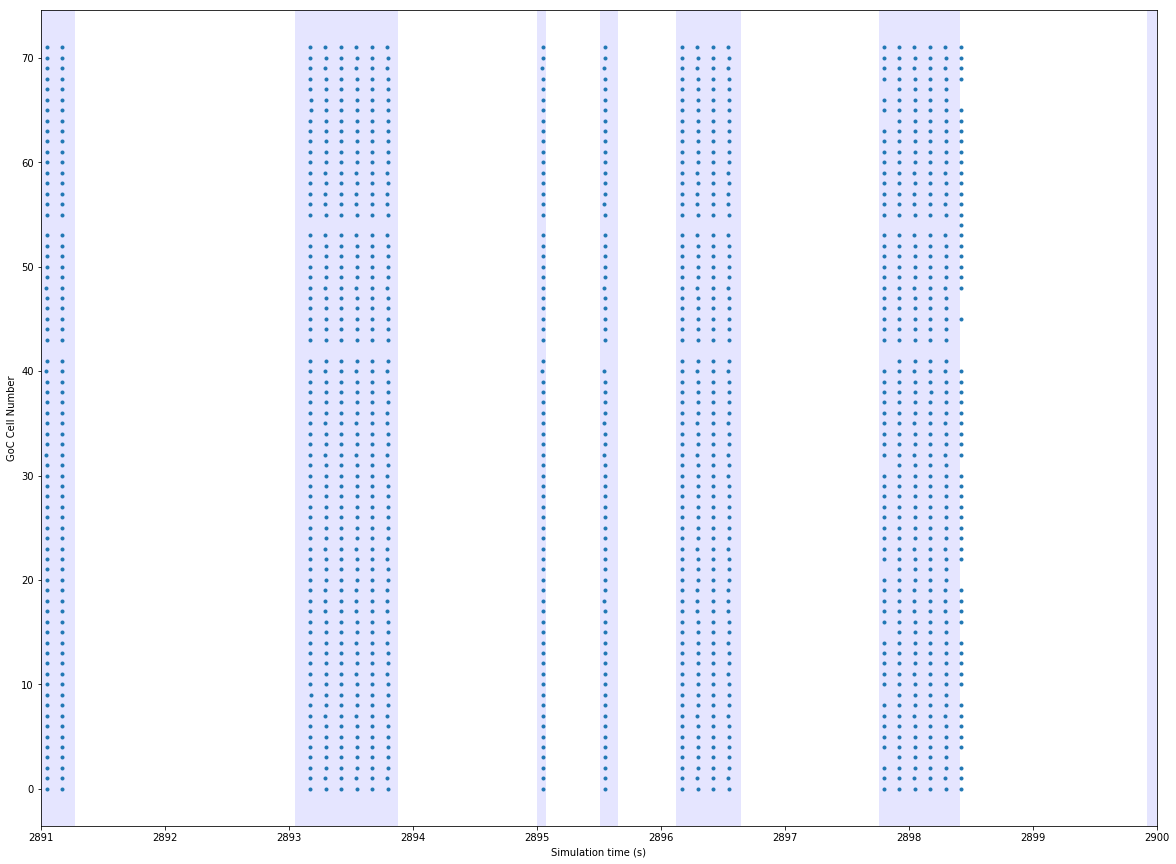

In [17]:
init_time = simulation.current_time - 9.0
end_time = simulation.current_time 
min_neuron = 0
max_neuron = simulation.cerebellum.get_number_of_elements(layer='goclayer')
pattern_id = 0
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer', init_time = init_time, end_time = end_time, neuron_indexes=range(min_neuron,max_neuron))
plt.figure(figsize=(20,15))
plt.plot(gtime,gcell_id, '.')
plt.ylabel('GoC Cell Number')
plt.xlabel('Simulation time (s)')
plt.xlim(init_time,end_time)
selected_bins = numpy.logical_and(simulation.pattern_length_cum<end_time,simulation.pattern_length_cum>init_time)
index = numpy.where(selected_bins)[0]
index = numpy.append([max(index[0]-1,0)],index)
index = numpy.append(index,[min(index[-1]+1,simulation.pattern_length.size-1)])
for idx in index[:-1]:
    if simulation.pattern_generator.bin_is_in_pattern[idx+1,pattern_id]:
        plt.axvspan(simulation.pattern_length_cum[idx], simulation.pattern_length_cum[idx+1], facecolor='b', alpha=0.1)

Calculate the average firing frequency of each golgi cells during the ending 100 seconds

Average spike per oscillatory cycle: 0.2558125 Hz


Text(0.5,0,u'Av. Spikes per Oscillatory Cycle')

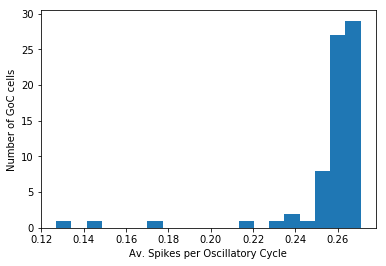

In [11]:
gtime,gcell_id = simulation.cerebellum.get_spike_activity(neuron_layer = 'goclayer',
                                                          init_time = simulation.current_time-simulation_time, 
                                                          end_time = simulation.current_time)
import numpy
firing_frequency = numpy.bincount(gcell_id) / (simulation_time*8.0)
av_firing_rate = numpy.average(firing_frequency)
print 'Average spike per oscillatory cycle:',av_firing_rate,'Hz'
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(firing_frequency, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Av. Spikes per Oscillatory Cycle')

Plot the histogram of non-zero weights between MF and GoC

Number of active synapses MF-GoC: 4171
Weight sum histogram MF-GoC: 4171


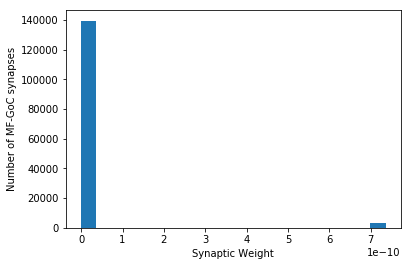

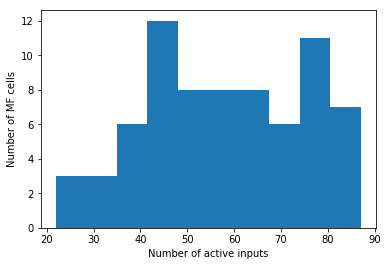

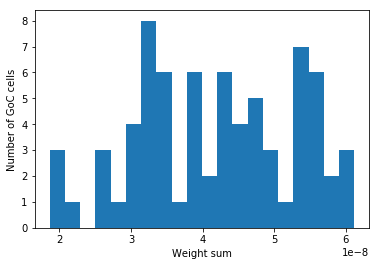

In [12]:
target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
plt.figure()
plt.hist(weight, bins=20, range=(0,simulation.config_options['mfgocsynapsis']['max_weight']))
plt.ylabel('Number of MF-GoC synapses')
plt.xlabel('Synaptic Weight')
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
number_of_active_inputs = numpy.bincount(target_cell_index[active_synapses])
plt.figure()
plt.hist(number_of_active_inputs, bins=10)
plt.ylabel('Number of MF cells')
plt.xlabel('Number of active inputs')
print 'Number of active synapses MF-GoC:',numpy.count_nonzero(active_synapses)
max_weight = numpy.max(weight)
active_synapses = weight>max_weight*0.2
weight_sum = numpy.bincount(target_cell_index,weights=weight)
plt.figure()
plt.hist(weight_sum, bins=20)
plt.ylabel('Number of GoC cells')
plt.xlabel('Weight sum')
print 'Weight sum histogram MF-GoC:',numpy.count_nonzero(active_synapses)

## MF-GoC weight analysis

Plot the MF-GoC weight as a function of the number of MF activation current in pattern

Text(0.5,1,u'Weight vs Pattern Activation')

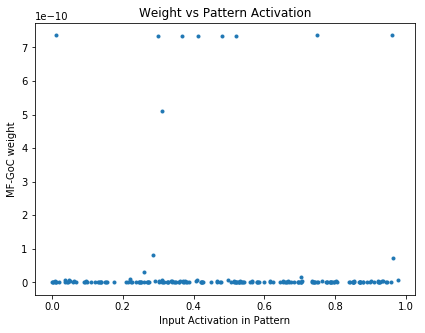

In [13]:
# Obtain the list of MF-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
target_cell_index = mfgoc_target_cell_index==3
mfgoc_target_cell_index = mfgoc_target_cell_index[target_cell_index]
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index[target_cell_index]
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights[target_cell_index]
mfgoc_max_weight = numpy.max(mfgoc_weight)
mfgoc_number_of_active_inputs = numpy.bincount(mfgoc_target_cell_index)
# Obtain the list of GoC active inputs included in pattern 
pattern_id = 0
included_in_pattern = numpy.in1d(mfgoc_source_cell_index, simulation.pattern_generator.fibers_in_pattern[pattern_id,:])
# Retrieve the weight of those MF included in pattern
# Search the x-index of elements in y
x = simulation.pattern_generator.fibers_in_pattern[pattern_id]
y = mfgoc_source_cell_index[included_in_pattern]
index = numpy.argsort(x)
sorted_x = x[index]
sorted_index = numpy.searchsorted(sorted_x, y)
yindex = numpy.take(index, sorted_index, mode="clip")
# Calculate the normalized activation levels
normalized_activation = simulation.pattern_generator.pattern_activation[pattern_id][yindex]
# Plot the figure
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(normalized_activation,mfgoc_weight[included_in_pattern],'.')
plt.xlabel('Input Activation in Pattern')
plt.ylabel('MF-GoC weight')
plt.title('Weight vs Pattern Activation')

Analyze the GrC neurons which are strenghted

Text(0.5,0,u'Number of MF cells')

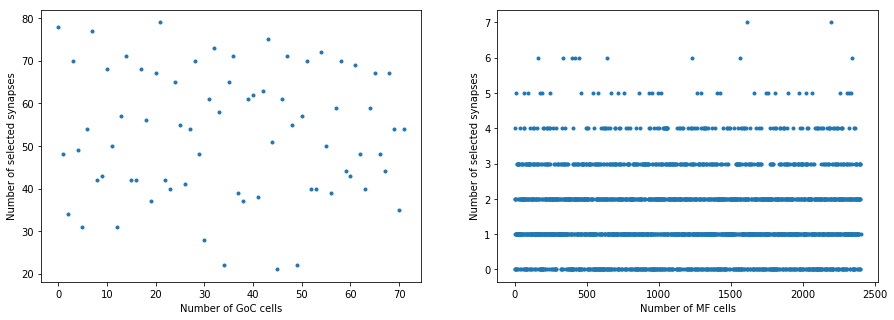

In [14]:
# Obtain the list of active GrC-GoC inputs
mfgoc_target_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].target_index
mfgoc_source_cell_index = simulation.cerebellum.layer_map['mfgocsynapsis'].source_index
mfgoc_weight = simulation.cerebellum.layer_map['mfgocsynapsis'].weights
target_cell_index = mfgoc_target_cell_index>=0
mfgoc_max_weight = numpy.max(mfgoc_weight[target_cell_index])
selected_synapses = numpy.logical_and(mfgoc_weight>mfgoc_max_weight*0.50,target_cell_index)
target_count = numpy.bincount(mfgoc_target_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='goclayer'))
source_count = numpy.bincount(mfgoc_source_cell_index[selected_synapses],minlength=simulation.cerebellum.get_number_of_elements(layer='mflayer'))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='goclayer')),target_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of GoC cells')
plt.subplot(1,2,2)
plt.plot(range(0,simulation.cerebellum.get_number_of_elements(layer='mflayer')),source_count,'.')
plt.ylabel('Number of selected synapses')
plt.xlabel('Number of MF cells')

## Information Analysis

Mutual information analysis in the GoC layer

In [15]:
simulation.analyze_av_MI()

2018-07-11 12:47:42,478 - P13339 - MemTotal:1112M - Simulation - INFO: Analyzing individual mutual information in section individual_mutual_information
2018-07-11 12:47:42,496 - P13339 - MemTotal:1112M - Simulation - INFO: Analyzing mutual information from time 2600.0 to 2900.0 seconds
2018-07-11 12:47:42,504 - P13339 - MemTotal:1112M - Simulation - INFO: Average firing rate in MI analysis: 1.7368518518518519Hz
2018-07-11 12:47:42,516 - P13339 - MemTotal:1112M - Simulation - INFO: Individual pattern hit matrix:
2018-07-11 12:47:42,517 - P13339 - MemTotal:1112M - Simulation - INFO: [[0.88413547 0.88235294 0.88948307 0.85918004 0.86809269 0.89304813
  0.89304813 0.885918   0.885918   0.8342246  0.88057041 0.88057041
  0.88948307 0.8912656  0.88413547 0.8627451  0.89483066 0.87165775
  0.87522282 0.88413547 0.88057041 0.86452763 0.885918   0.88057041
  0.89661319 0.885918   0.8912656  0.885918   0.89483066 0.88413547
  0.89839572 0.86809269 0.87522282 0.88770053 0.88057041 0.88235294
  0.

[array([0.6507522])]

In [16]:
simulation.analyze_Hits_Top()

2018-07-11 12:47:42,565 - P13339 - MemTotal:1112M - Simulation - INFO: Analyzing hit analysis in section hit_top_analysis
2018-07-11 12:47:42,590 - P13339 - MemTotal:1112M - Simulation - INFO: Average firing rate in MI analysis: 1.7368518518518519Hz
2018-07-11 12:47:42,605 - P13339 - MemTotal:1112M - Simulation - INFO: Individual pattern hit matrix:
2018-07-11 12:47:42,607 - P13339 - MemTotal:1112M - Simulation - INFO: [[0.88413547 0.88235294 0.88948307 0.85918004 0.86809269 0.89304813
  0.89304813 0.885918   0.885918   0.8342246  0.88057041 0.88057041
  0.88948307 0.8912656  0.88413547 0.8627451  0.89483066 0.87165775
  0.87522282 0.88413547 0.88057041 0.86452763 0.885918   0.88057041
  0.89661319 0.885918   0.8912656  0.885918   0.89483066 0.88413547
  0.89839572 0.86809269 0.87522282 0.88770053 0.88057041 0.88235294
  0.88770053 0.88057041 0.88948307 0.89661319 0.885918   0.86452763
  0.01604278 0.89304813 0.87165775 0.87878788 0.84670232 0.87700535
  0.86631016 0.8573975  0.8823529

[0.8470026072226937]